# Elementary Data Analysis of Housing Prices

This notebook provides an initial exploration of the dataset, including descriptive statistics, visualizations, and basic insights to understand the data distribution and relationships among features.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  

In [36]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('sample_submission.csv')

## Creating Combined Datasets

- Loaded and combined training, testing, and submission data into a single dataset.


In [37]:
y_train = train_data['SalePrice'] 
x_train = train_data.drop(columns='SalePrice') 

x_test = test_data 
y_test = submission_data['SalePrice'] 


In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1460, 80), (1460,), (1459, 80), (1459,))

In [39]:
train_test_data = pd.concat([x_train, x_test], axis=0, ignore_index=True)
train_test_y_data = pd.concat([y_train, y_test], axis=0, ignore_index=True)
dataset = pd.concat([train_test_data, train_test_y_data], axis=1)

print("Dataset Shape:", dataset.shape)


Dataset Shape: (2919, 81)


In [40]:
dataset.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn         2.0       548.0         TA   
1     Attchd       1976.0          RFn         2.0       460.0         TA   
2     Attchd       2001.0          RFn         2.0       608.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal   208500.0  
1       WD        Normal   181500.0  
2       WD        Normal   223500.0

In [41]:
submission_data.head(3)

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570

In [42]:
# Saving the combined data to a CSV file for further operation
#train_test_data.to_csv('train_test_data.csv', index=False)
#dataset.to_csv('train_test_data.csv', index=False)

In [43]:
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

## Categorizing Features into Different Types

- Identified continuous numerical features with more than 20 unique values.
- Identified numerical categorical features with 20 or fewer unique values.
- Identified object categorical features.


In [44]:
# List of continuous numerical features (more than 20 unique values)
numerical_continuous_features = [col for col in dataset.select_dtypes(include=['number']).columns 
                                 if dataset[col].nunique() > 20]

# List of numerical categorical features (20 or fewer unique values)
numerical_categorical_features = [col for col in dataset.select_dtypes(include=['number']).columns 
                                  if dataset[col].nunique() <= 20]

# List of object categorical features
object_categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()


print("Numerical Continuous Features:", numerical_continuous_features)
print("Numerical Categorical Features:", numerical_categorical_features)
print("Object Categorical Features:", object_categorical_features)


Numerical Continuous Features: ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
Numerical Categorical Features: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
Object Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 

In [45]:
len_num_con = len(numerical_continuous_features)
len_num_cat = len(numerical_categorical_features)
len_obj_cat = len(object_categorical_features)

len_num_con, len_num_cat, len_obj_cat, (len_num_con+len_num_cat+len_obj_cat)

(23, 15, 43, 81)

## Missing Values

- Identified features with at least one missing value.
- Calculated the percentage of missing values for continuous numerical, numerical categorical, and object categorical features.

In [46]:
features_with_nan = dataset.columns[dataset.isna().any()].tolist()

len(features_with_nan)

34

In [47]:
print(dataset[features_with_nan].isna().mean() * 100)

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64


In [48]:
# Filtering features with null values for each type
null_percentage_numerical_continuous = dataset[numerical_continuous_features].isna().mean() * 100
null_percentage_numerical_categorical = dataset[numerical_categorical_features].isna().mean() * 100
null_percentage_object_categorical = dataset[object_categorical_features].isna().mean() * 100

print("Numerical Continuous Features with NaN values:")
print(null_percentage_numerical_continuous[null_percentage_numerical_continuous > 0])
print("\nNumerical Categorical Features with NaN values:")
print(null_percentage_numerical_categorical[null_percentage_numerical_categorical > 0])
print("\nObject Categorical Features with NaN values:")
print(null_percentage_object_categorical[null_percentage_object_categorical > 0])


Numerical Continuous Features with NaN values:
LotFrontage    16.649538
MasVnrArea      0.787941
BsmtFinSF1      0.034258
BsmtFinSF2      0.034258
BsmtUnfSF       0.034258
TotalBsmtSF     0.034258
GarageYrBlt     5.447071
GarageArea      0.034258
dtype: float64

Numerical Categorical Features with NaN values:
BsmtFullBath    0.068517
BsmtHalfBath    0.068517
GarageCars      0.034258
dtype: float64

Object Categorical Features with NaN values:
MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFea

## Visualizing SalePrice by Object Categorical Features

- Created side-by-side bar and box plots for each object categorical feature to analyze its relationship with `SalePrice`.


C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


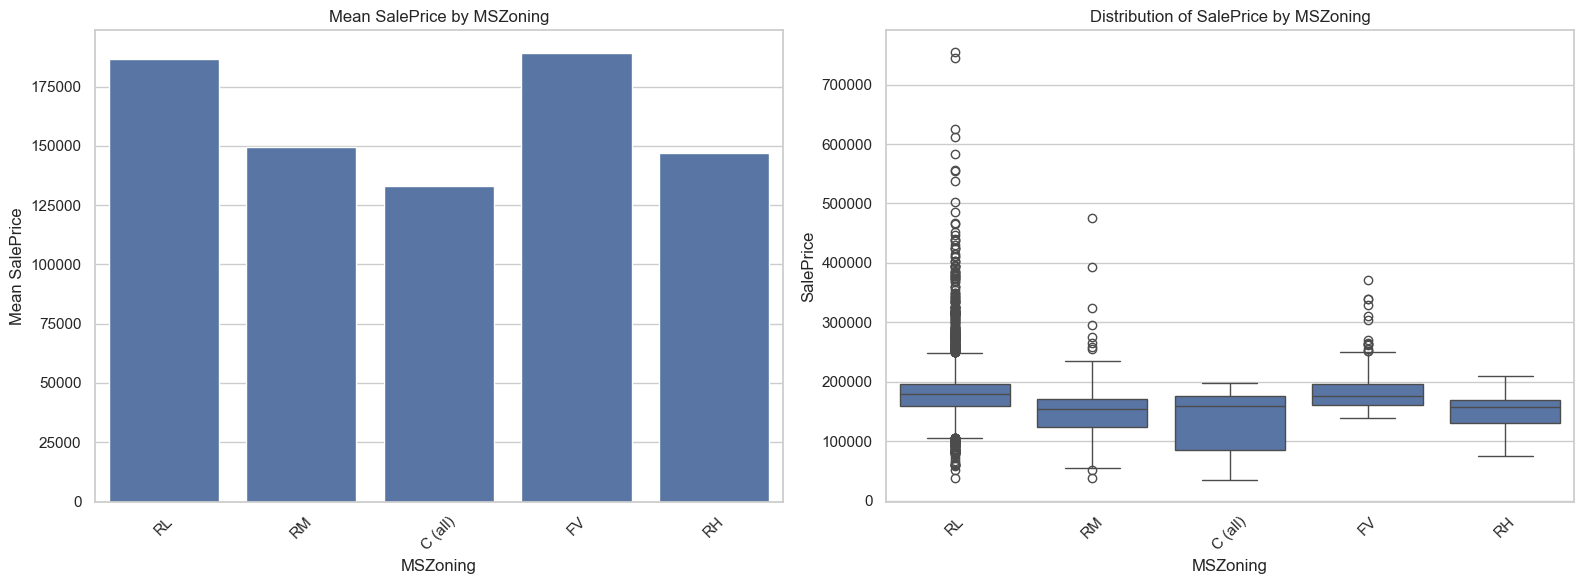

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


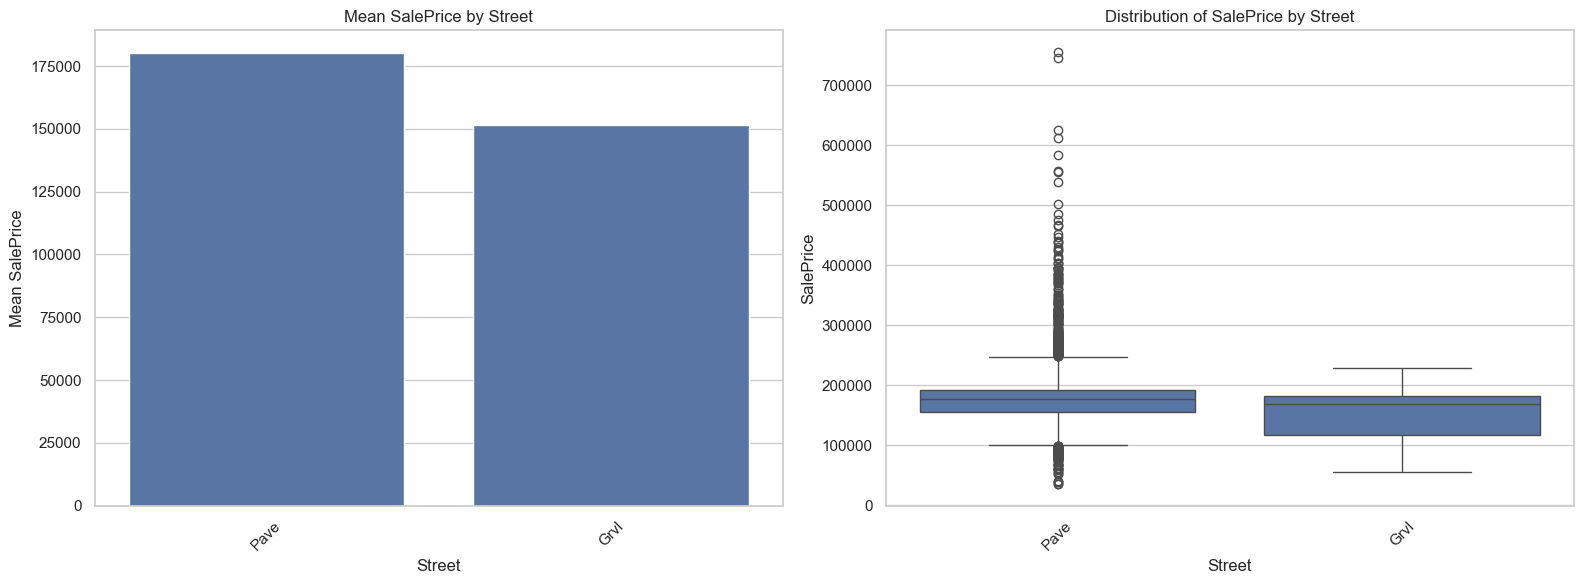

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


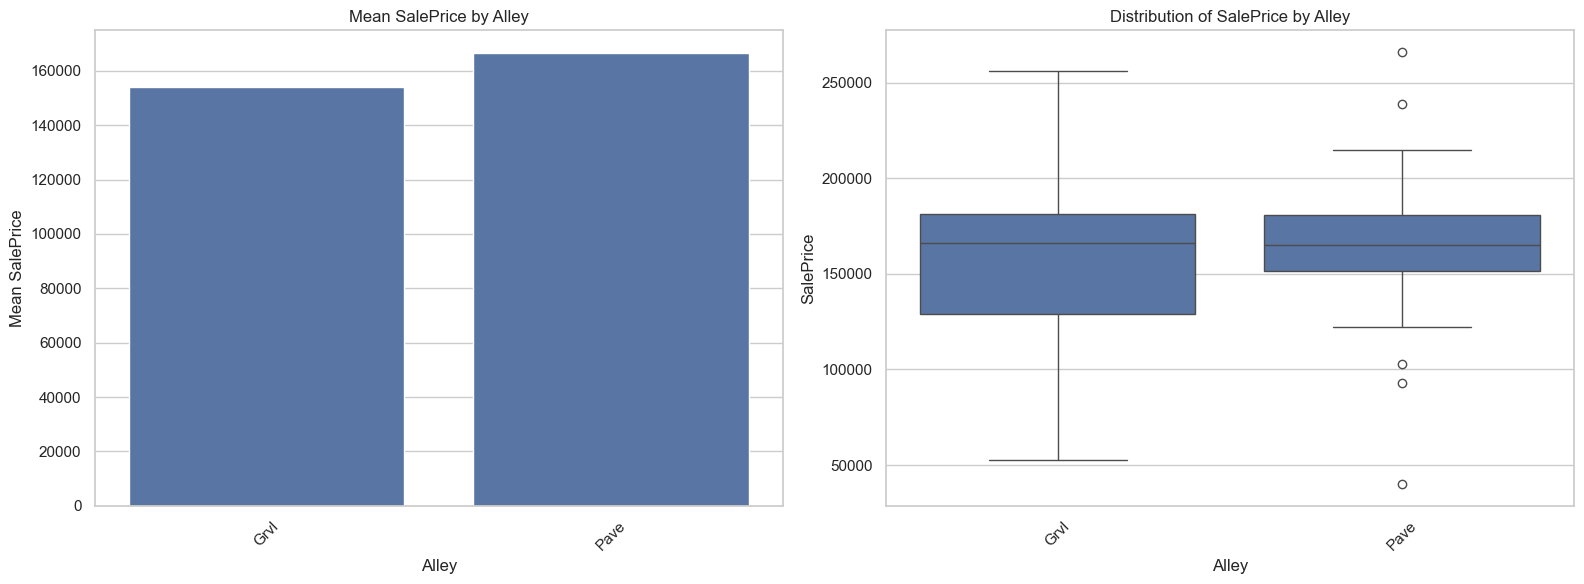

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


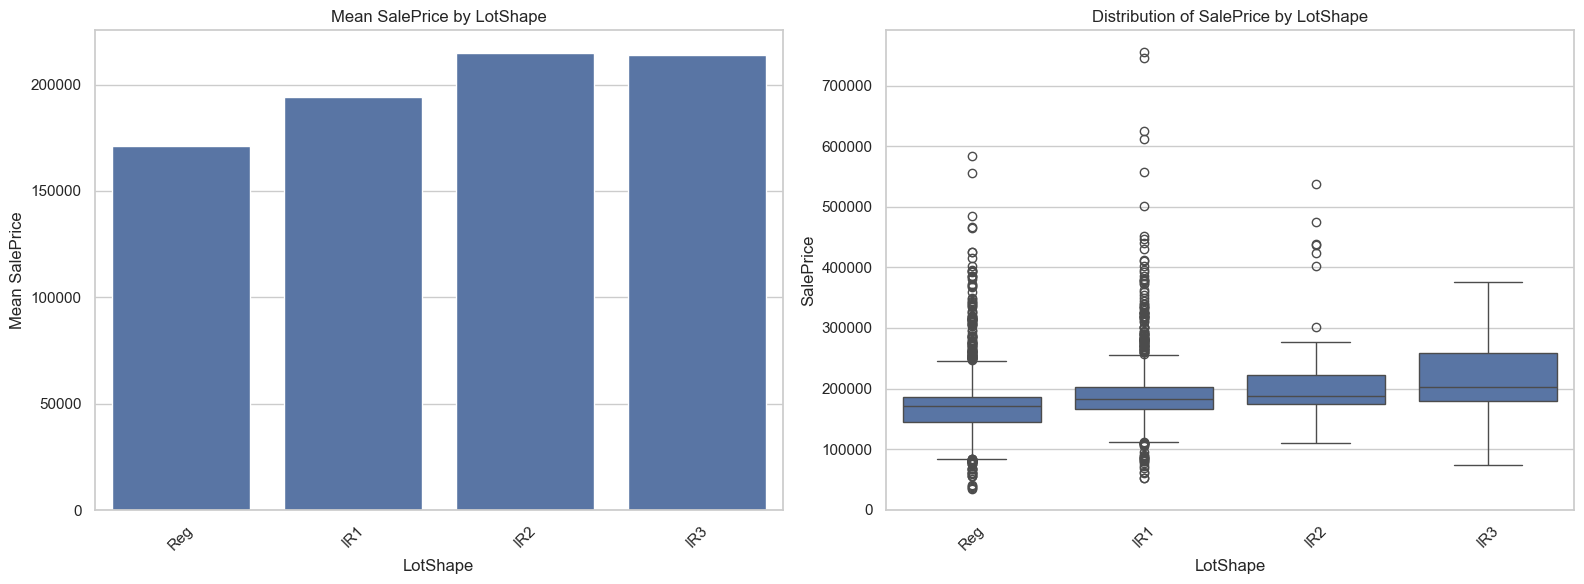

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


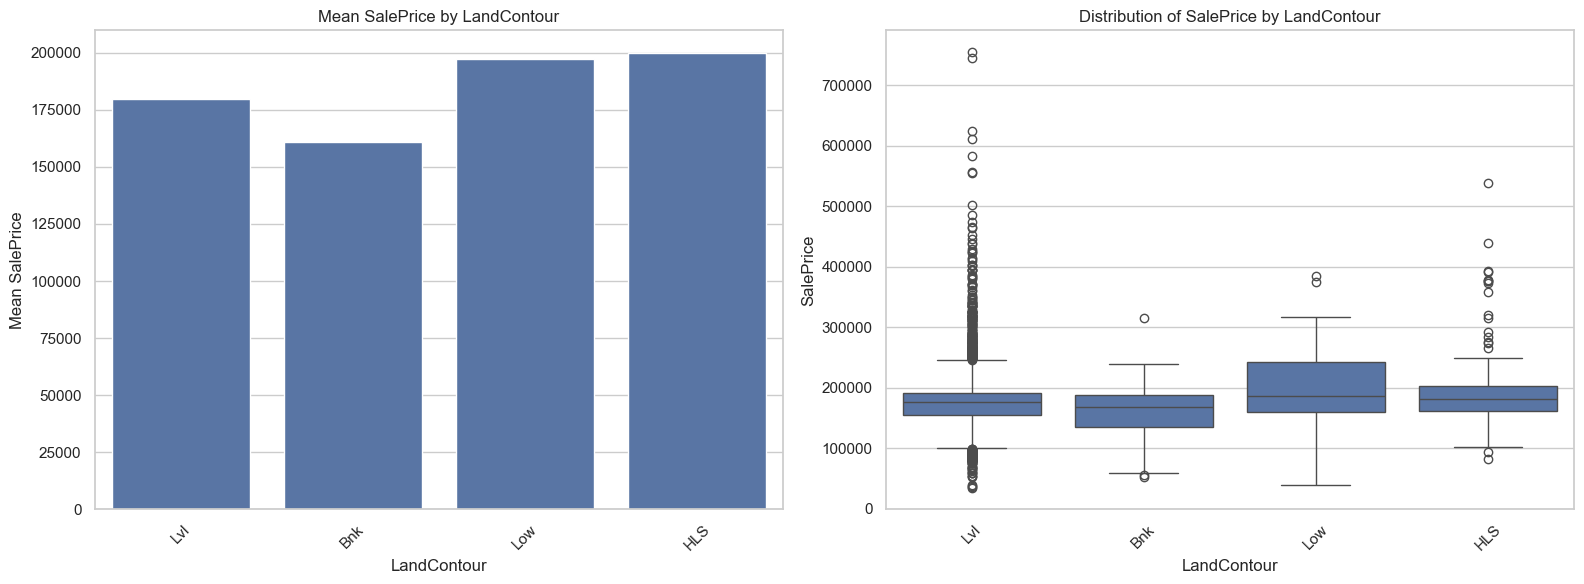

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


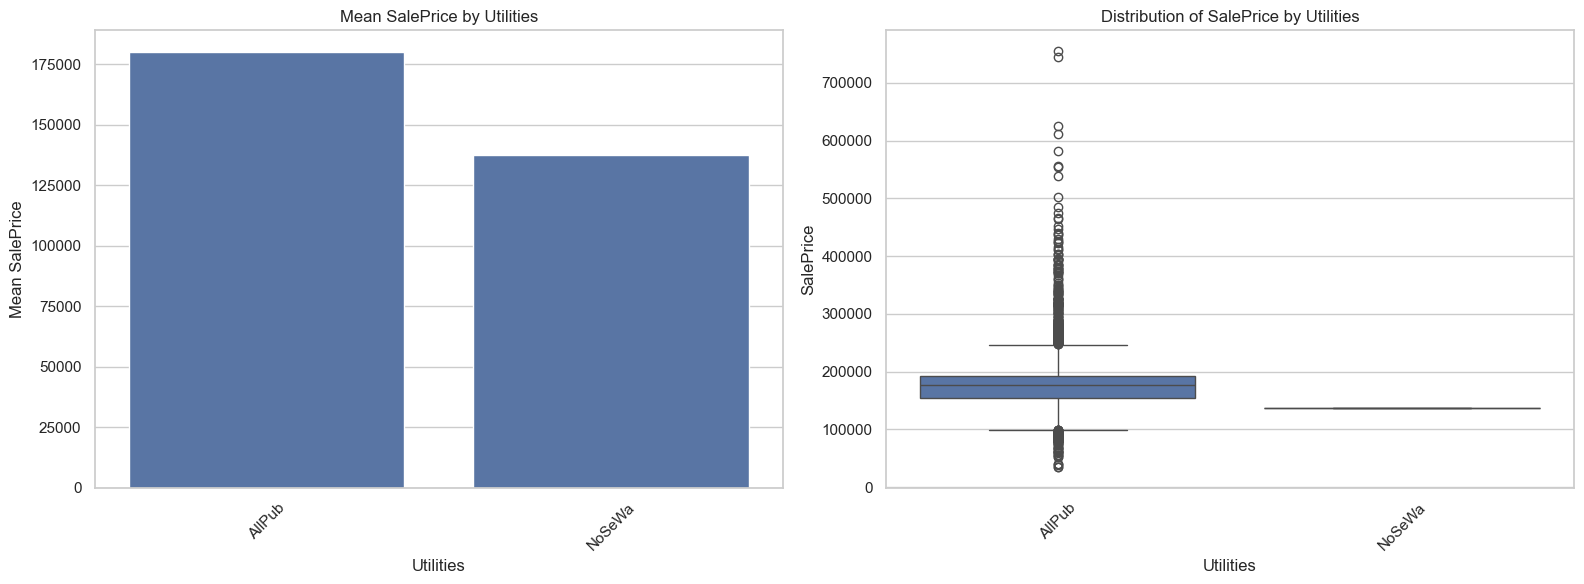

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


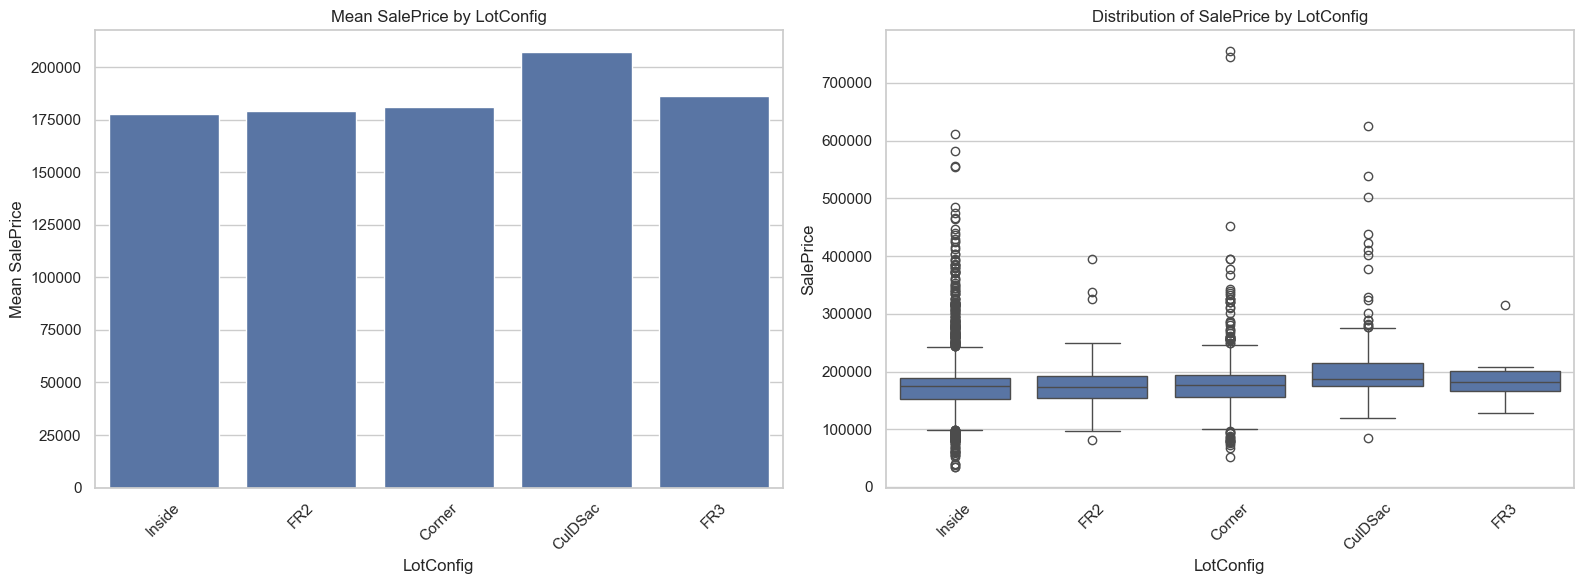

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


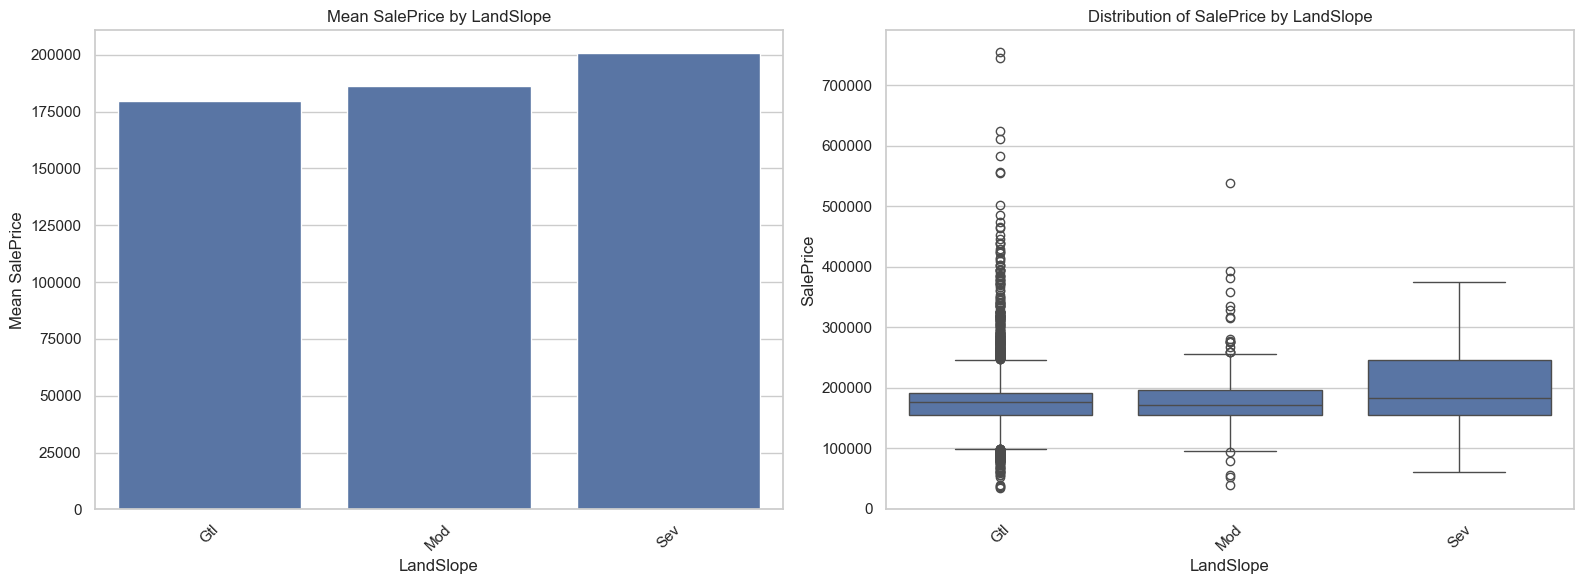

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


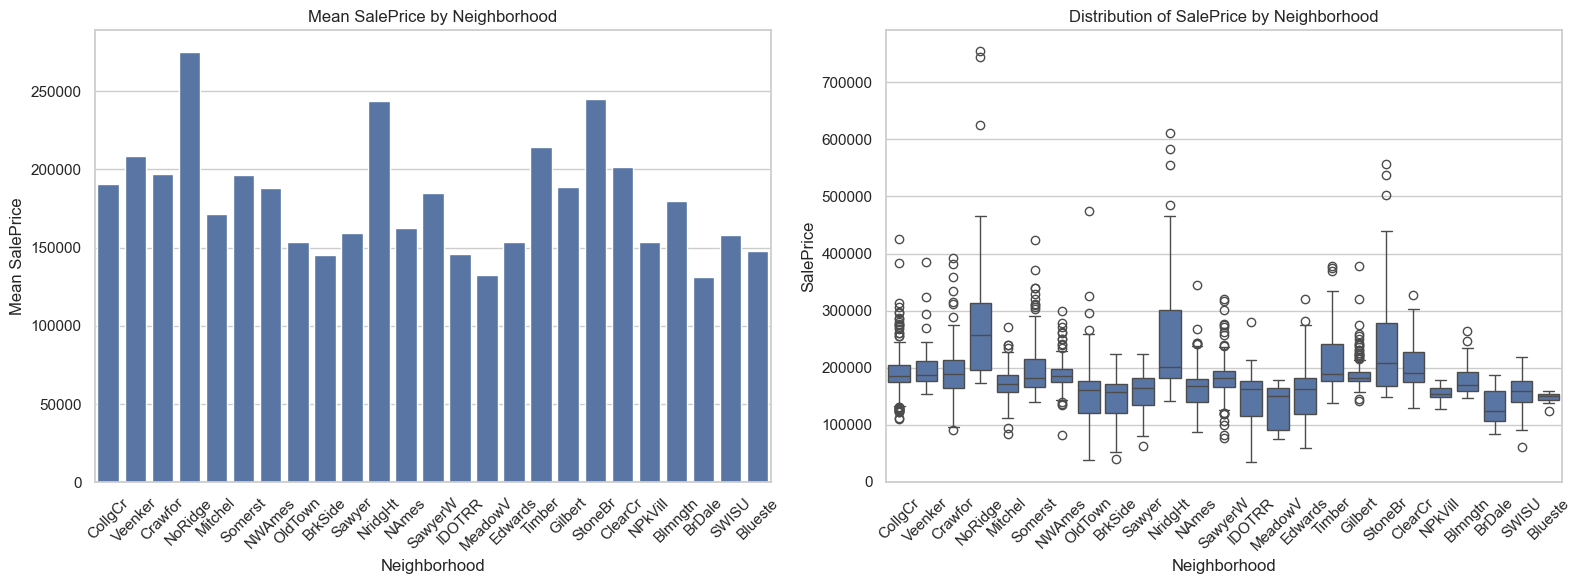

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


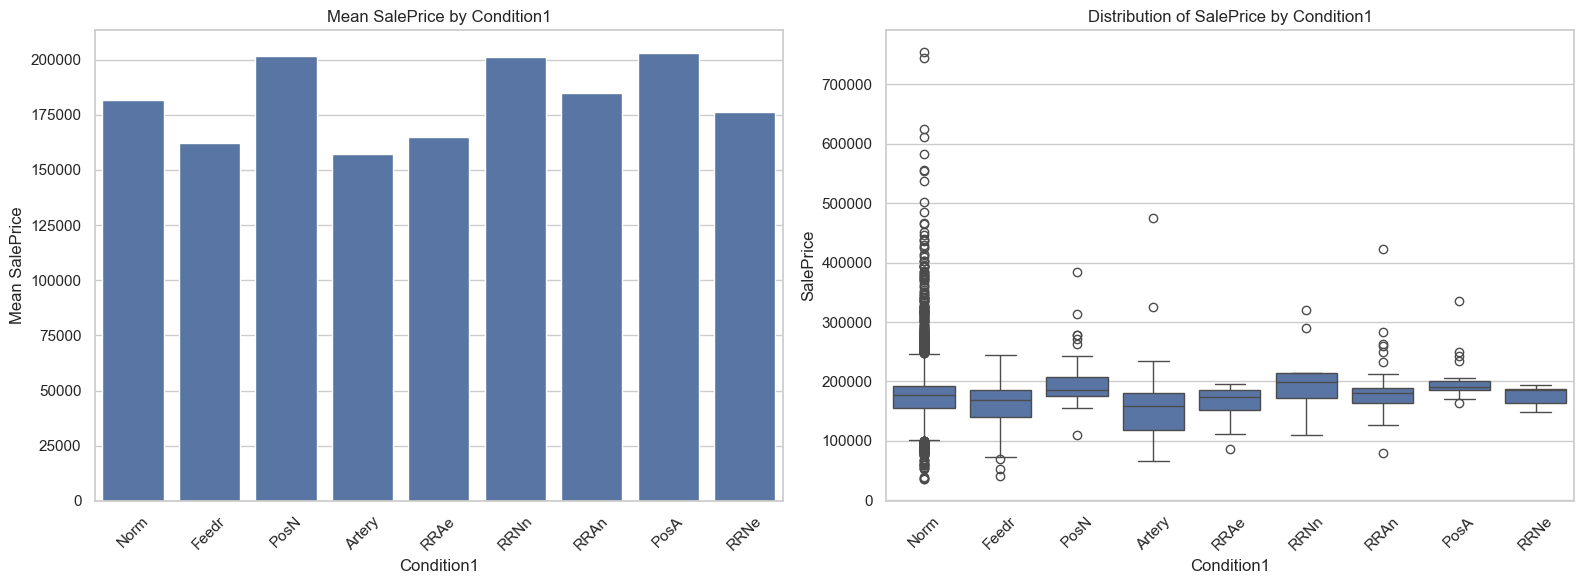

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


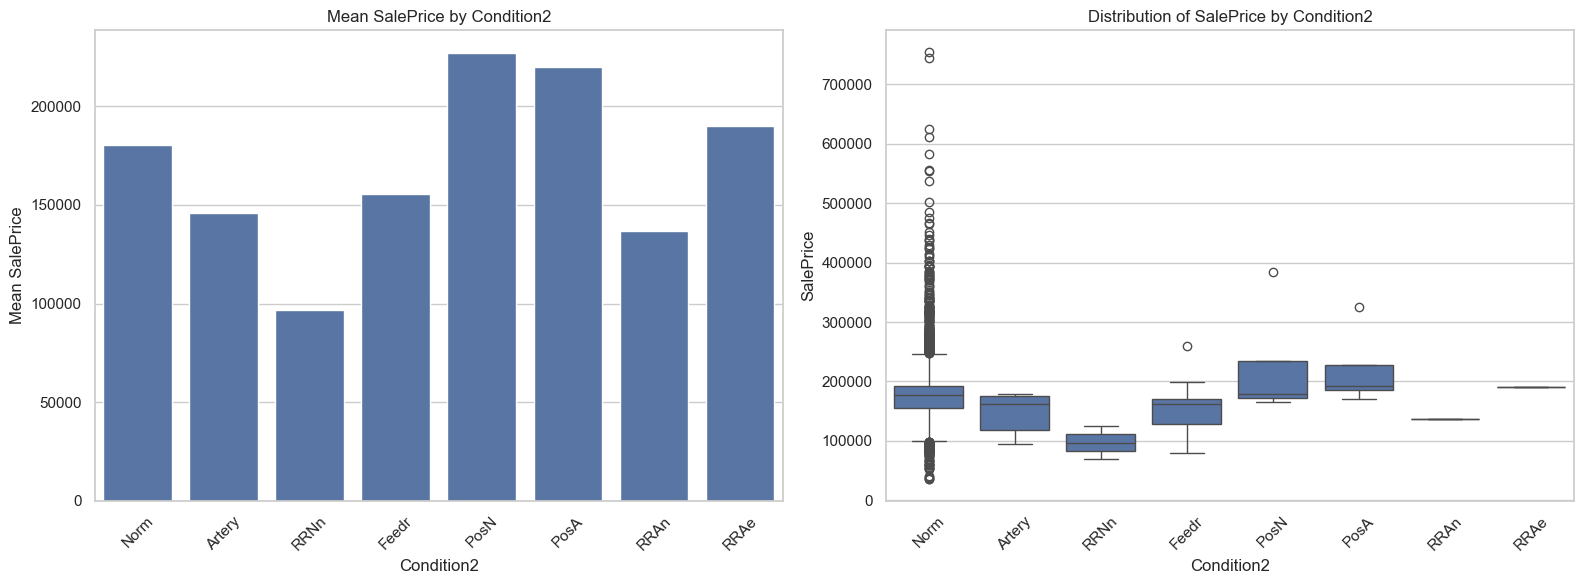

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


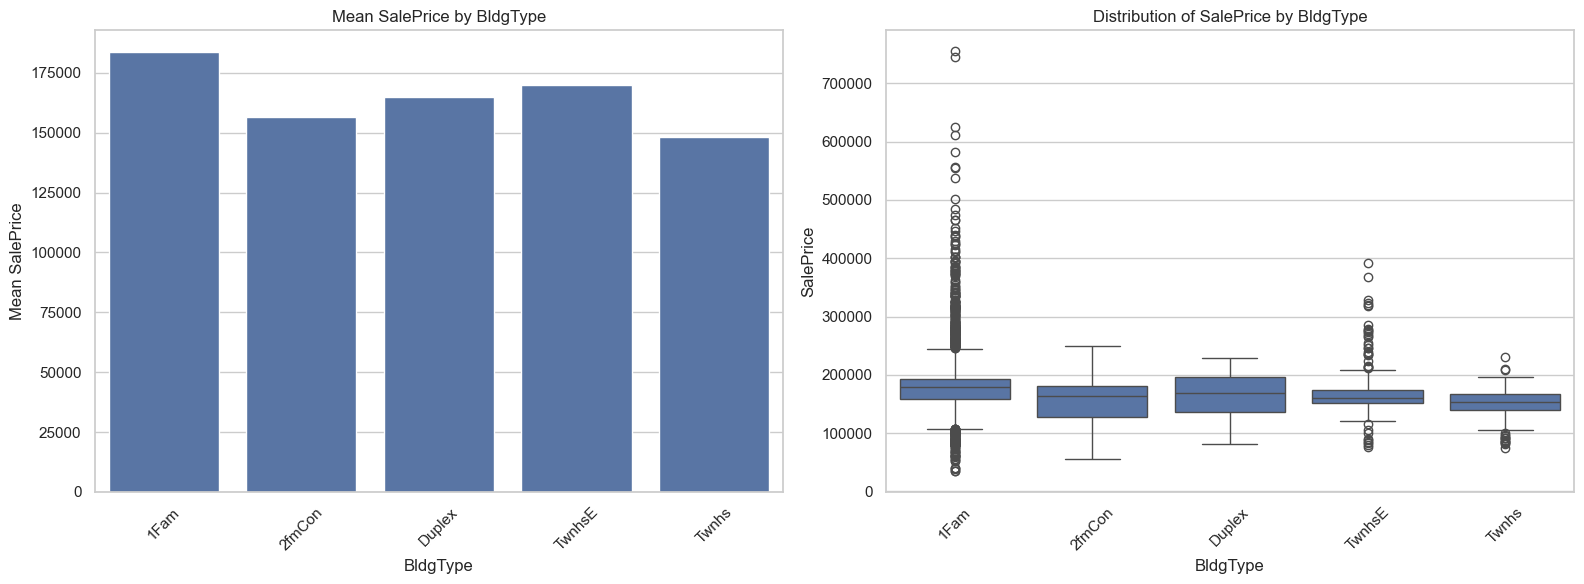

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


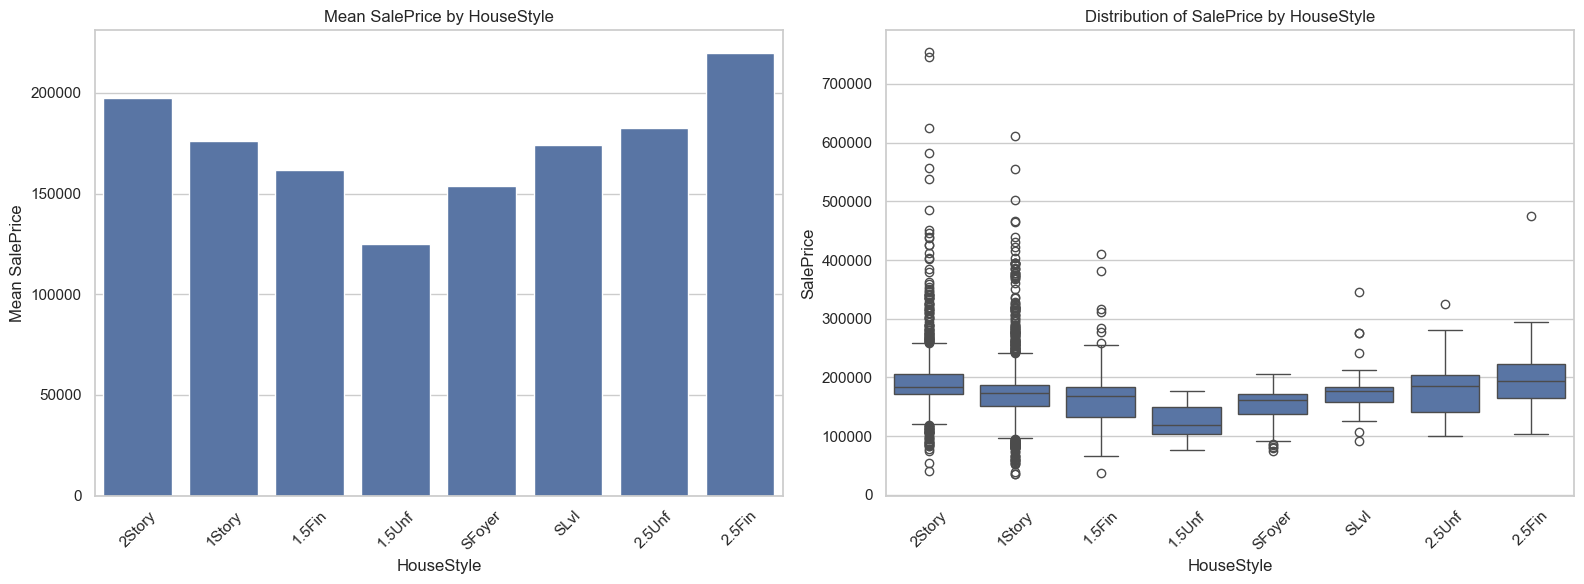

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


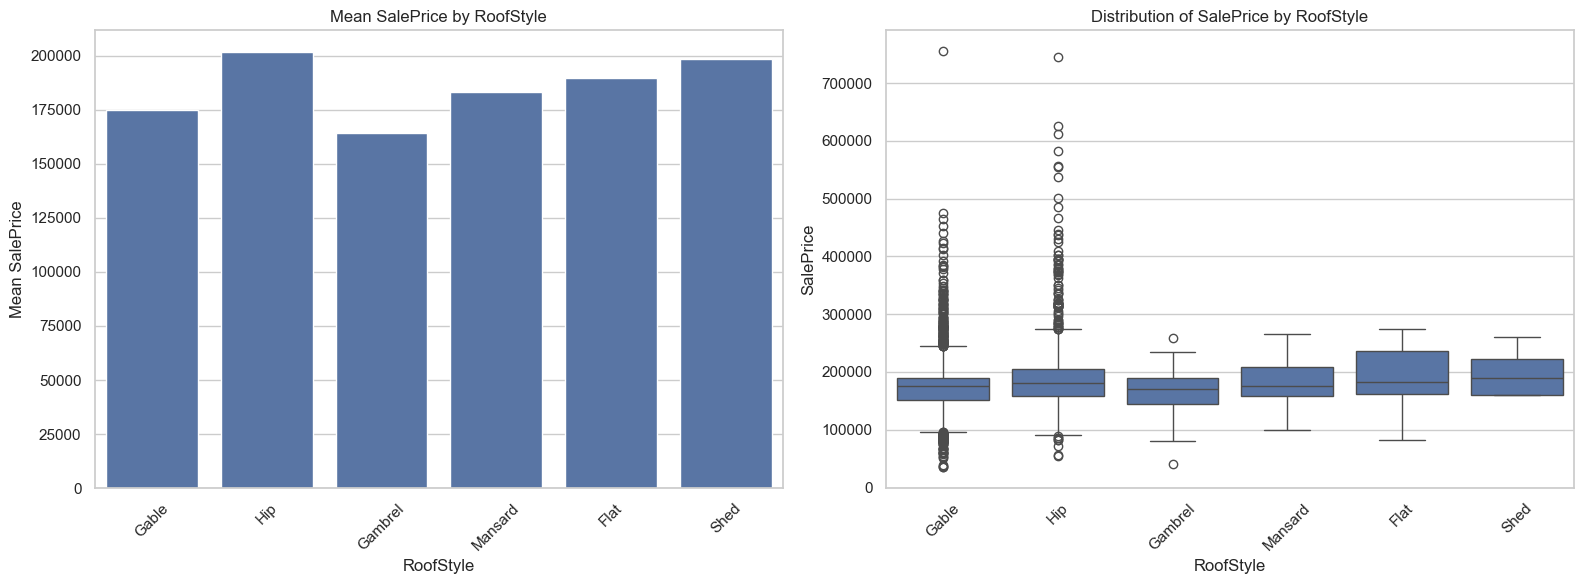

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


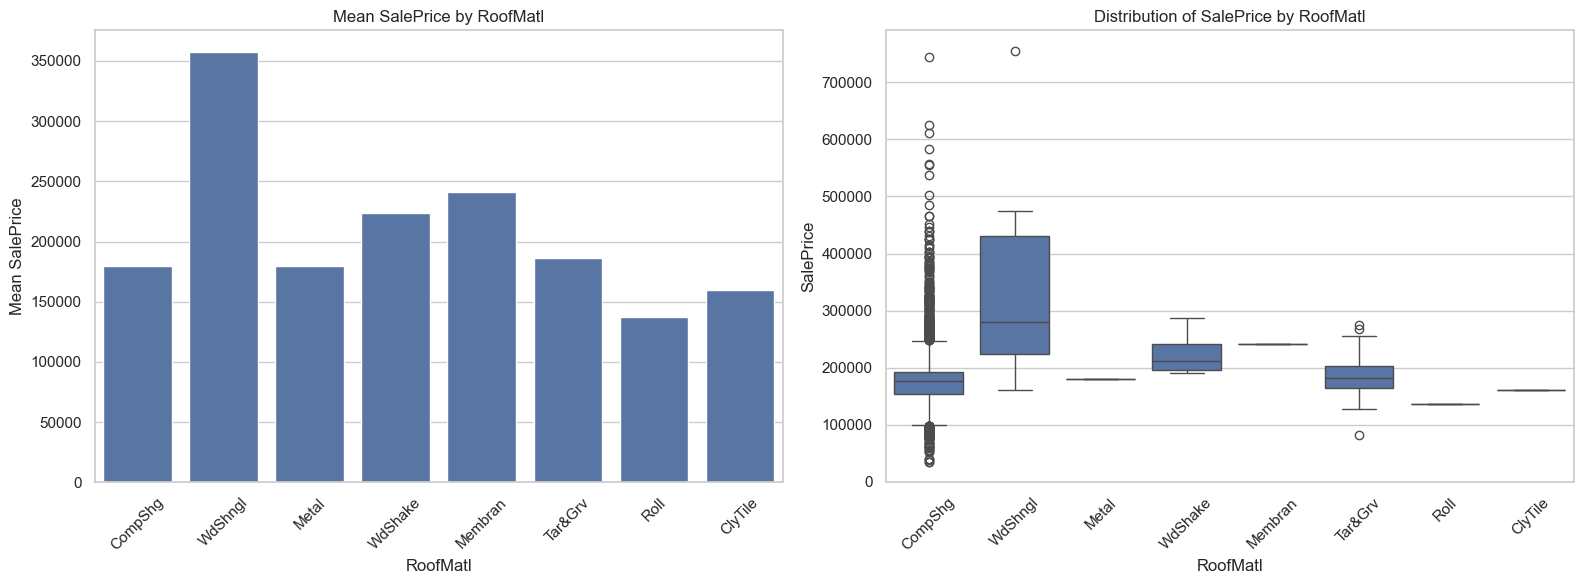

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


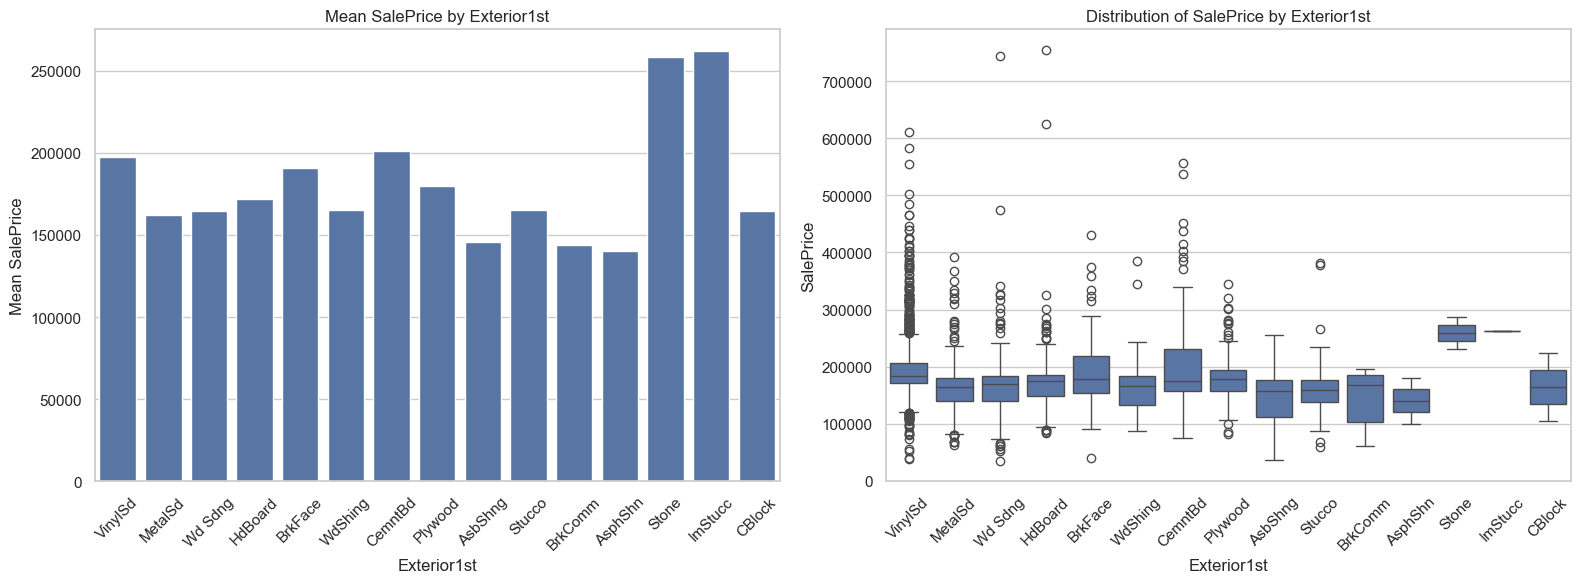

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


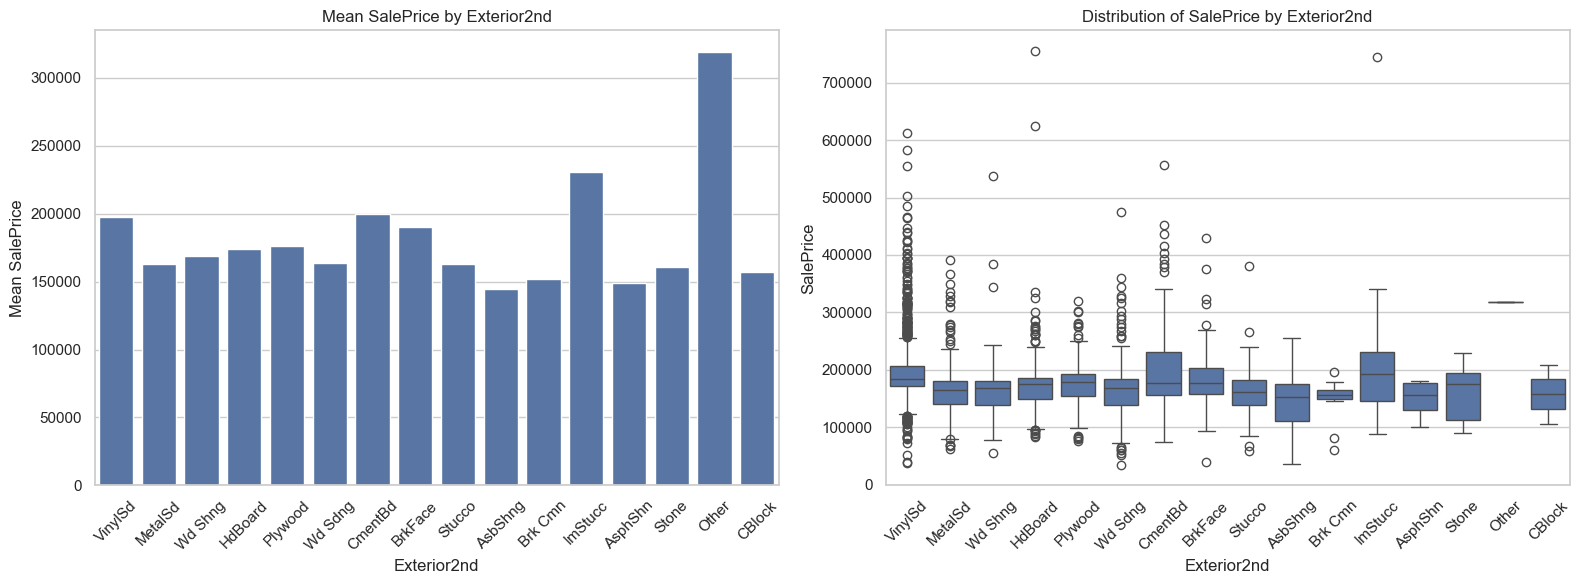

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


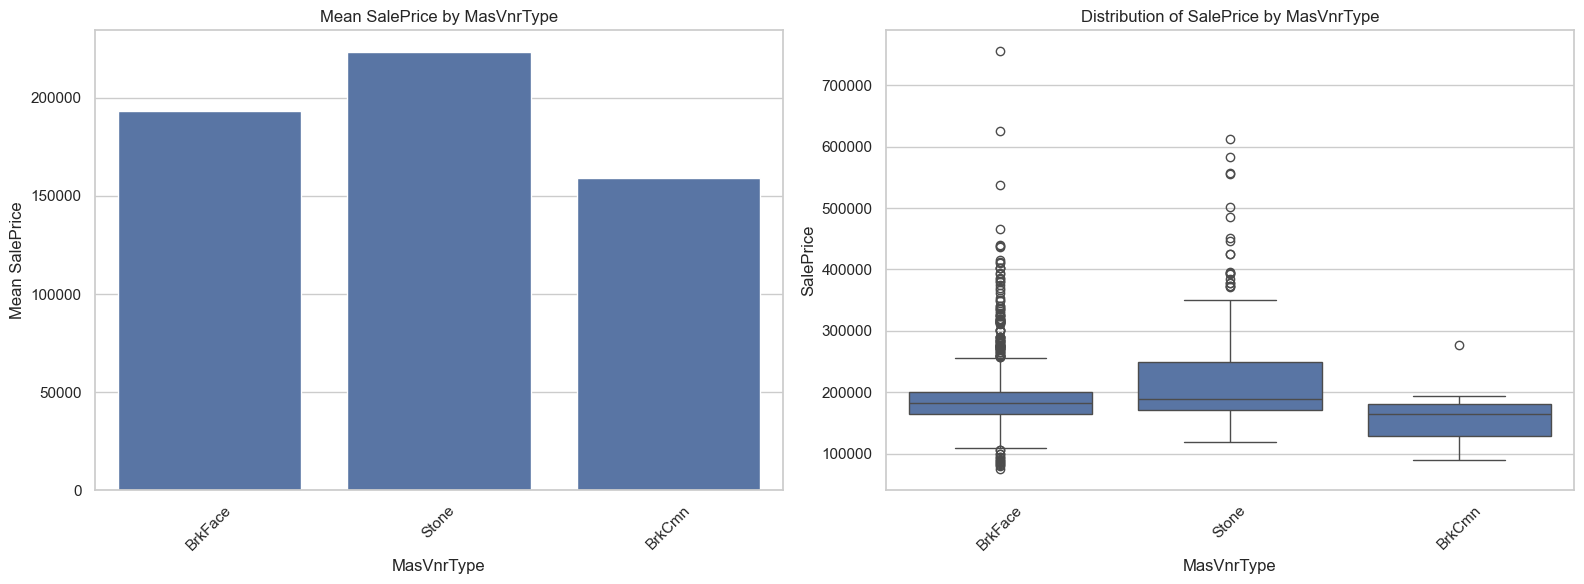

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


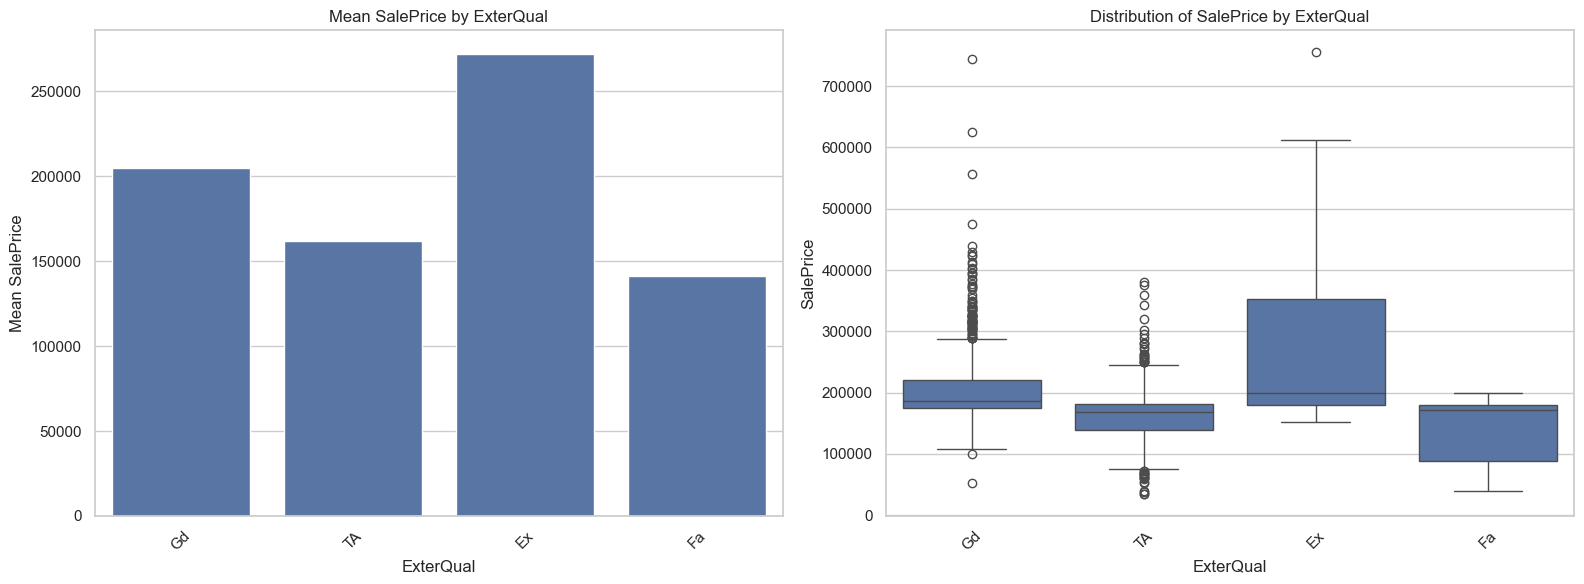

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


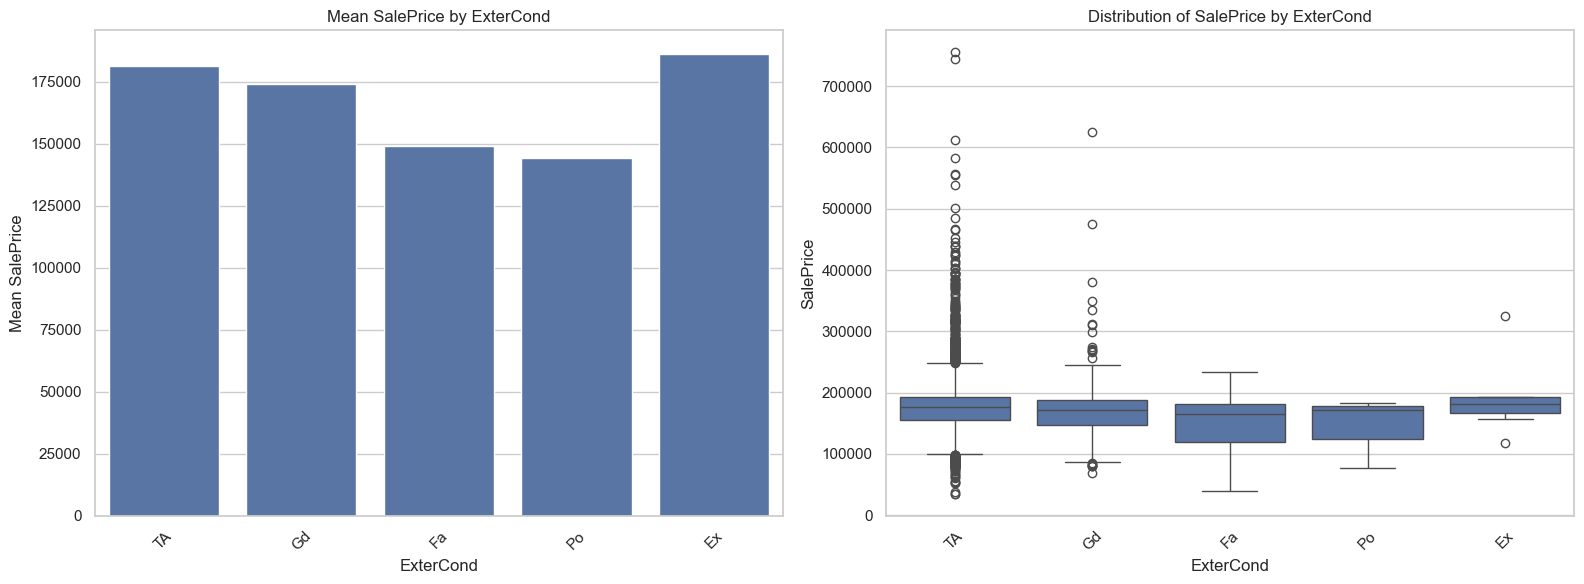

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


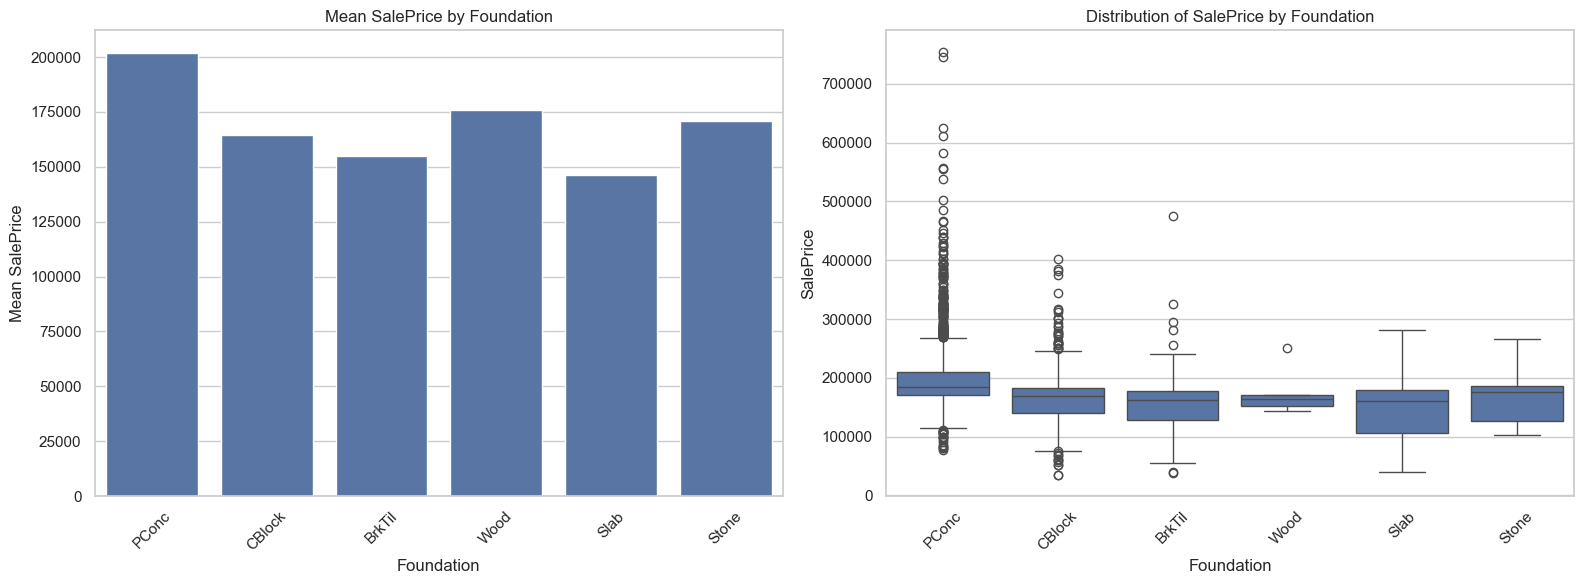

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


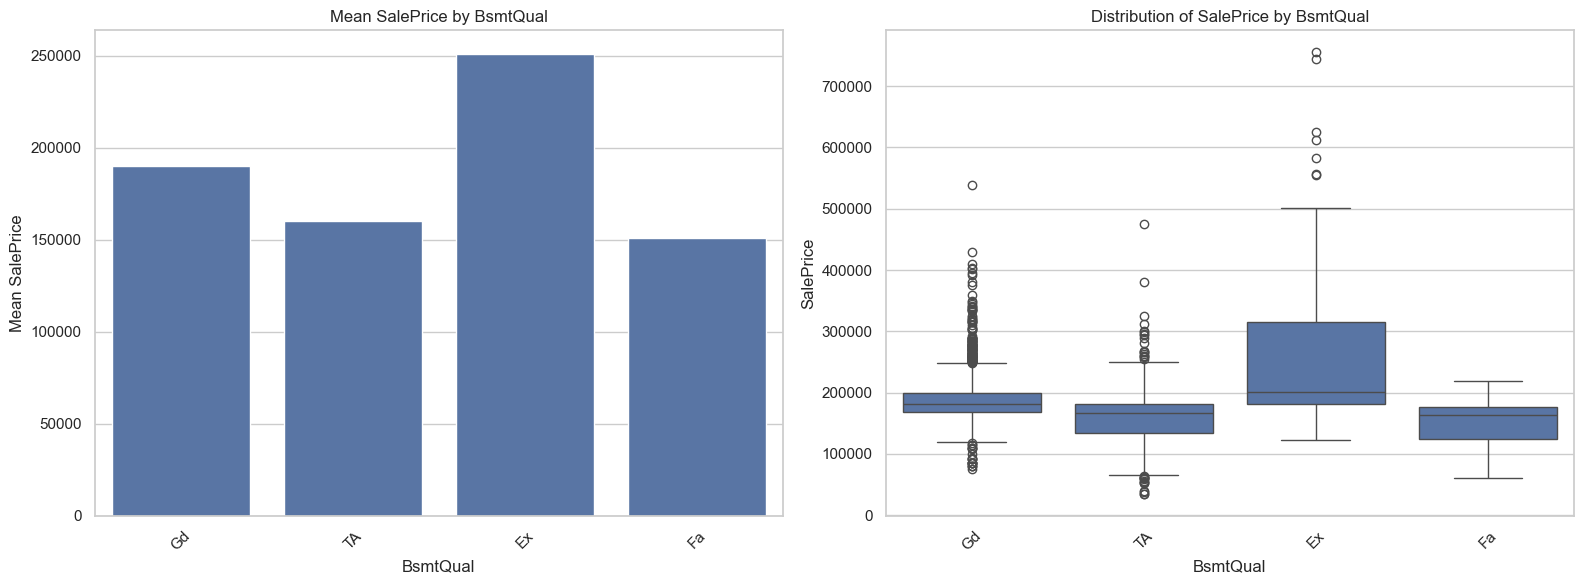

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


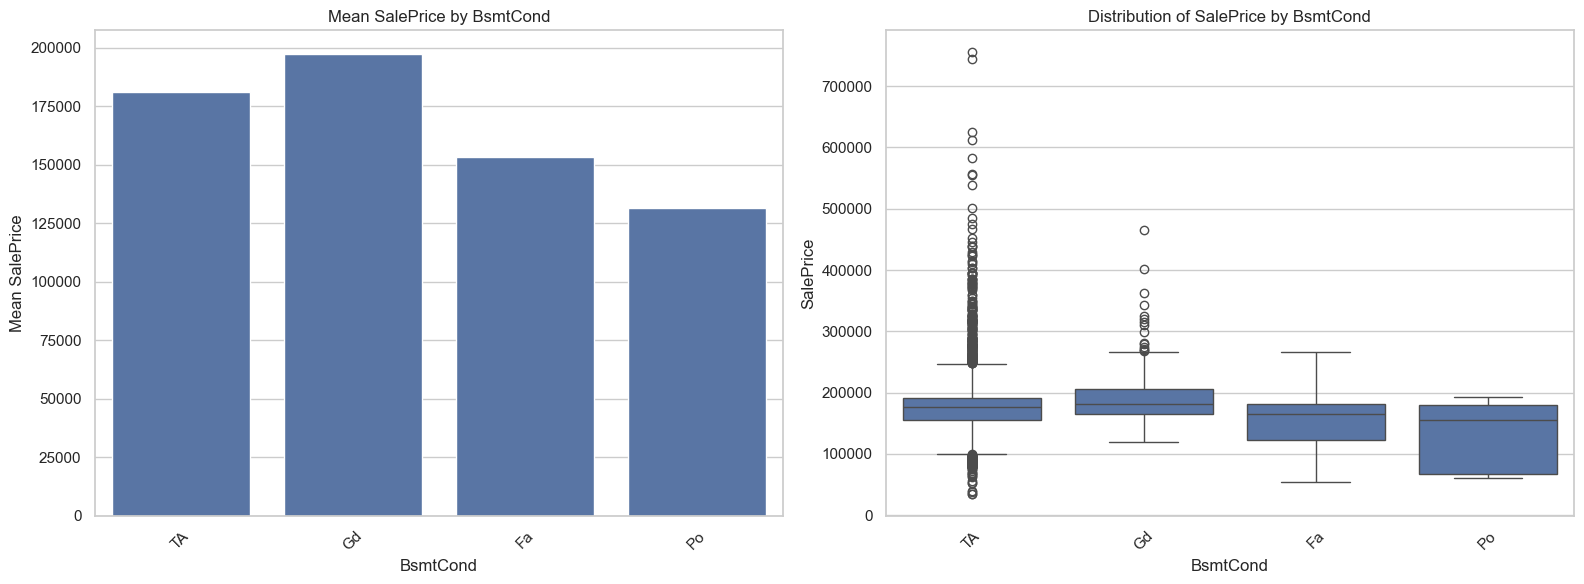

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


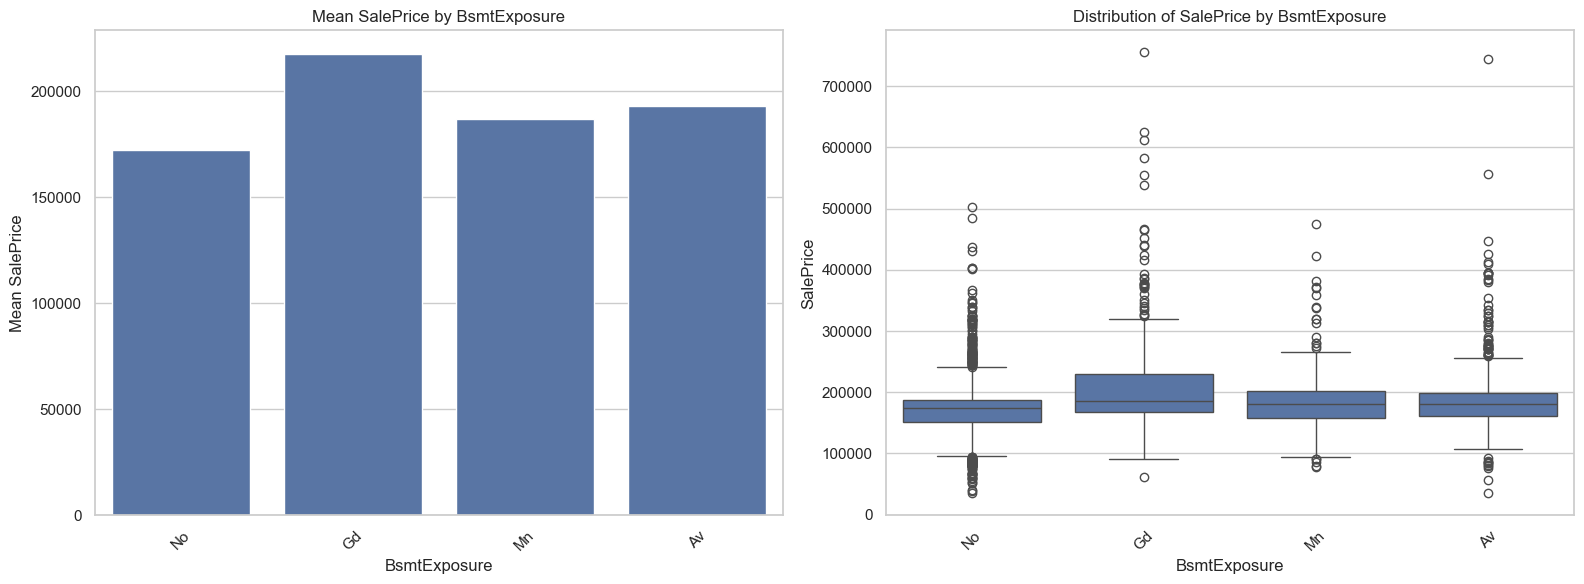

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


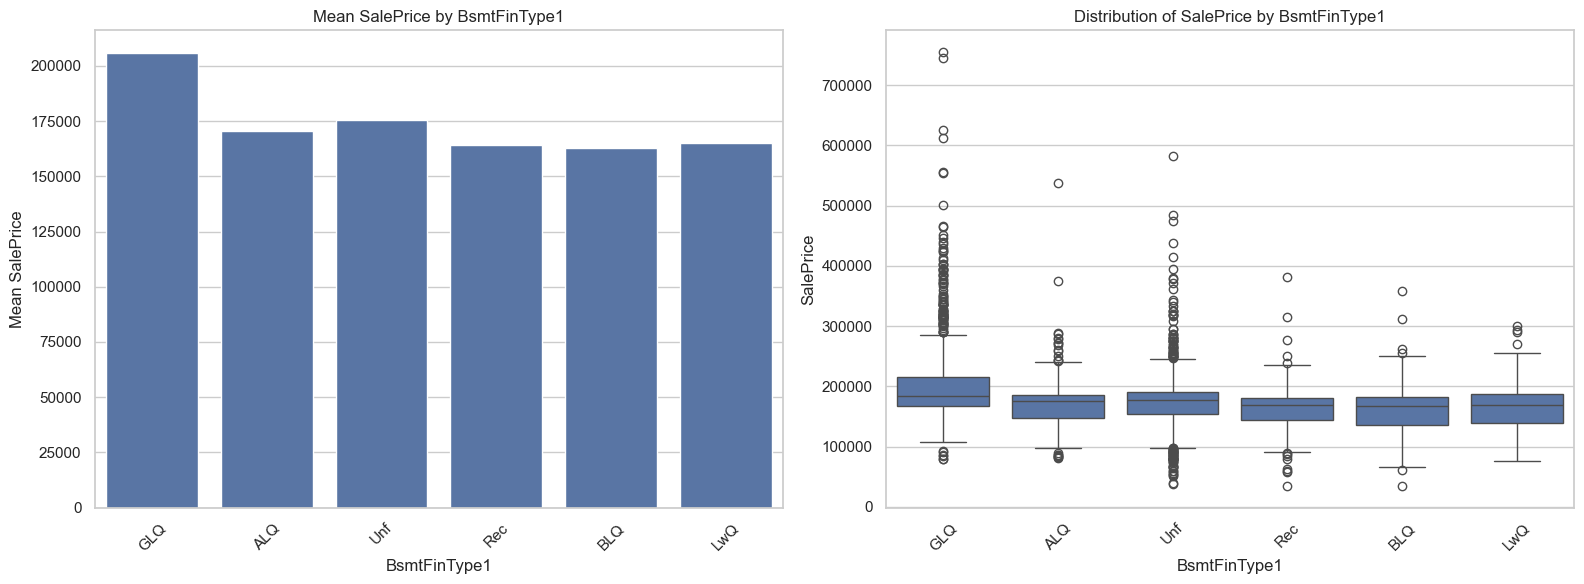

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


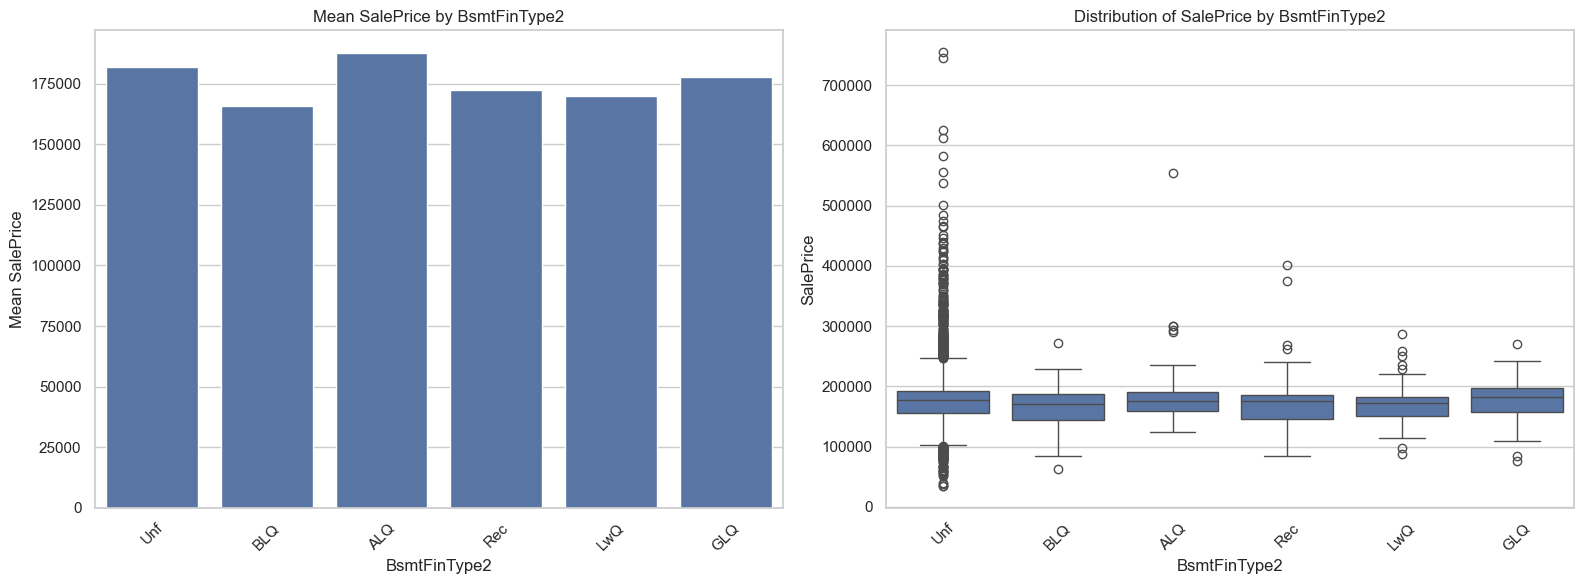

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


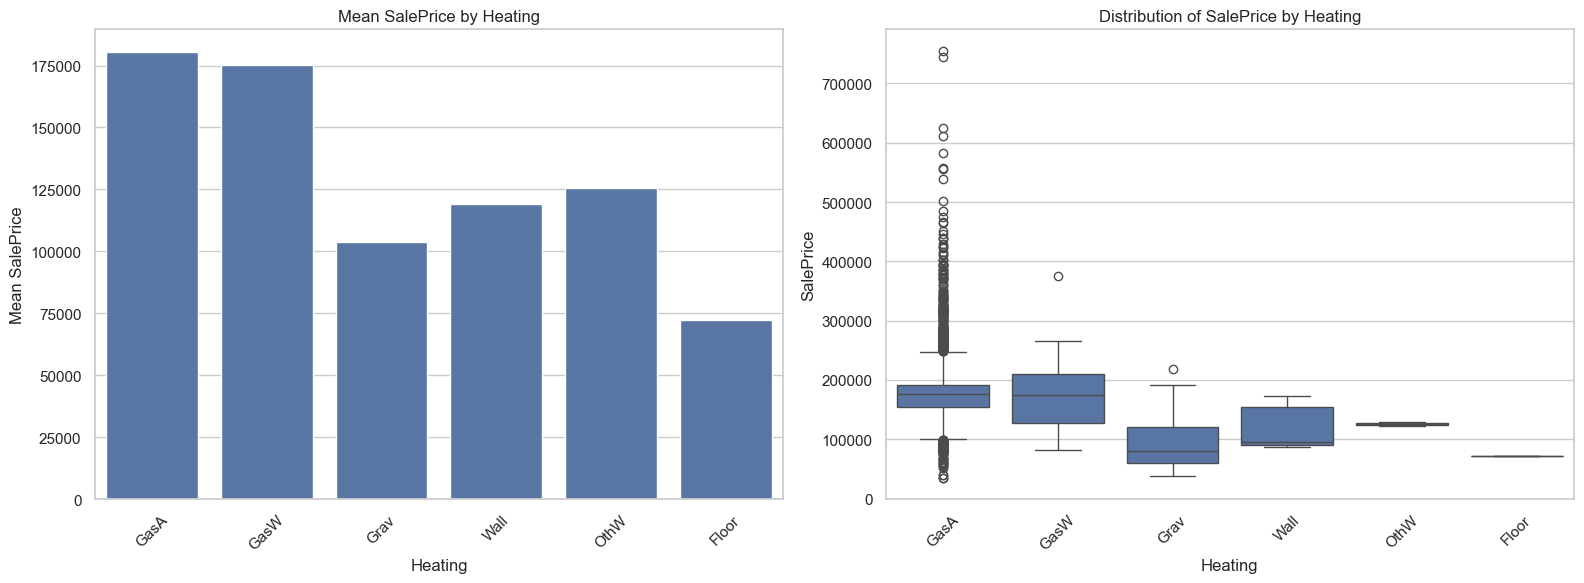

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


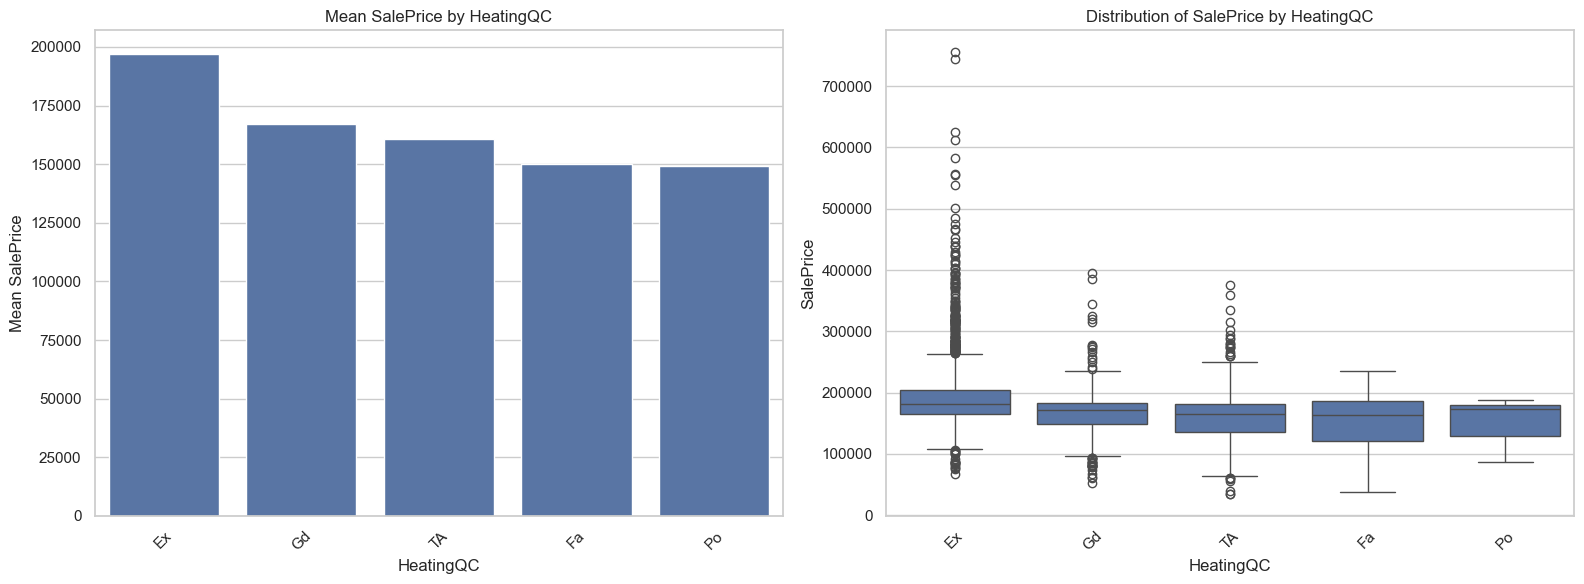

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


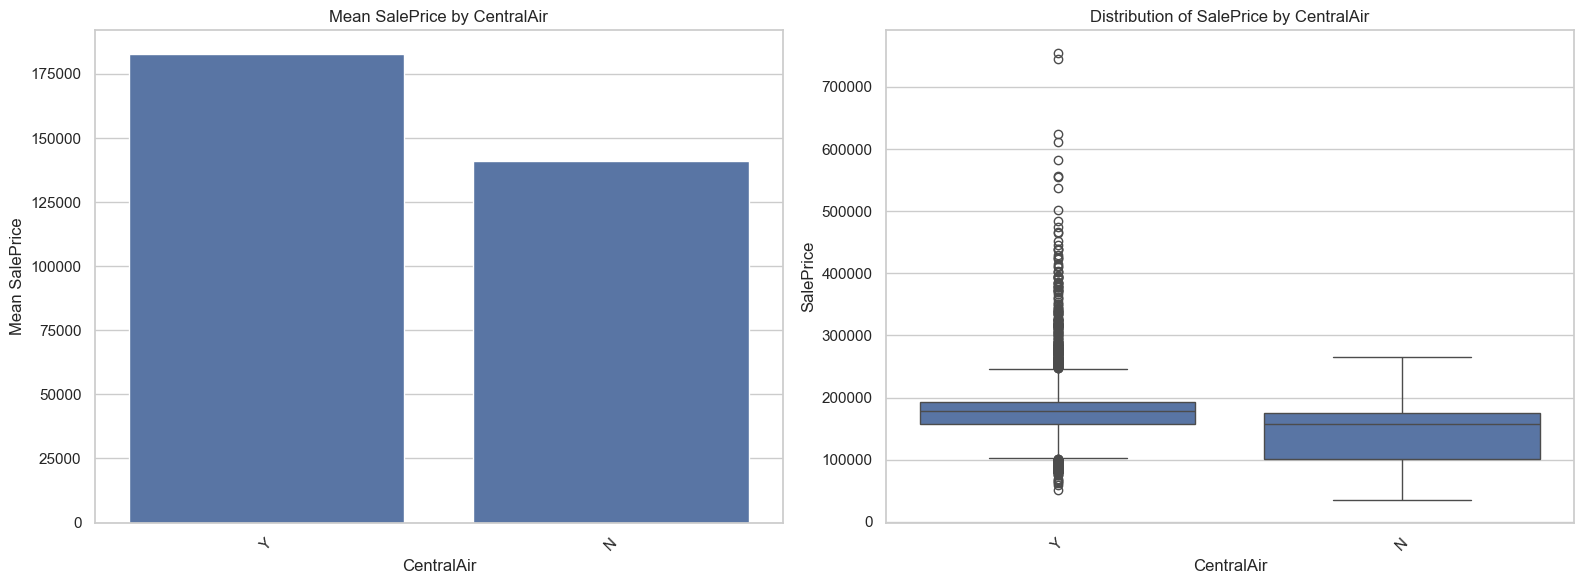

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


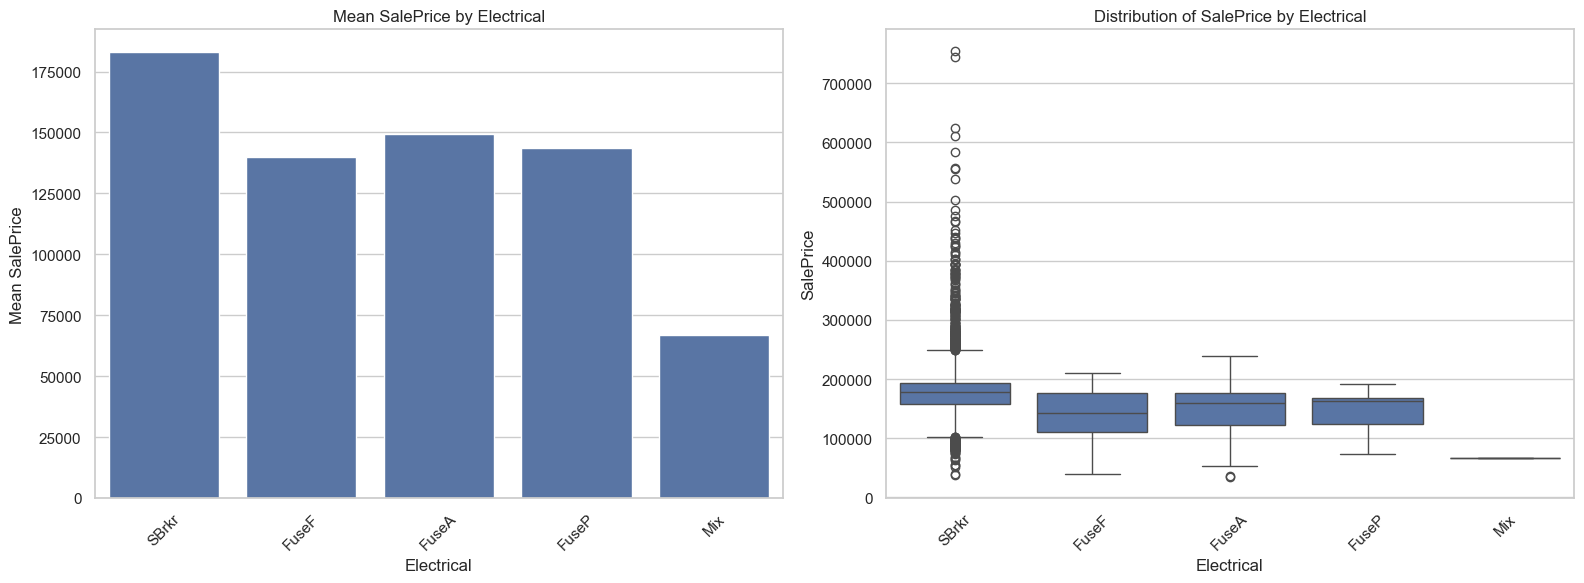

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


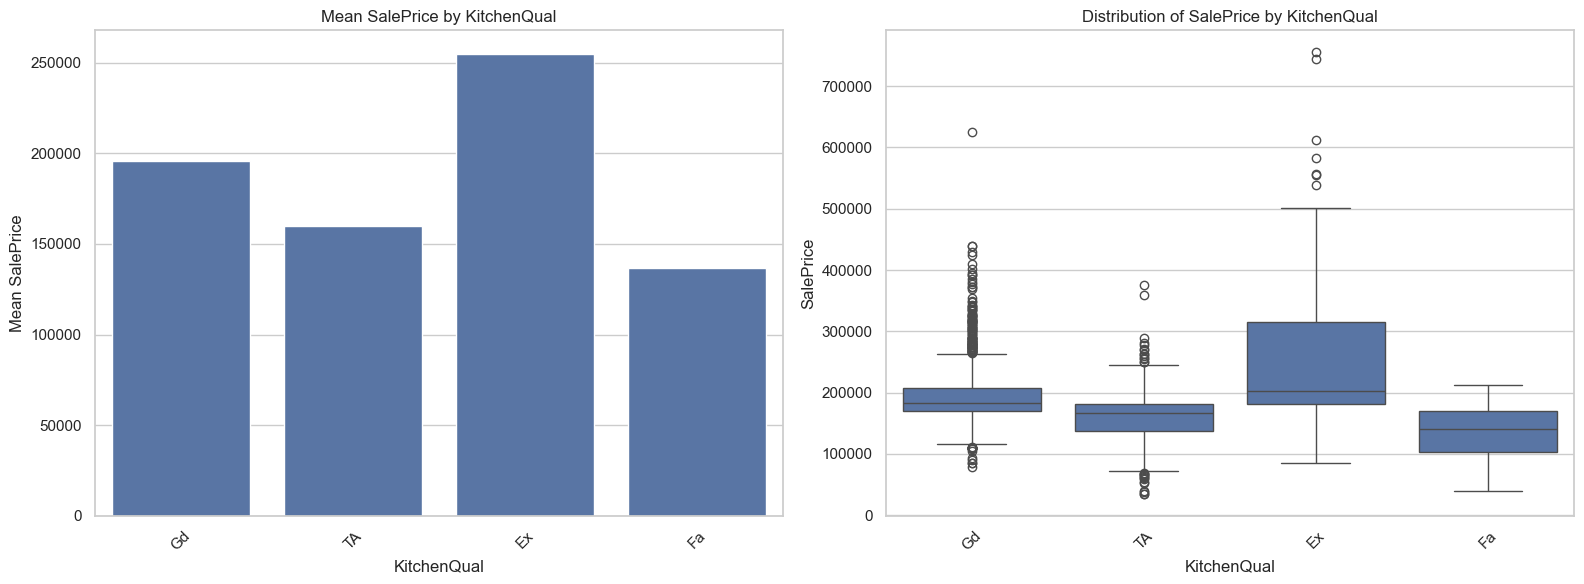

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


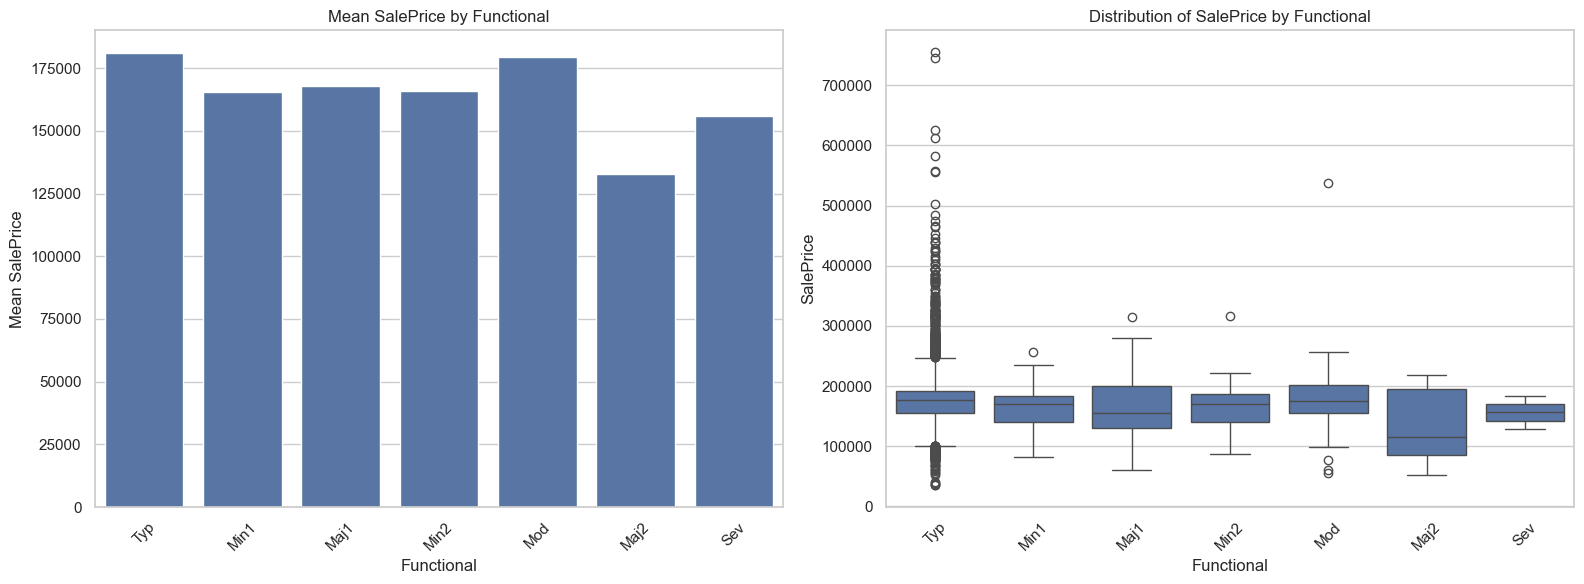

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


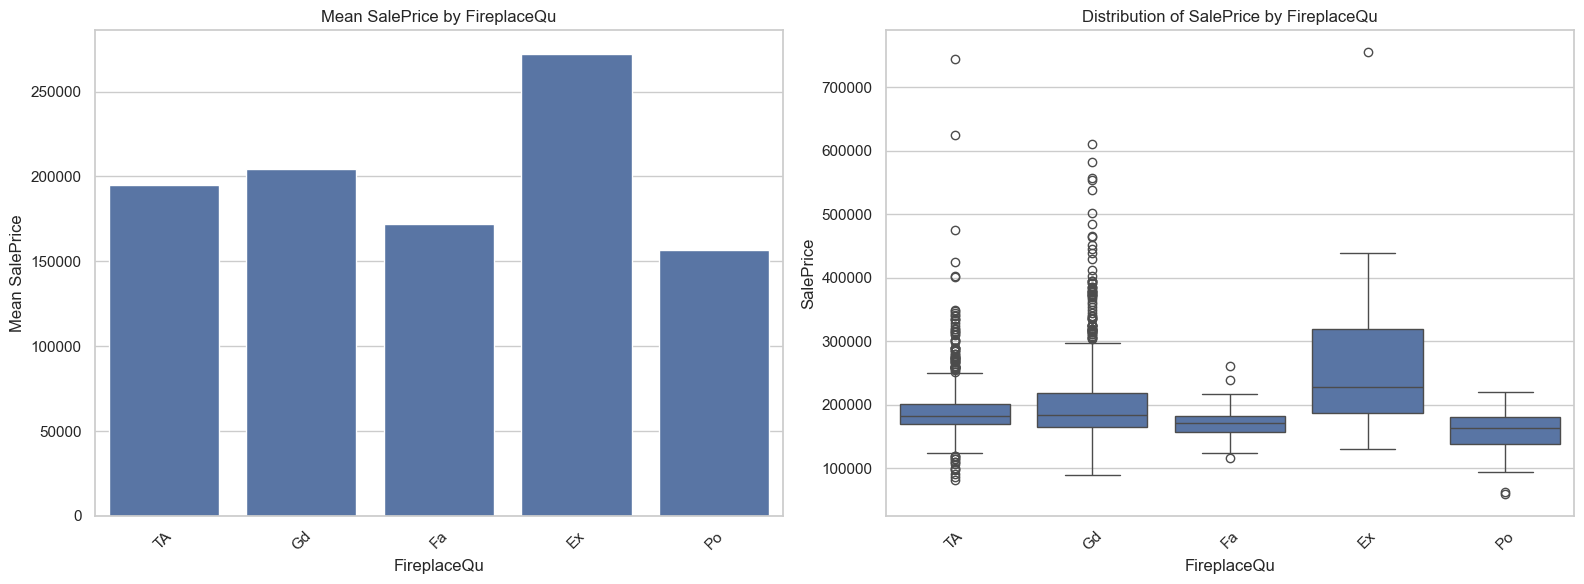

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


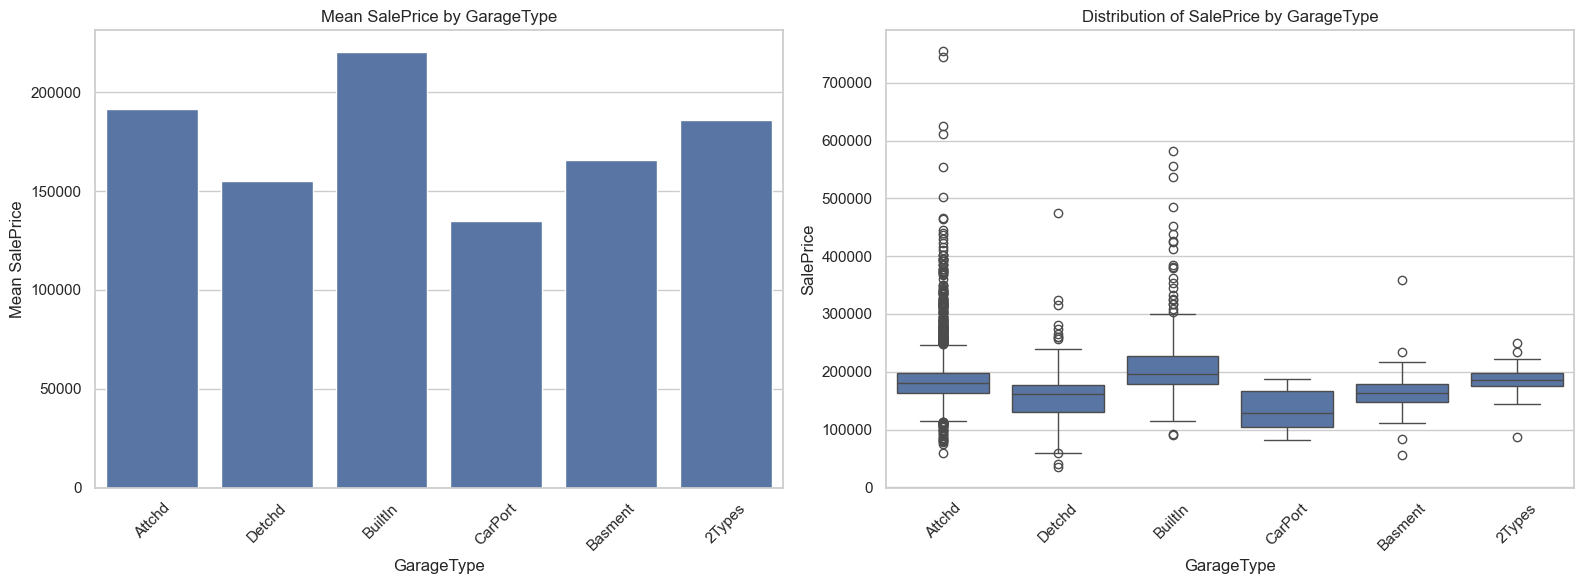

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


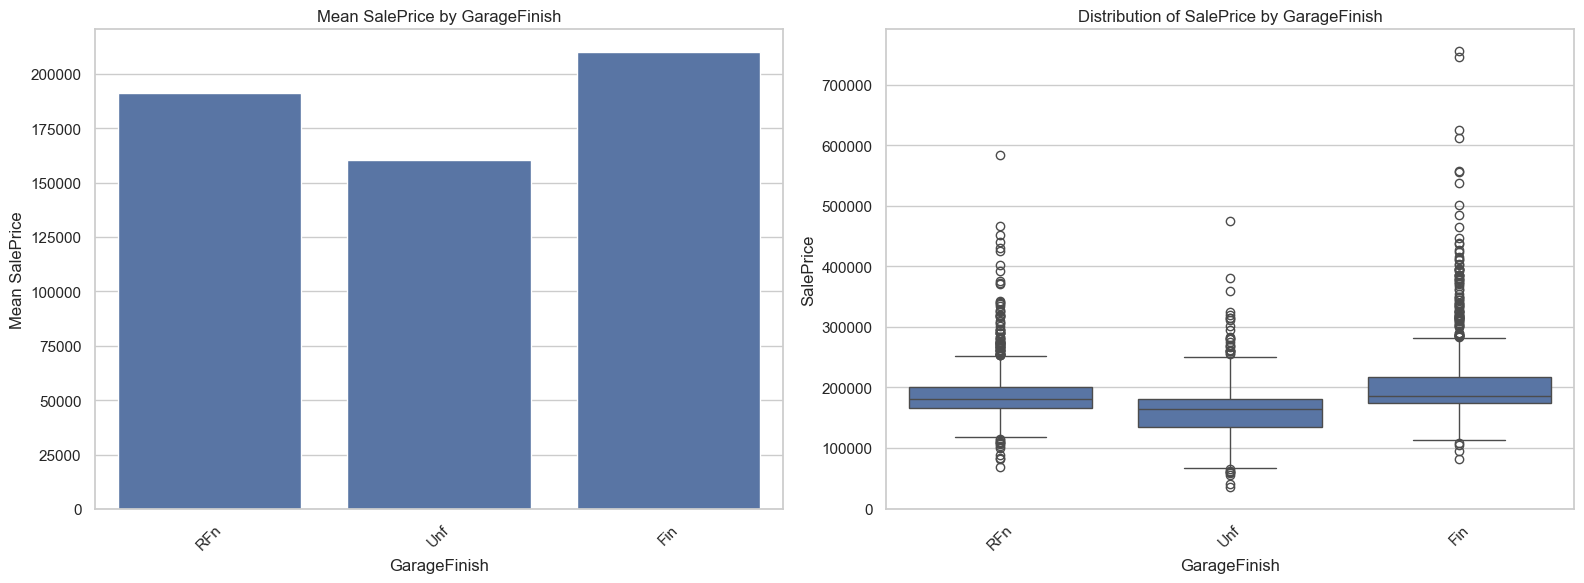

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


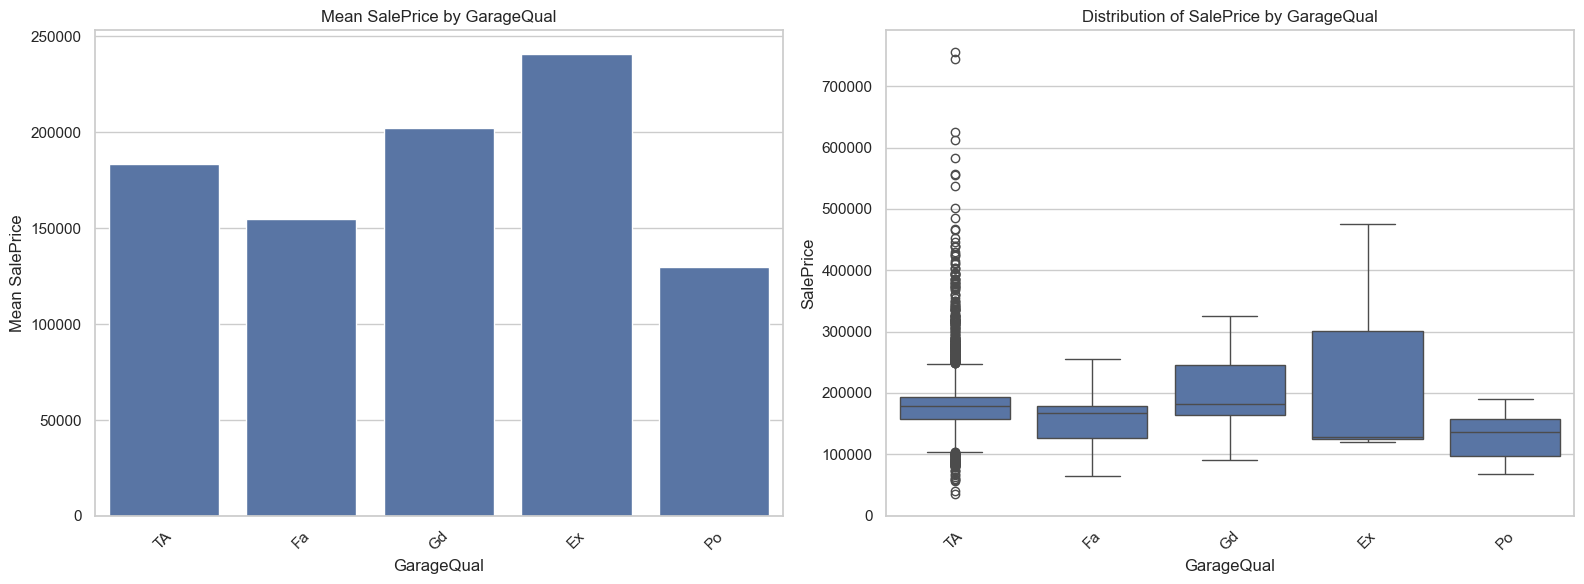

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


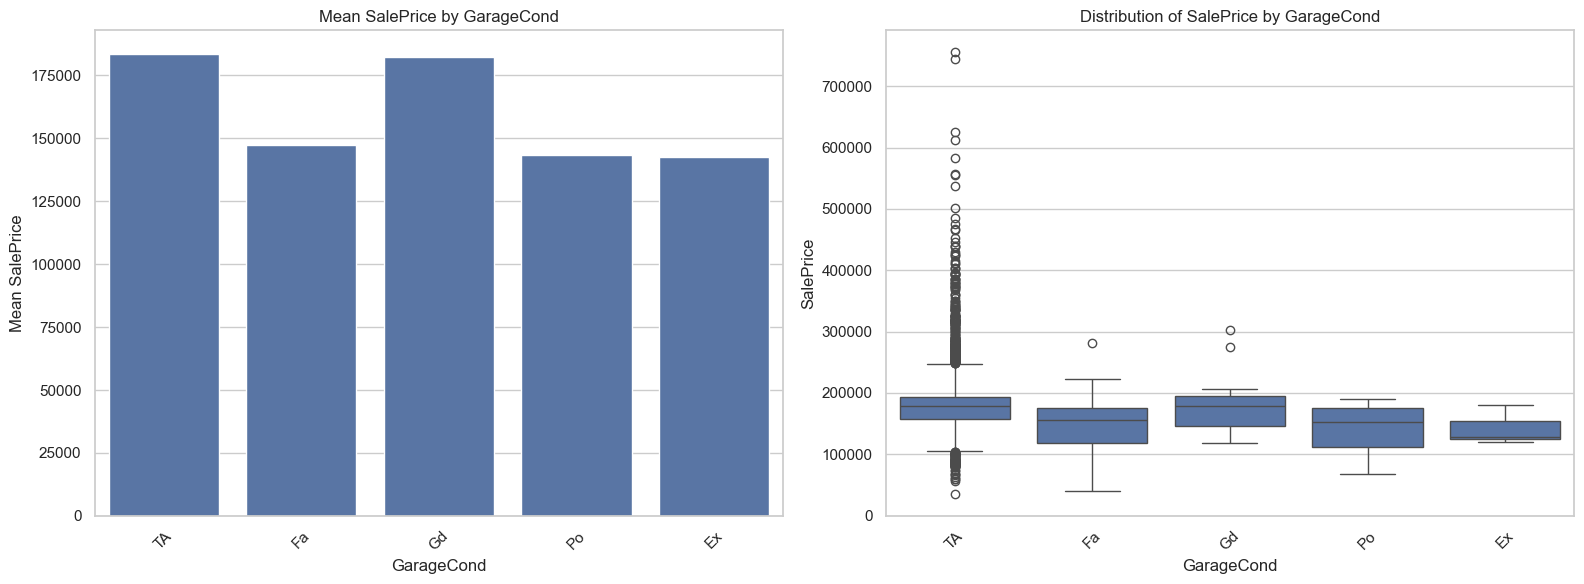

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


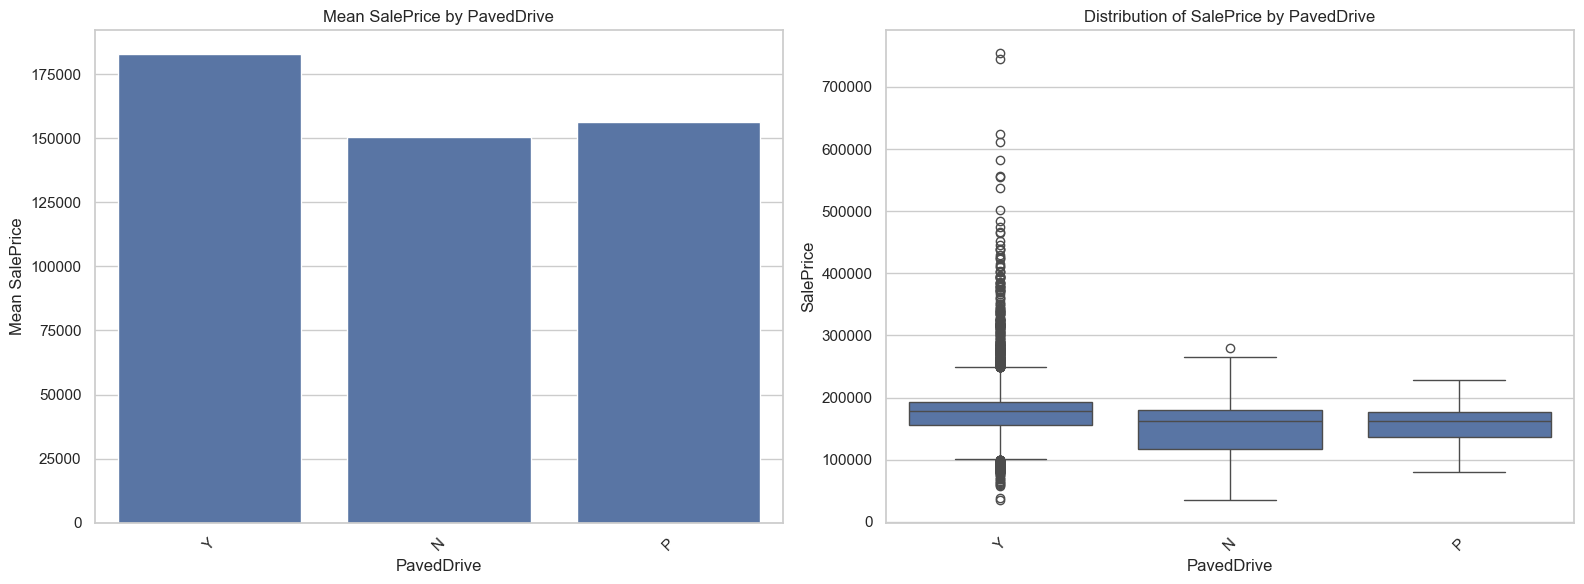

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


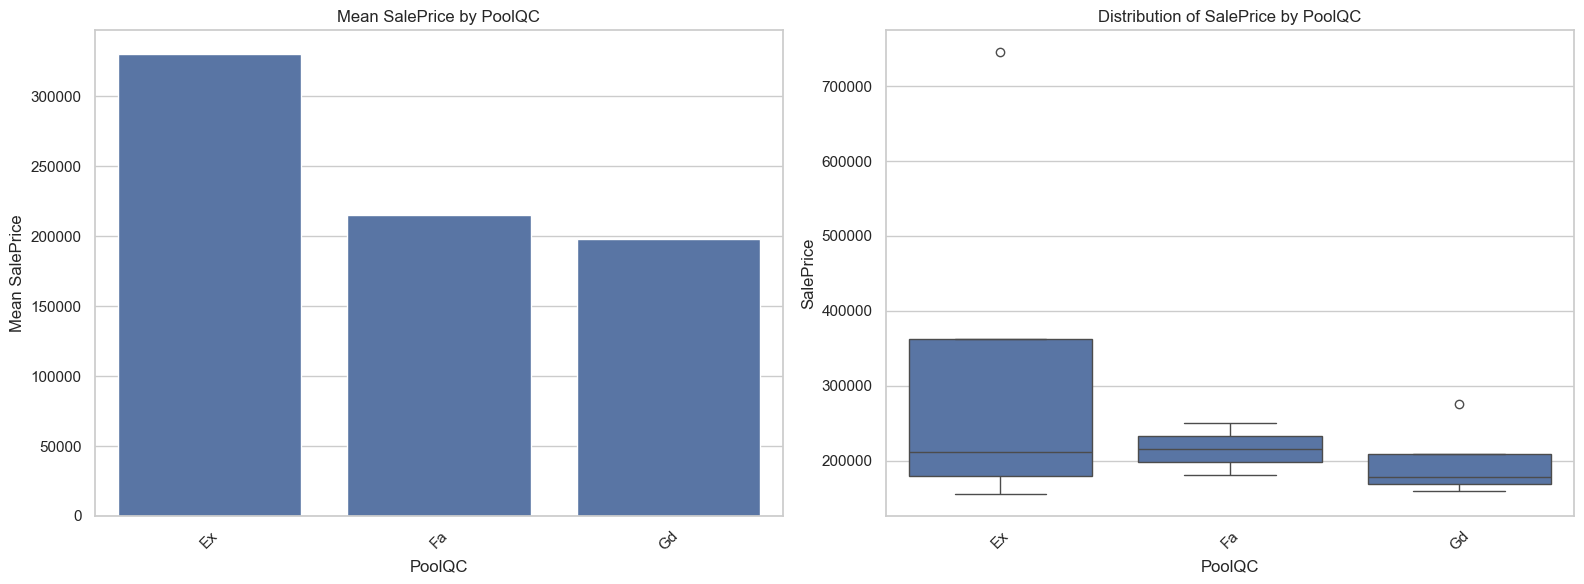

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


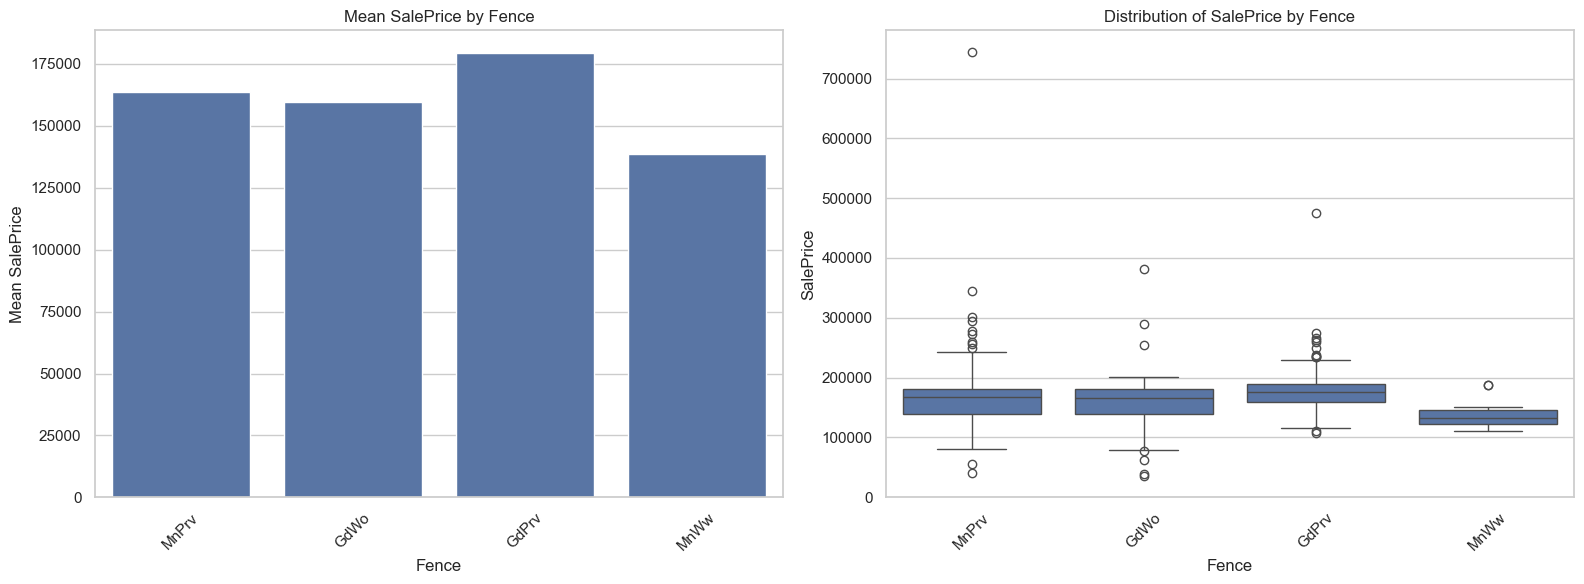

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


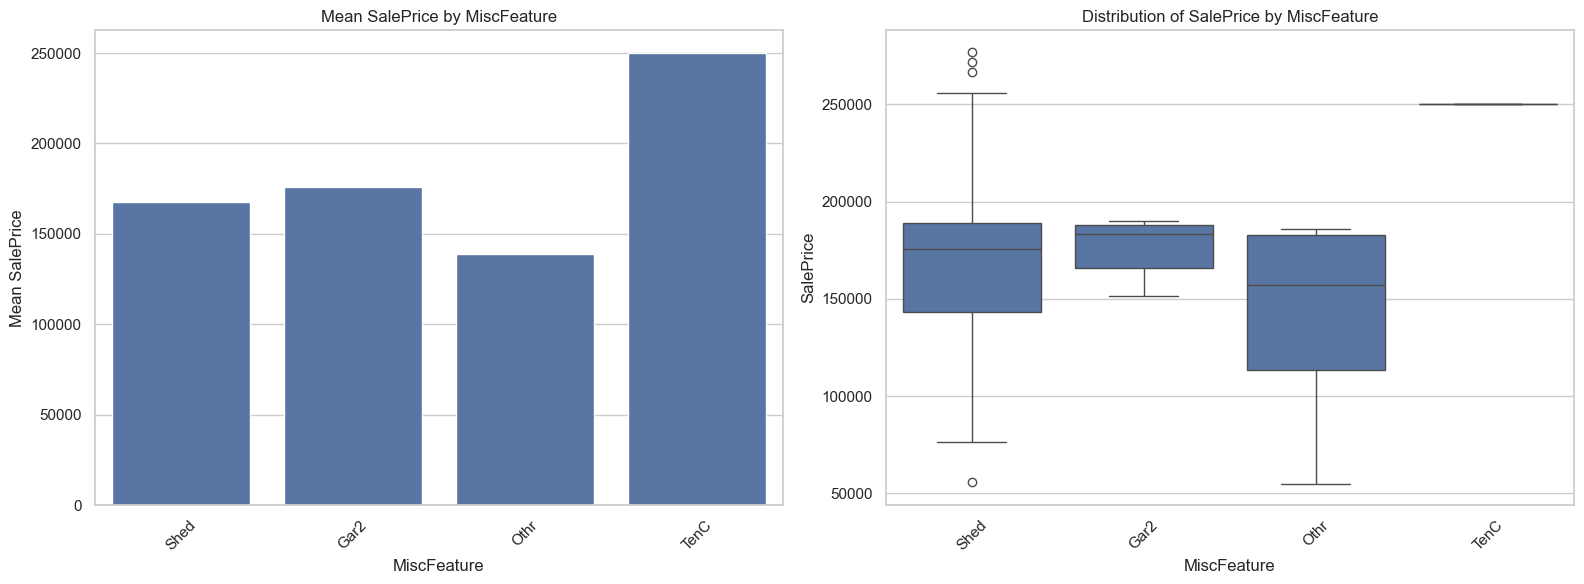

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


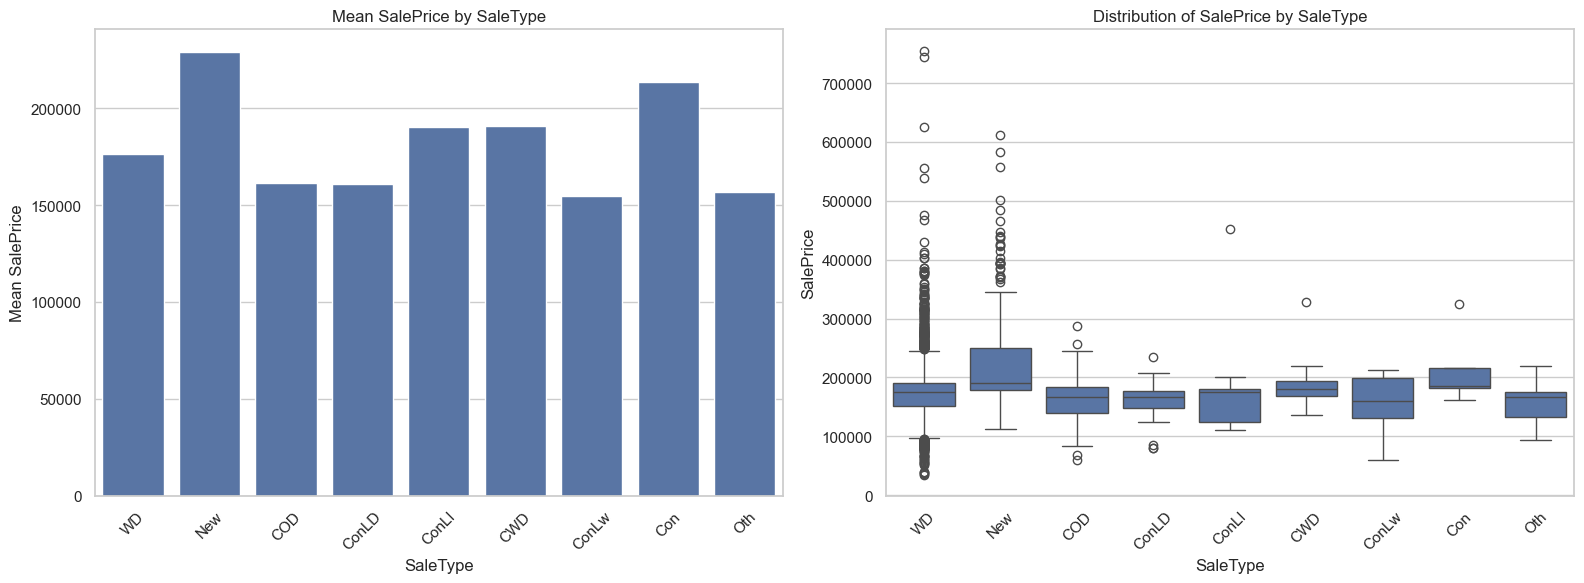

C:\Users\Durjay\AppData\Local\Temp\ipykernel_50988\3969534867.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)


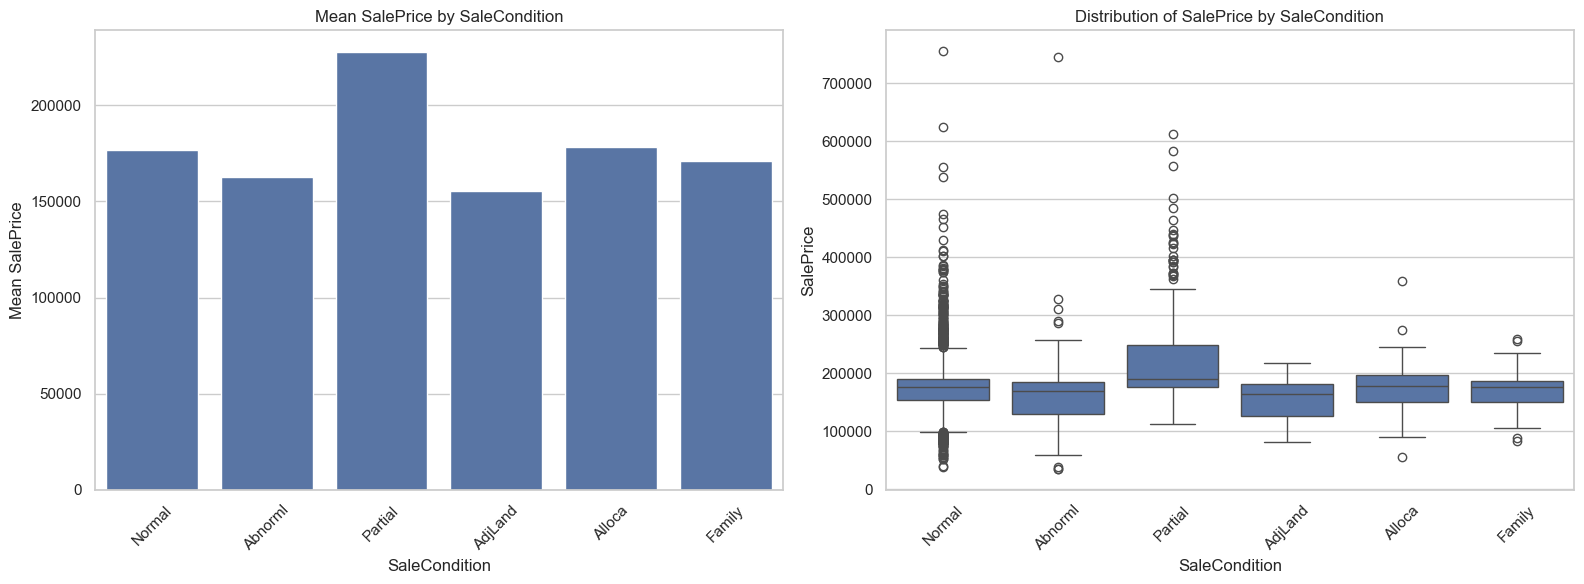

In [49]:
features = object_categorical_features

for feature in features:
    plt.figure(figsize=(16, 6))

    # Bar Plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=feature, y='SalePrice', data=dataset, ci=None)
    plt.title(f'Mean SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.ylabel('Mean SalePrice')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=feature, y='SalePrice', data=dataset)
    plt.title(f'Distribution of SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.ylabel('SalePrice')

    plt.tight_layout()
    plt.show()


- In this part of the analysis, we are focusing on exploring the relationships between categorical features and the target variable, `SalePrice`. For encoding categorical variables, we will use mean encoding in the feature engineering phase.

## Visualizing SalePrice by Numerical Categorical Features

- Created side-by-side bar and box plots for numerical categorical features to analyze their relationship with `SalePrice`.


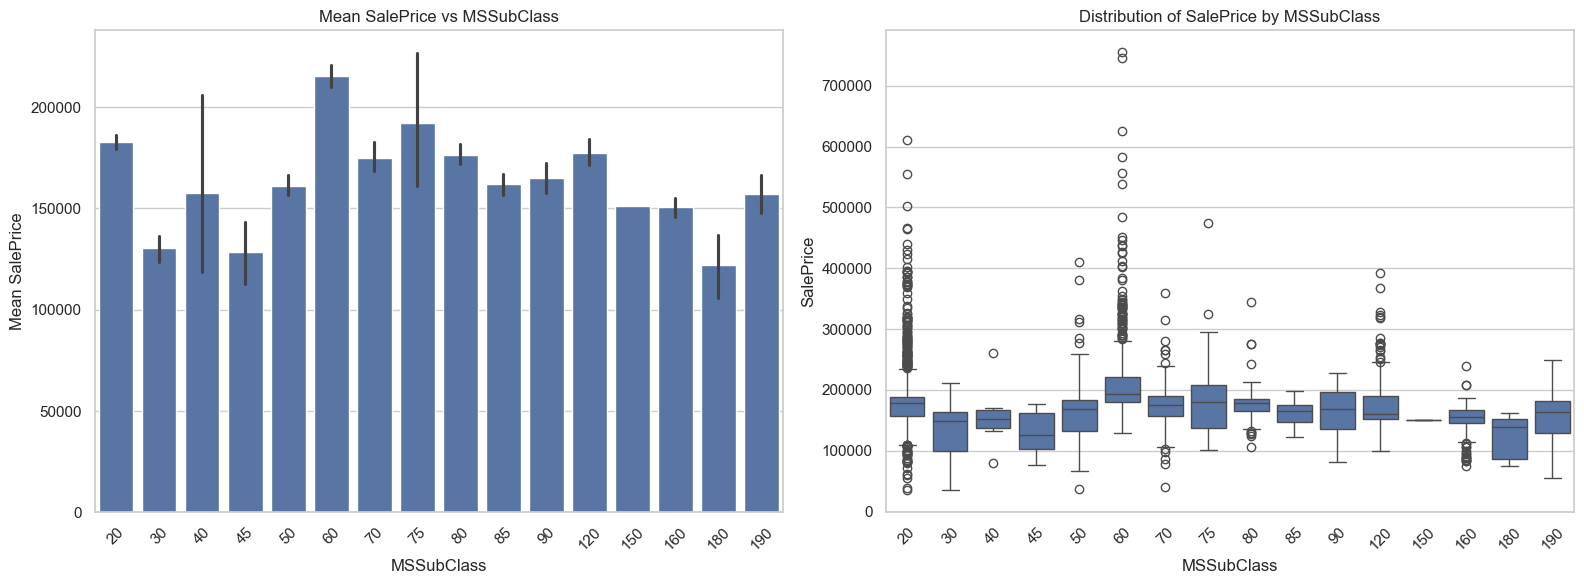

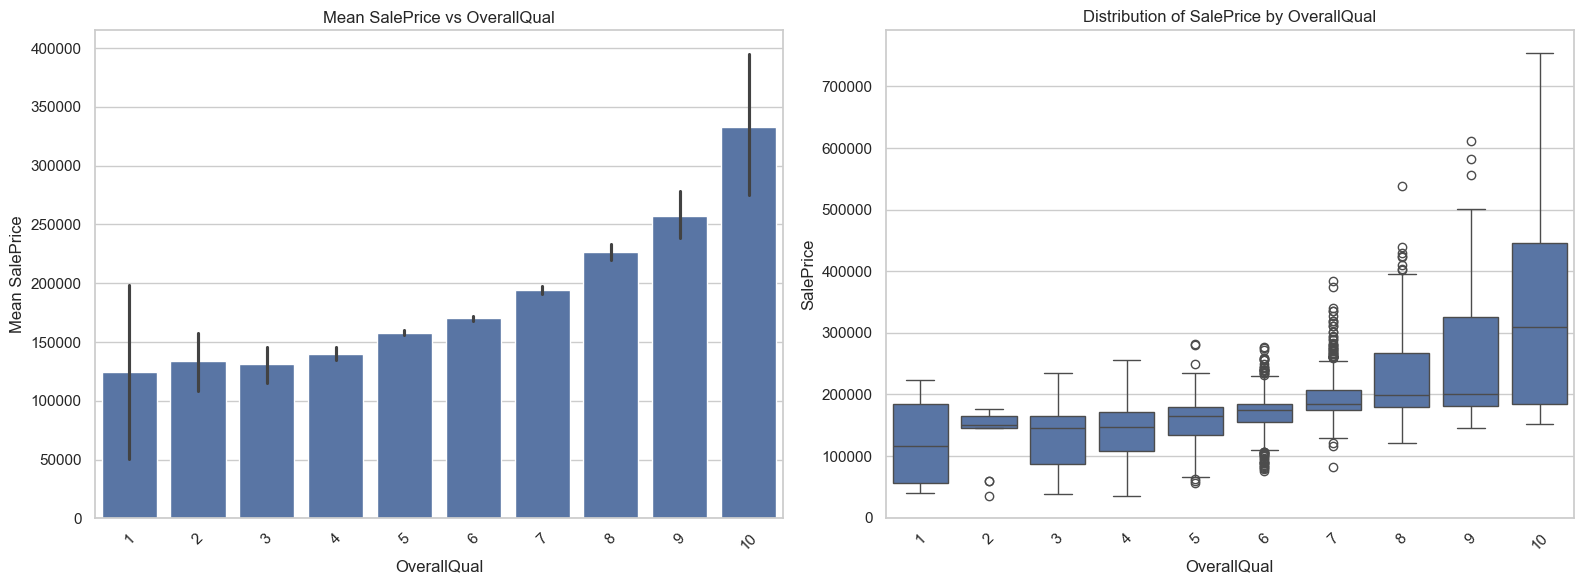

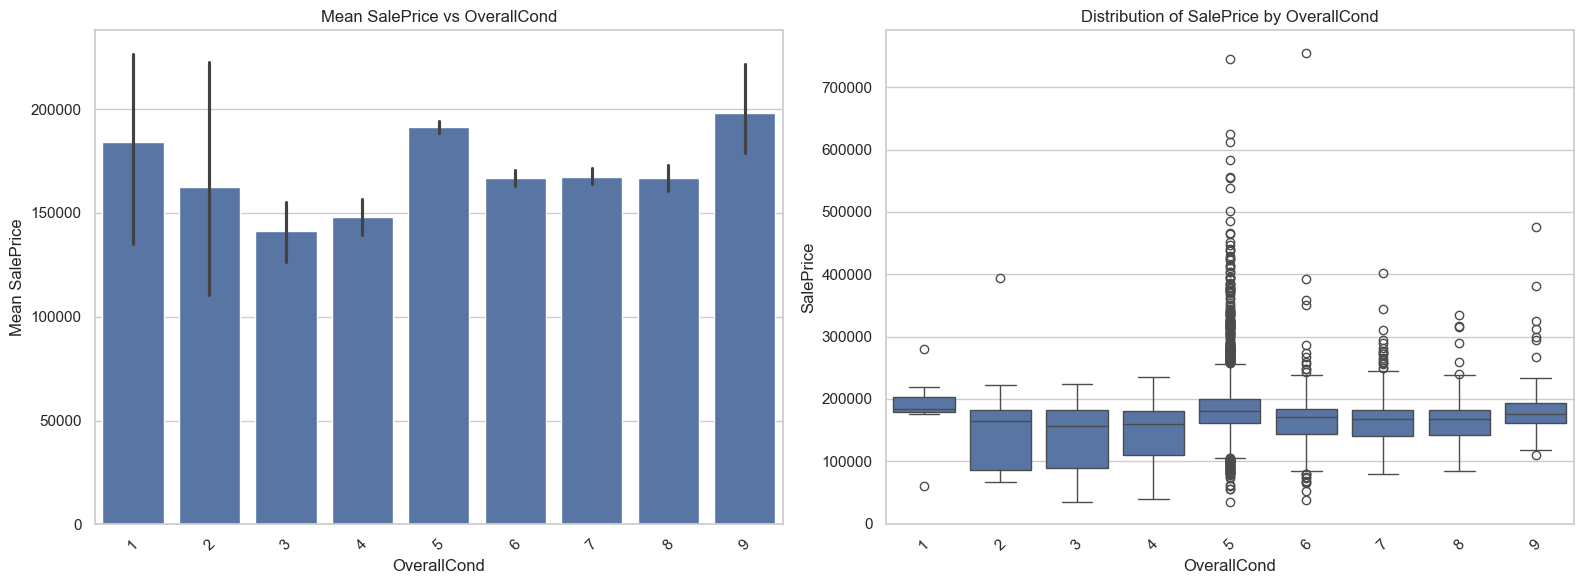

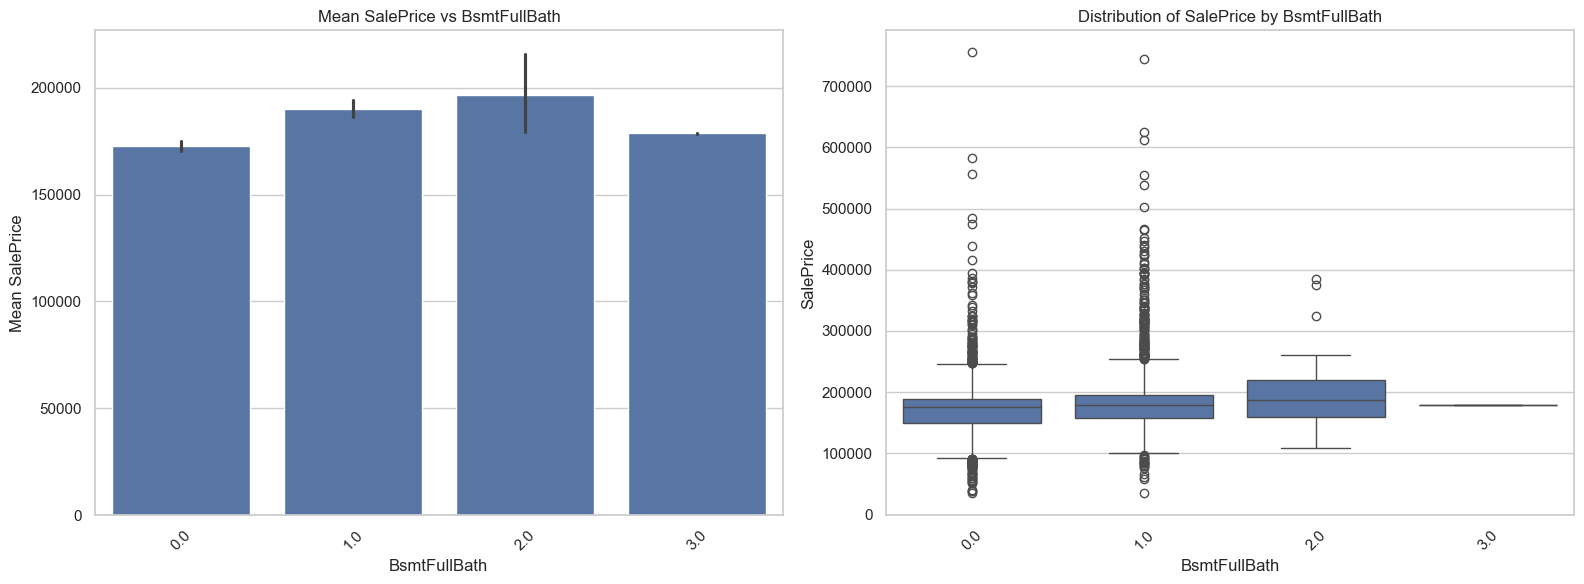

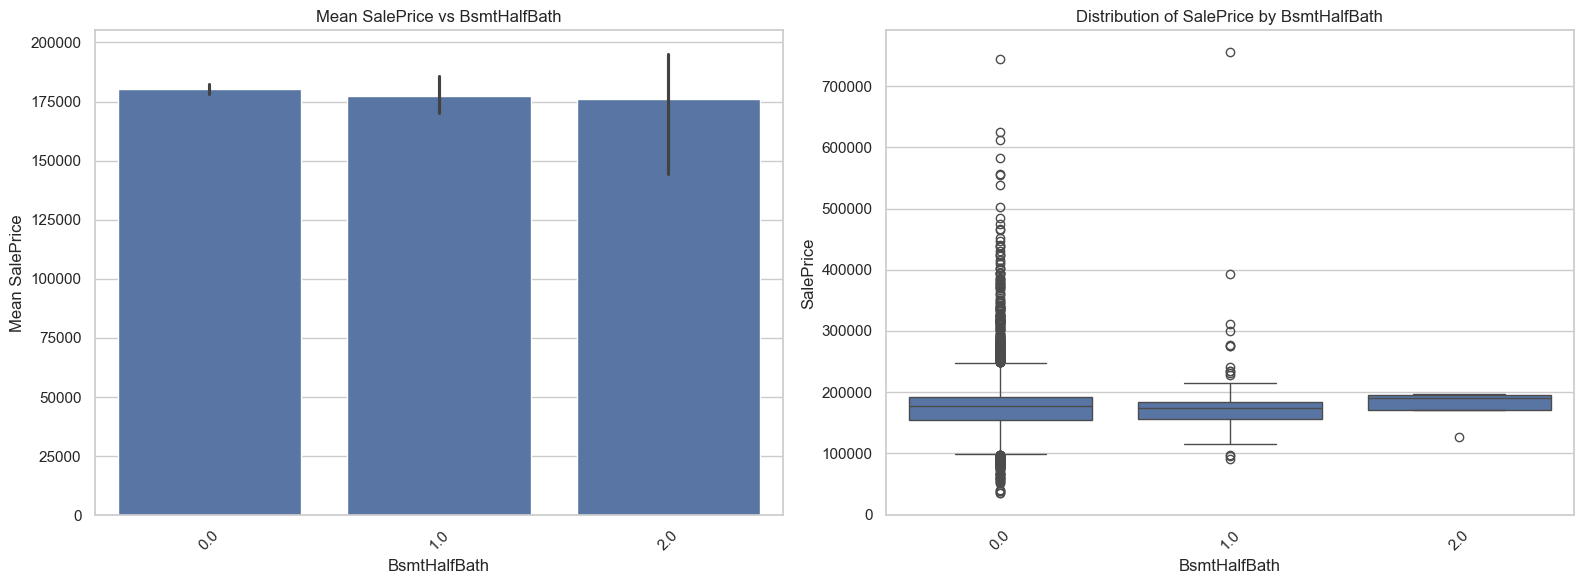

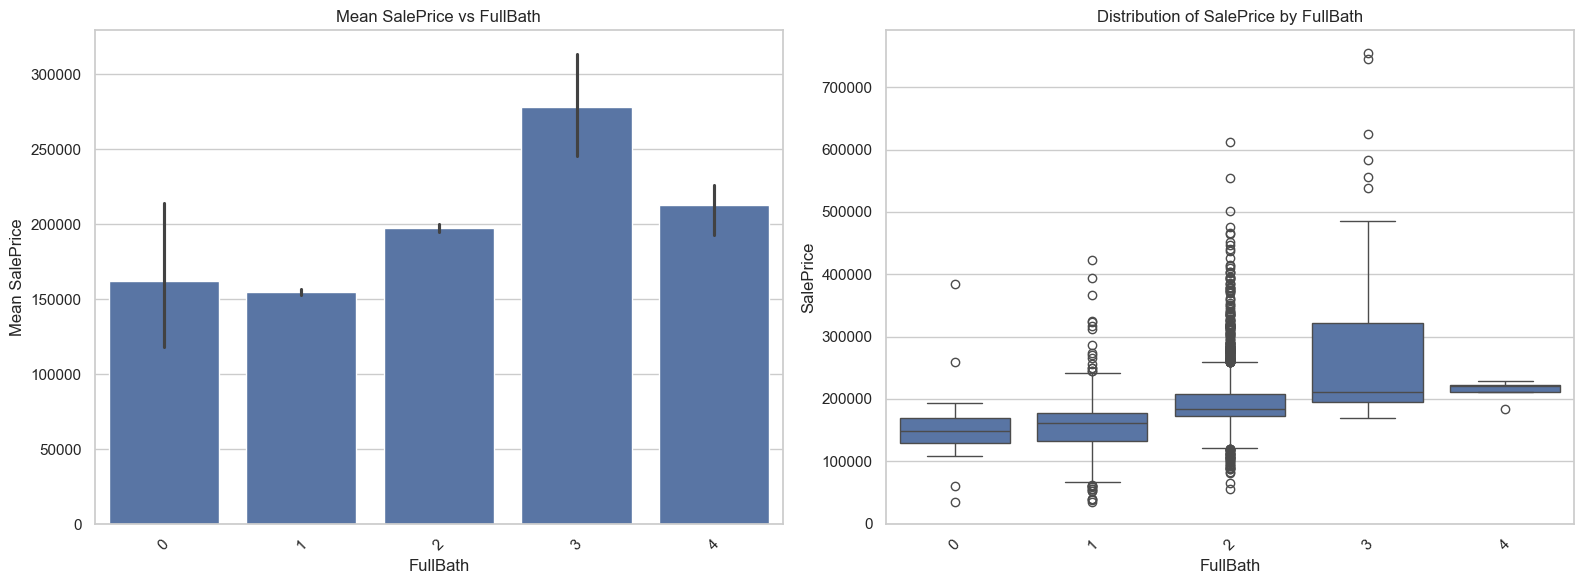

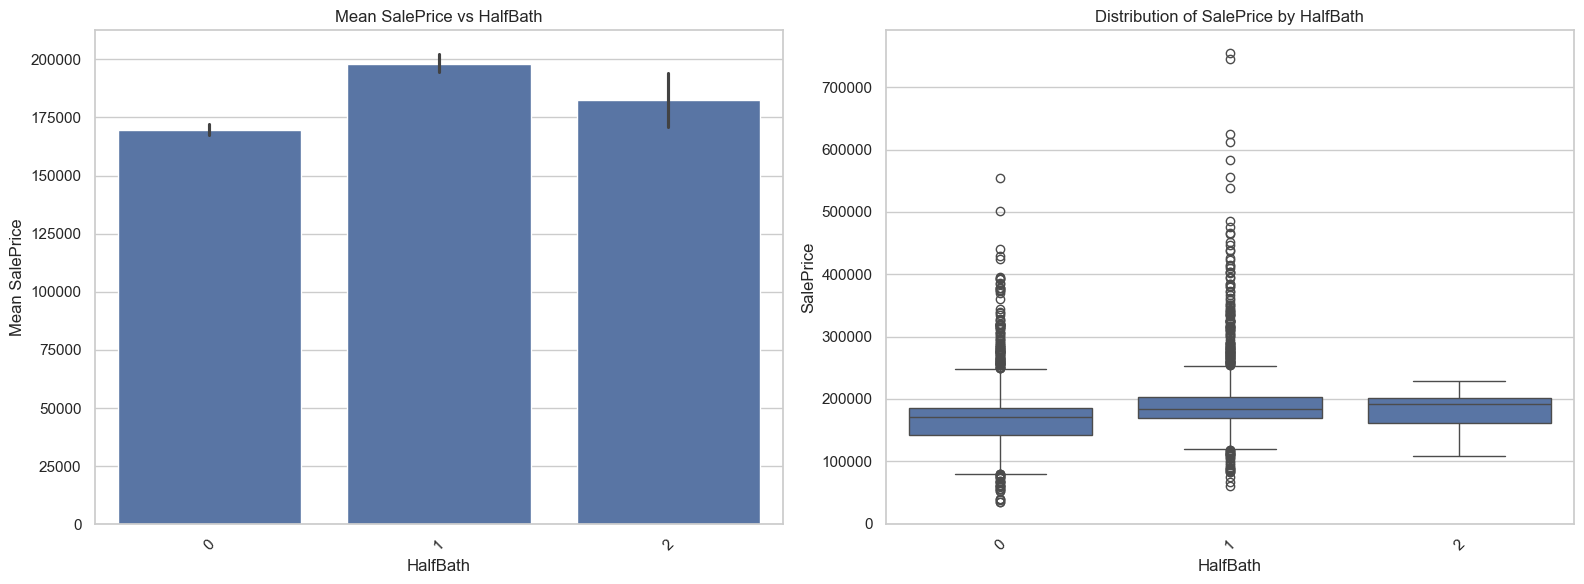

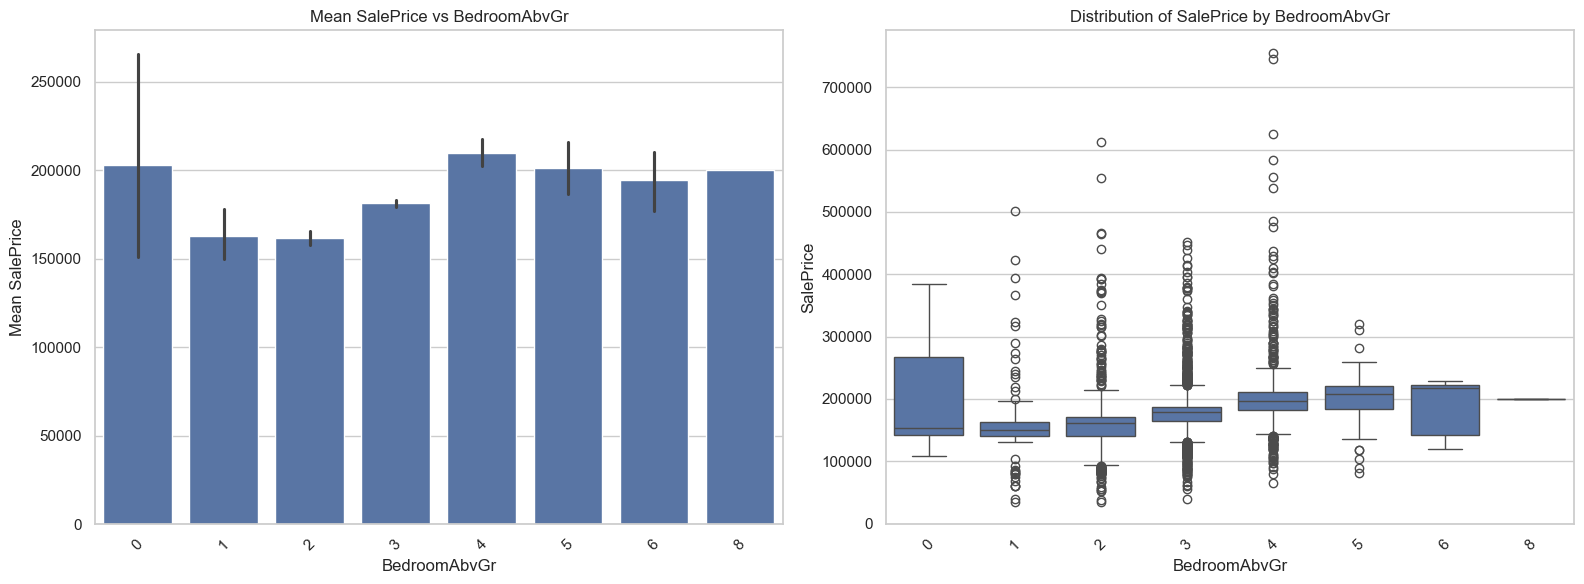

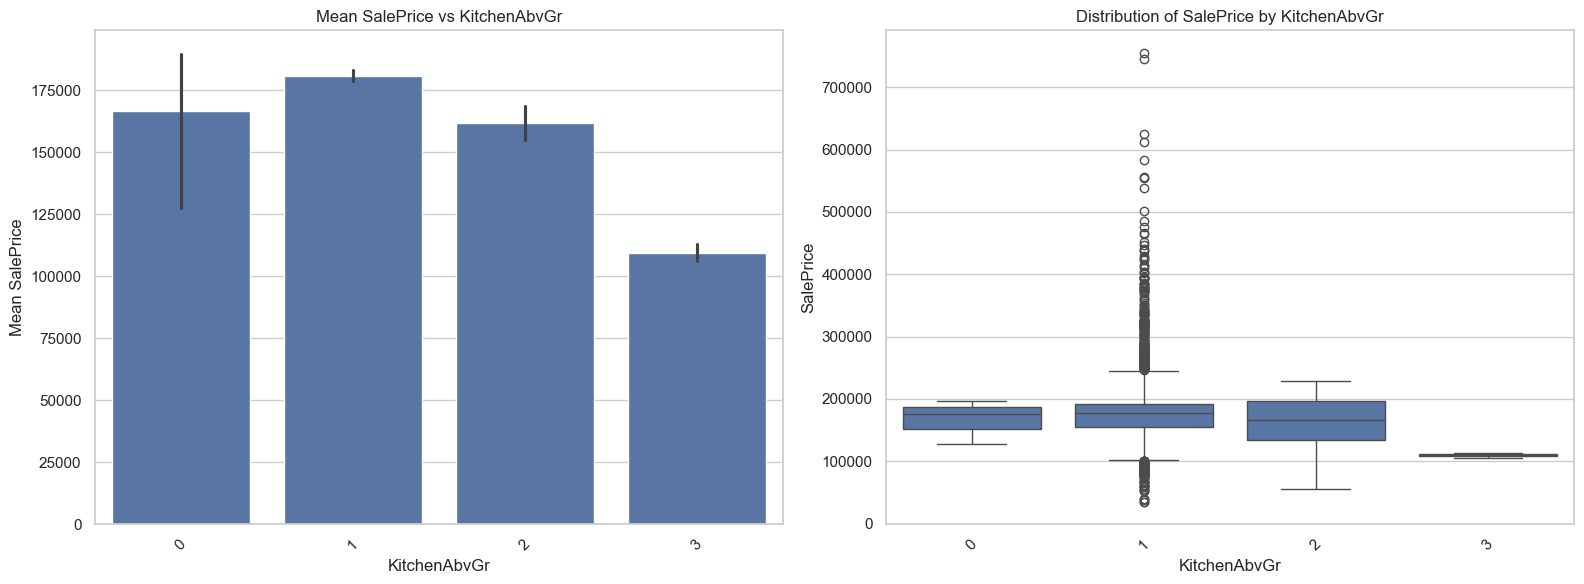

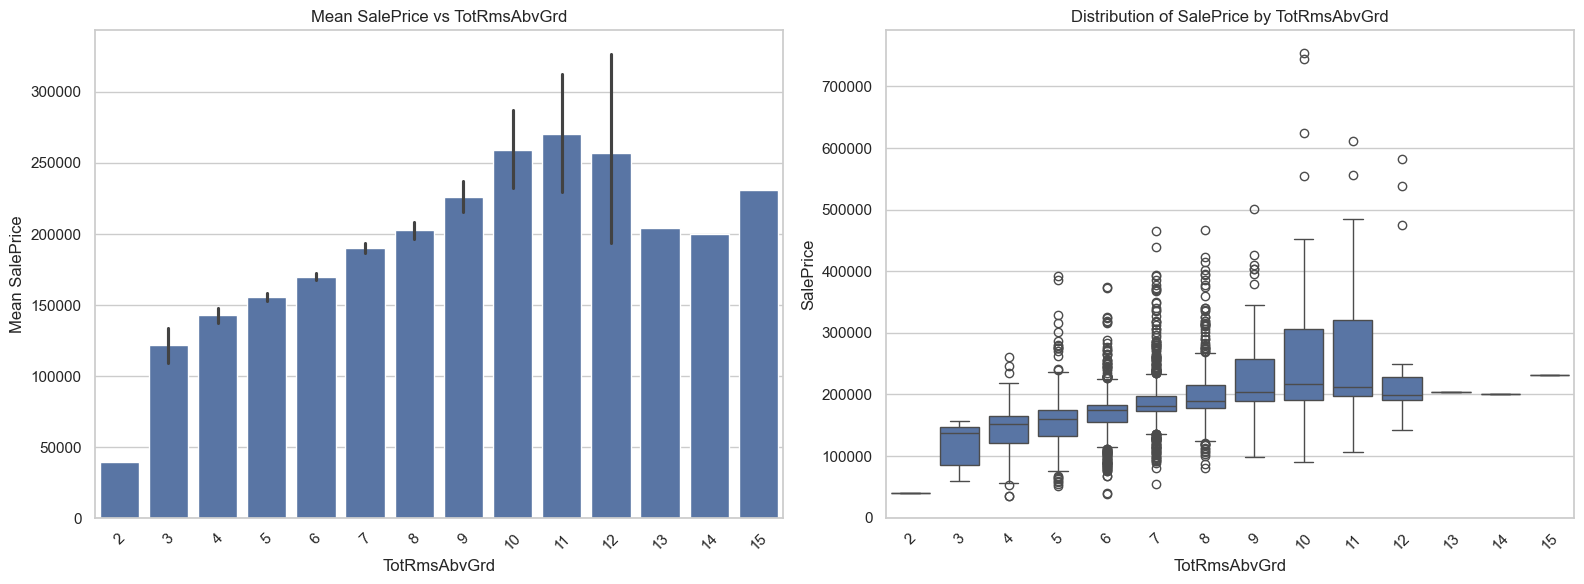

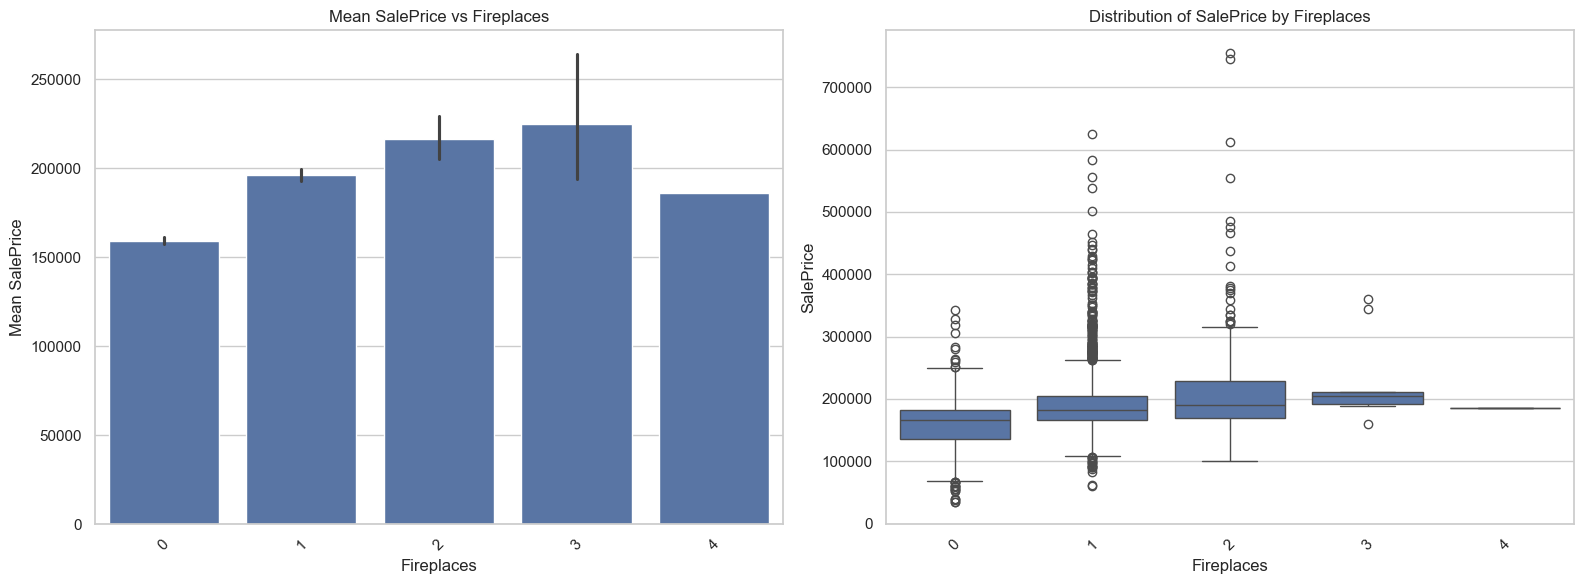

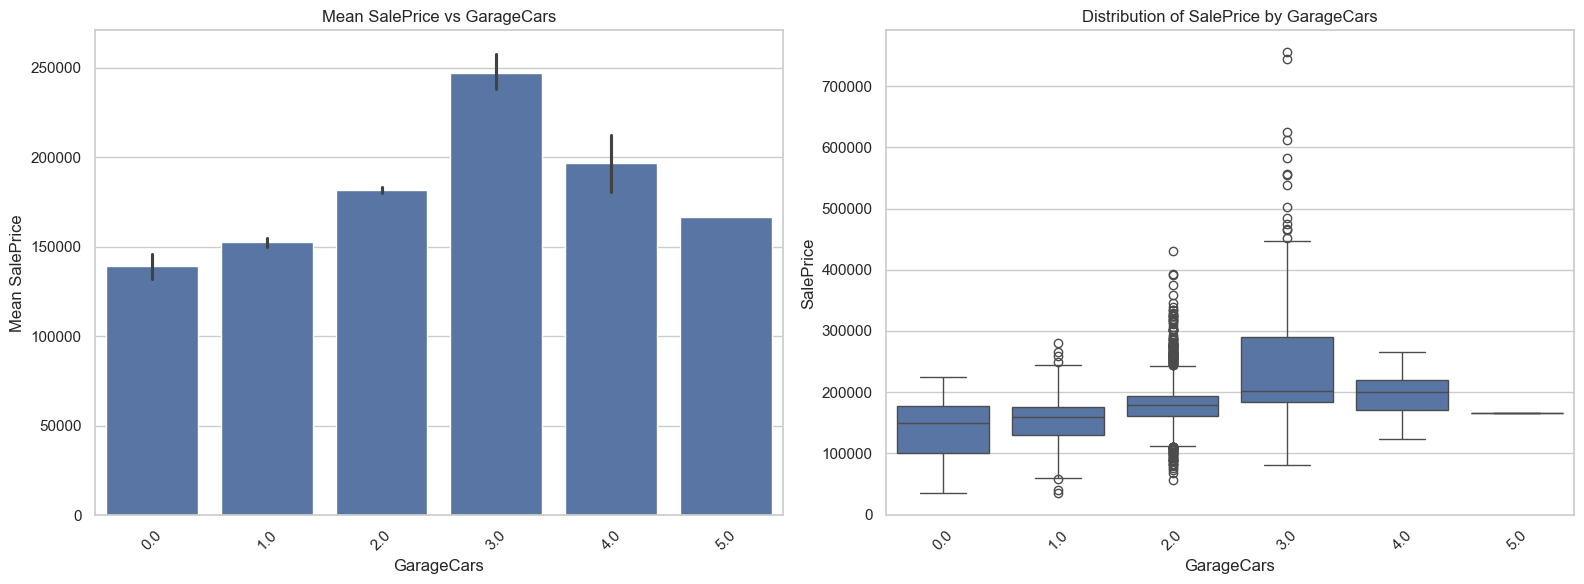

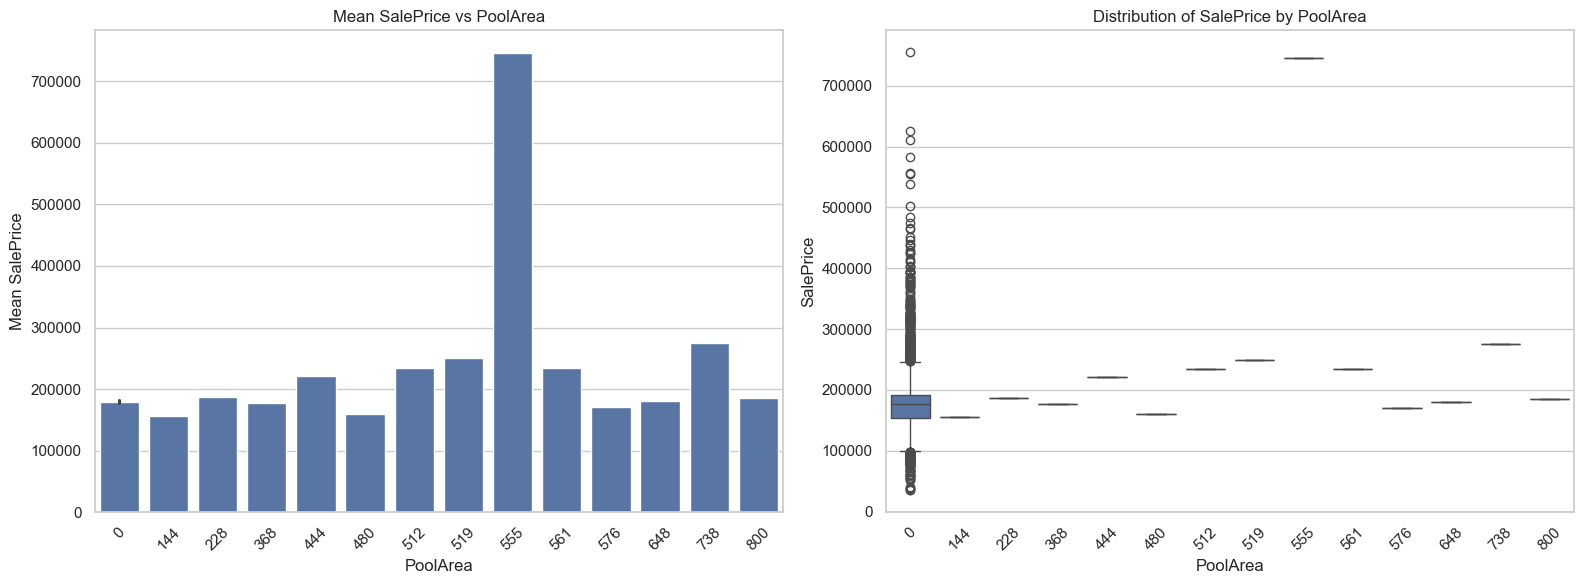

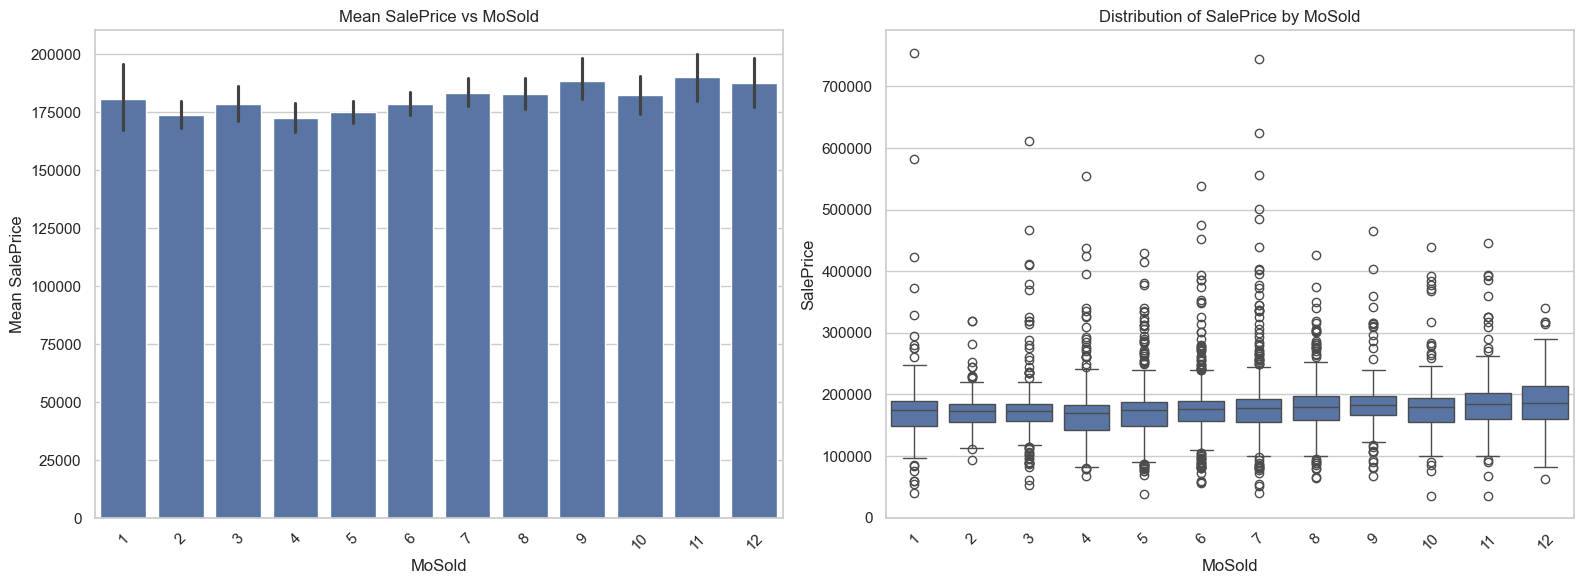

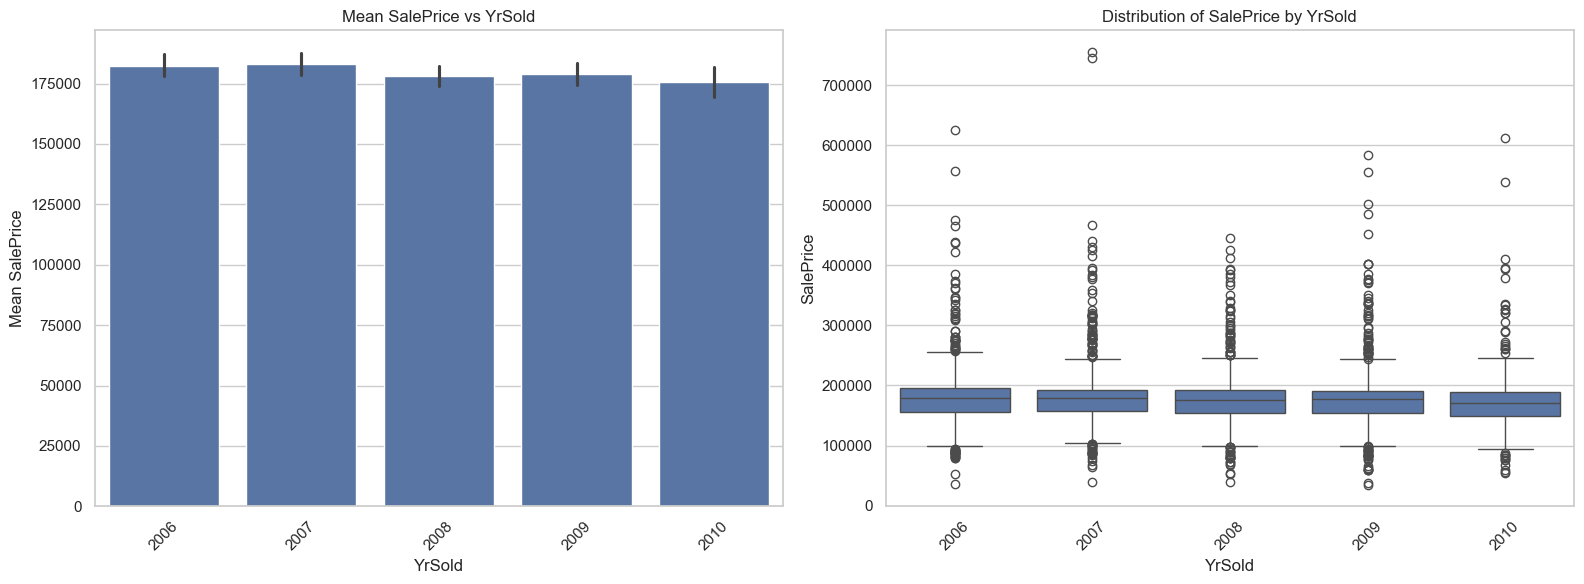

In [50]:
for feature in numerical_categorical_features:
    plt.figure(figsize=(16, 6))  

    # Bar Plot
    plt.subplot(1, 2, 1)  
    sns.barplot(data=dataset, x=feature, y='SalePrice', estimator='mean')
    plt.title(f'Mean SalePrice vs {feature}')
    plt.xticks(rotation=45)  
    plt.xlabel(feature)
    plt.ylabel('Mean SalePrice')

    # Box Plot
    plt.subplot(1, 2, 2)  
    sns.boxplot(data=dataset, x=feature, y='SalePrice')
    plt.title(f'Distribution of SalePrice by {feature}')
    plt.xticks(rotation=45)  
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

    plt.tight_layout()  
    plt.show()

## Visualizing Numerical Continuous Features

- Plotted histograms with KDE, boxplots, and scatterplots for numerical continuous features to analyze their distribution, detect outliers, and observe their relationship with `SalePrice`.


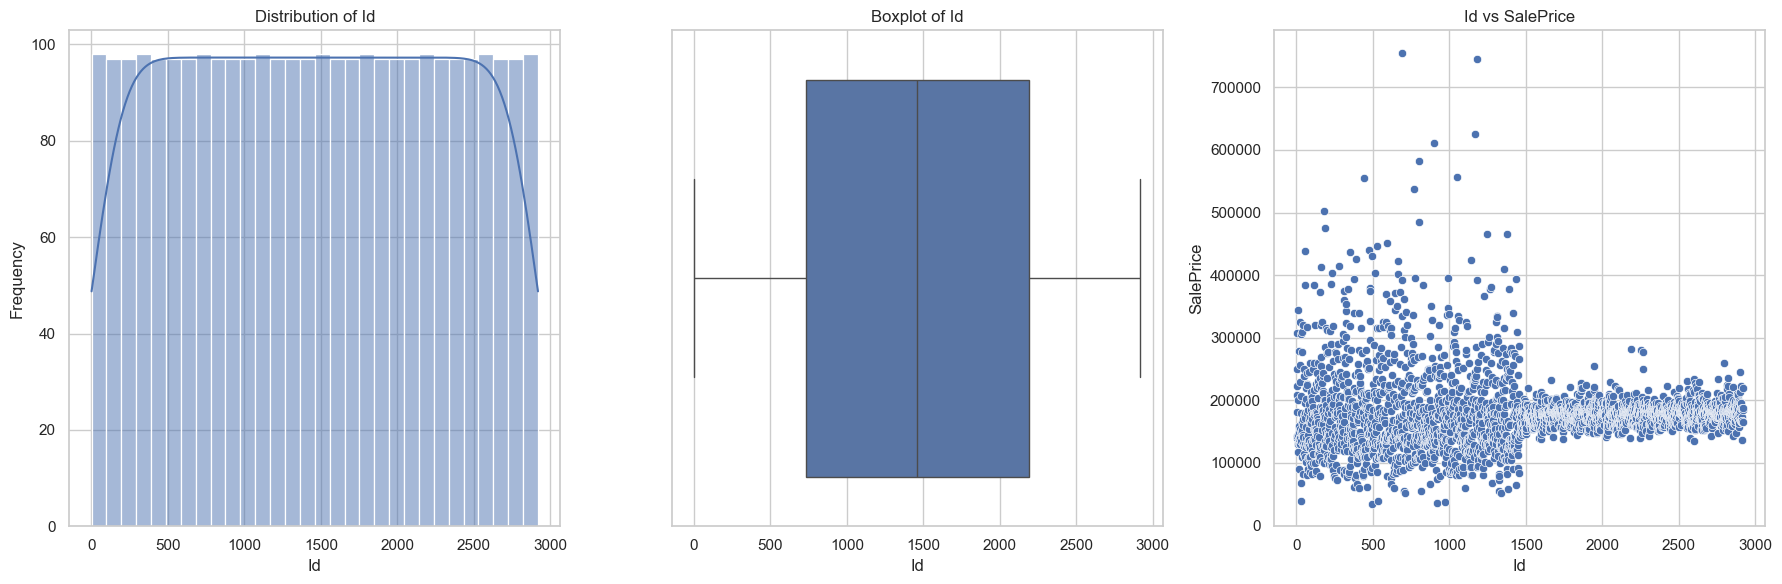

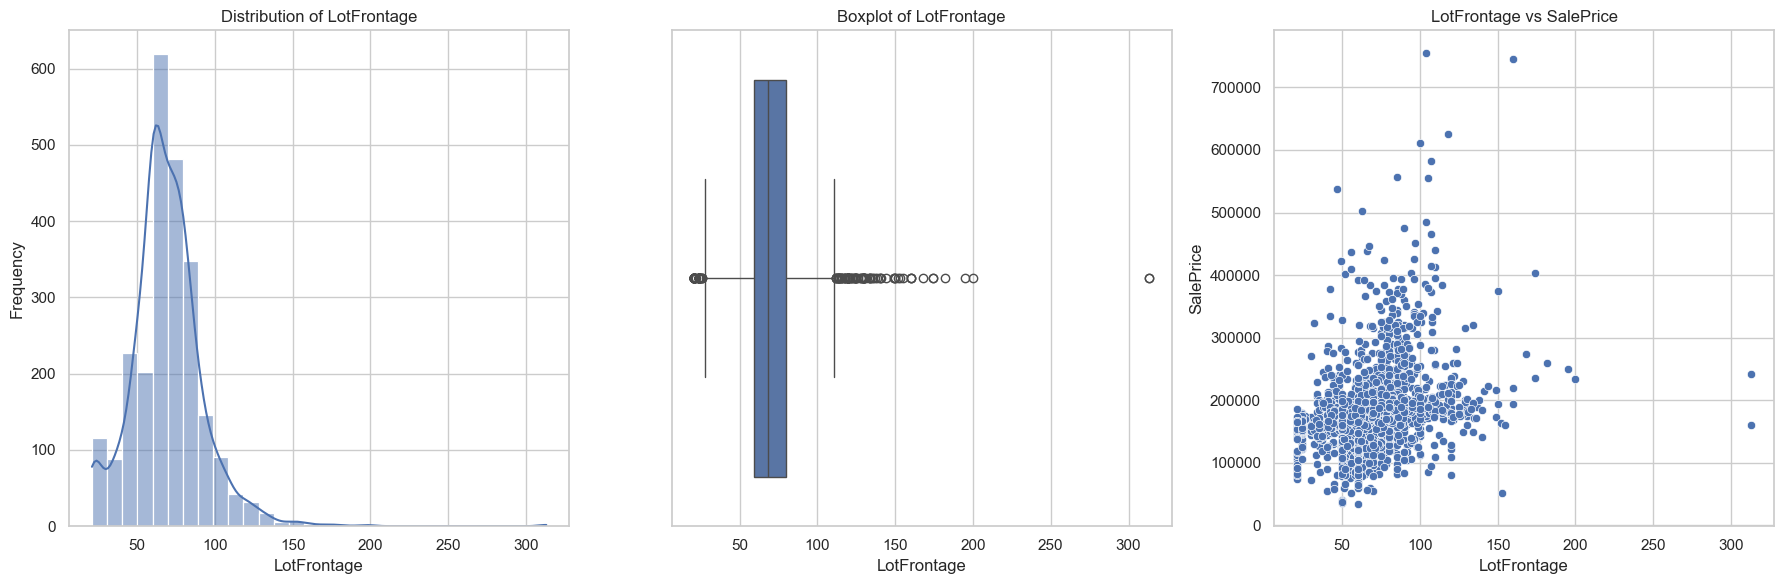

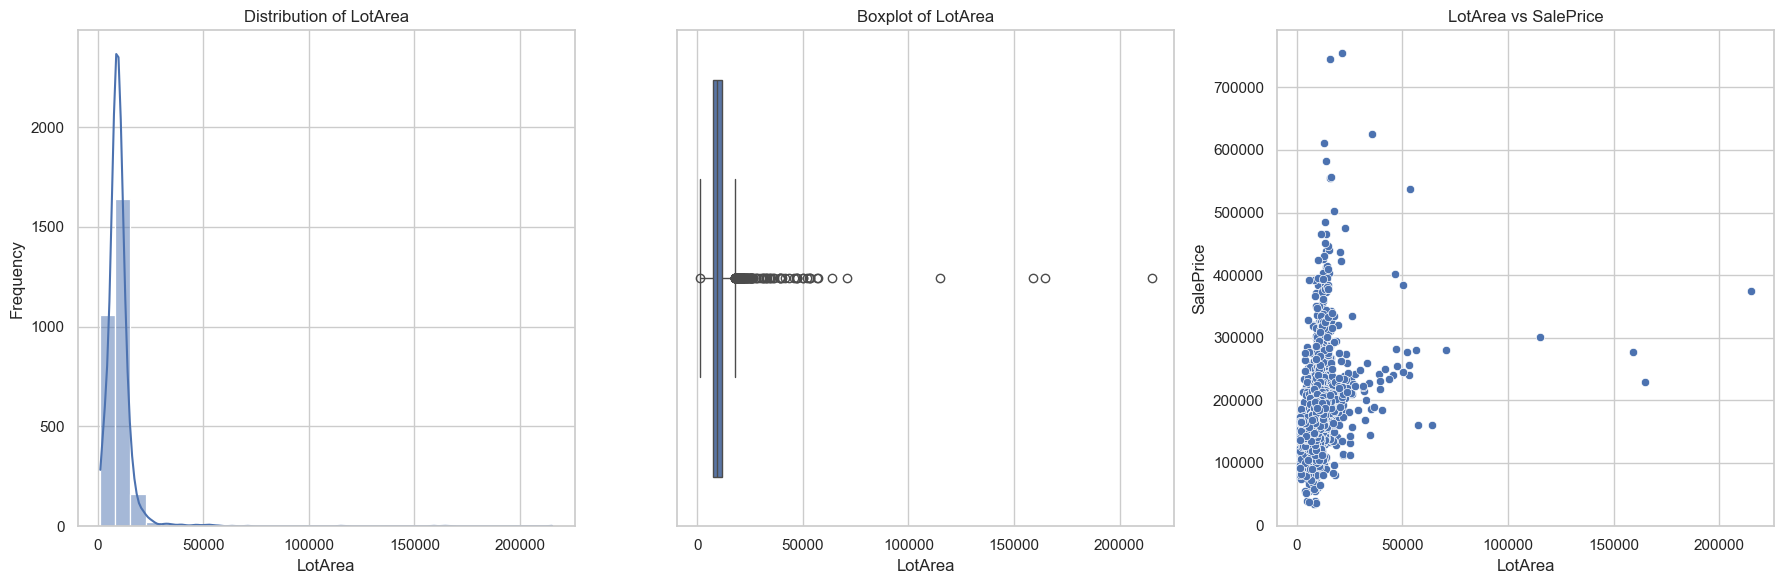

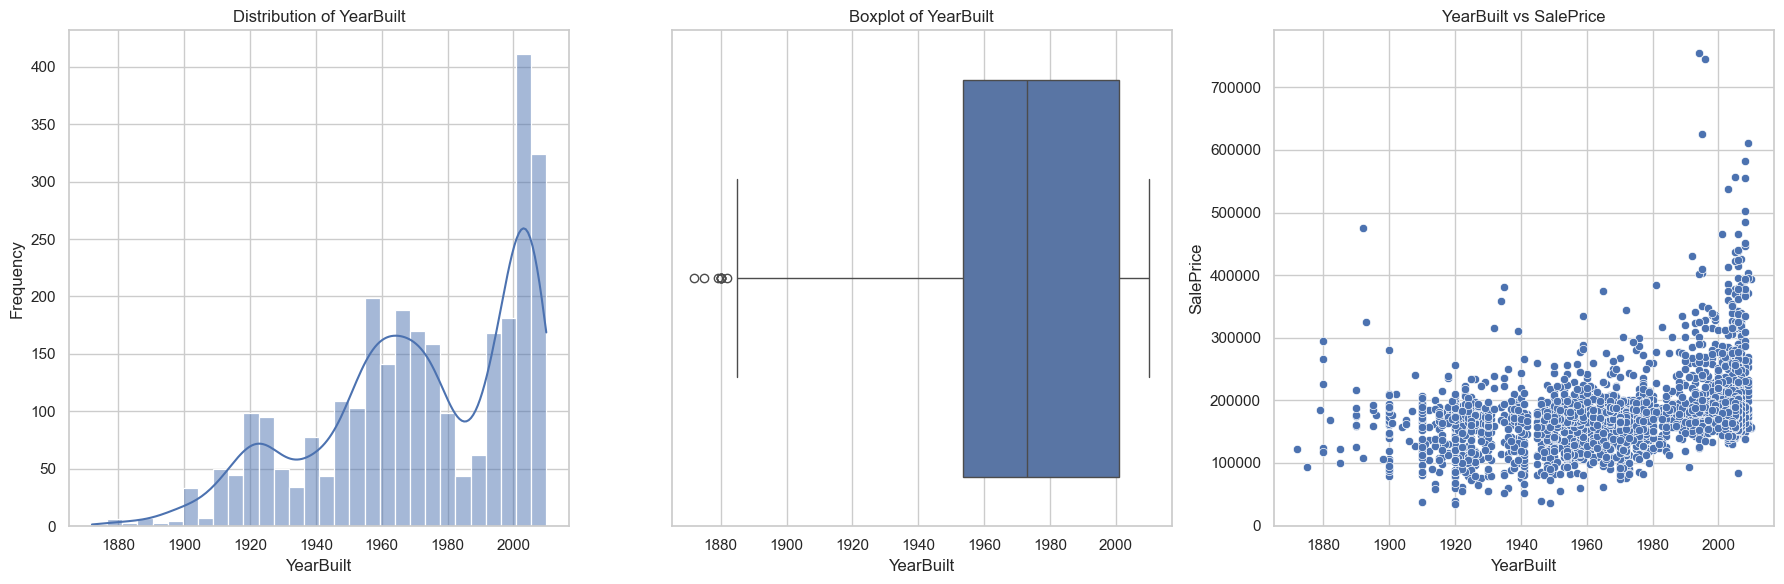

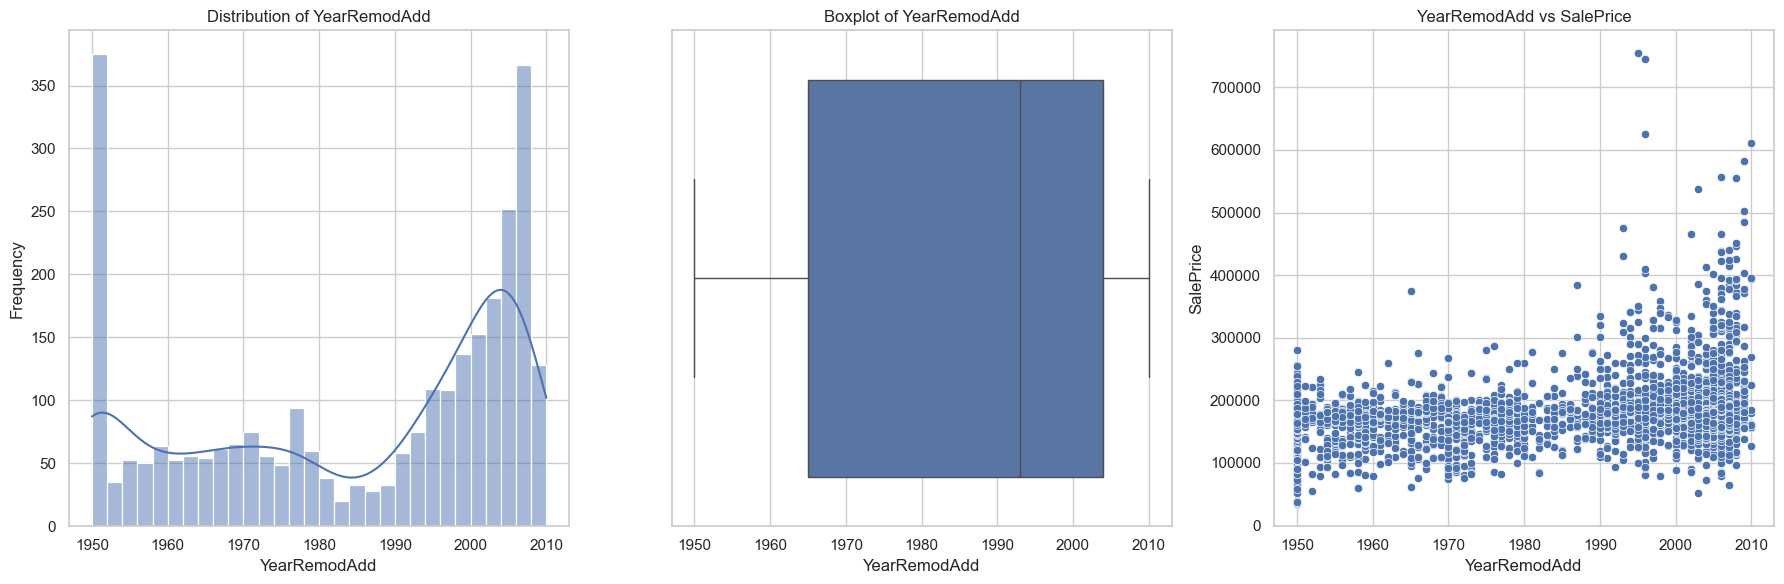

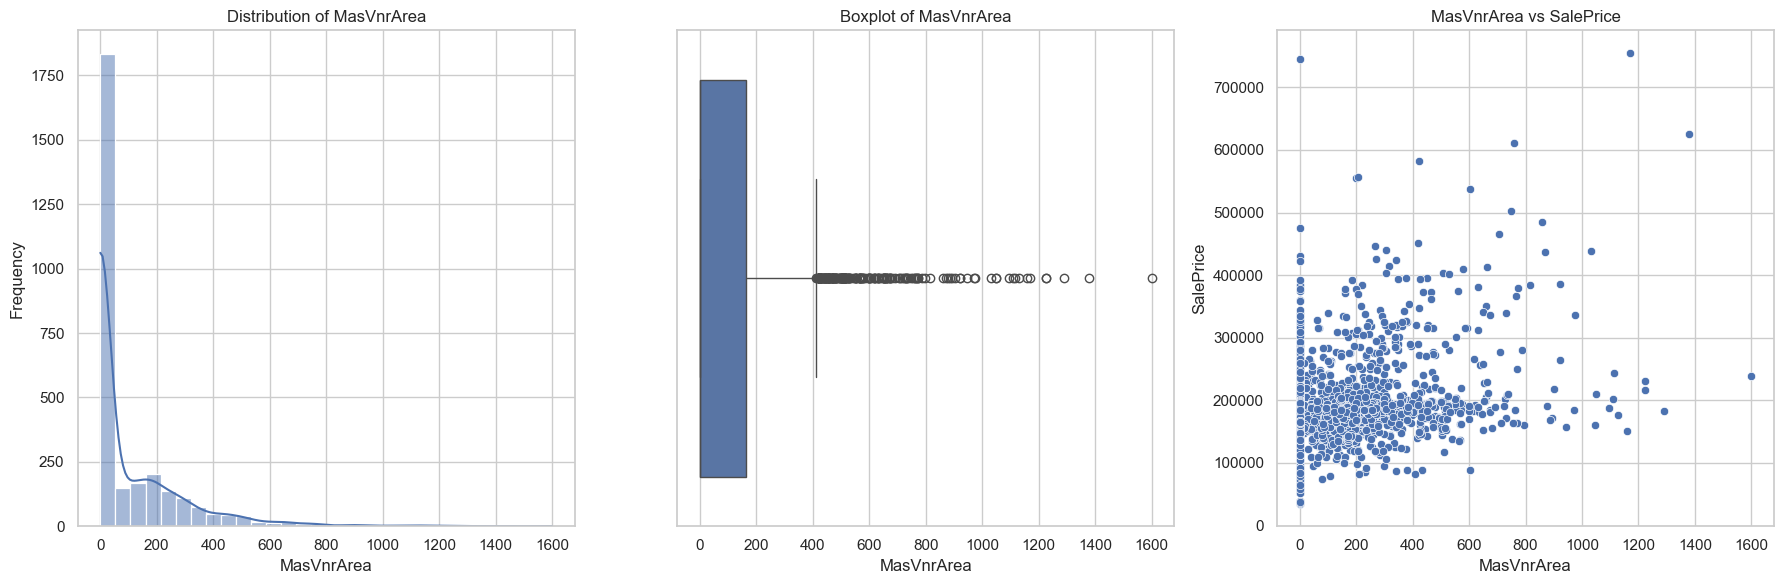

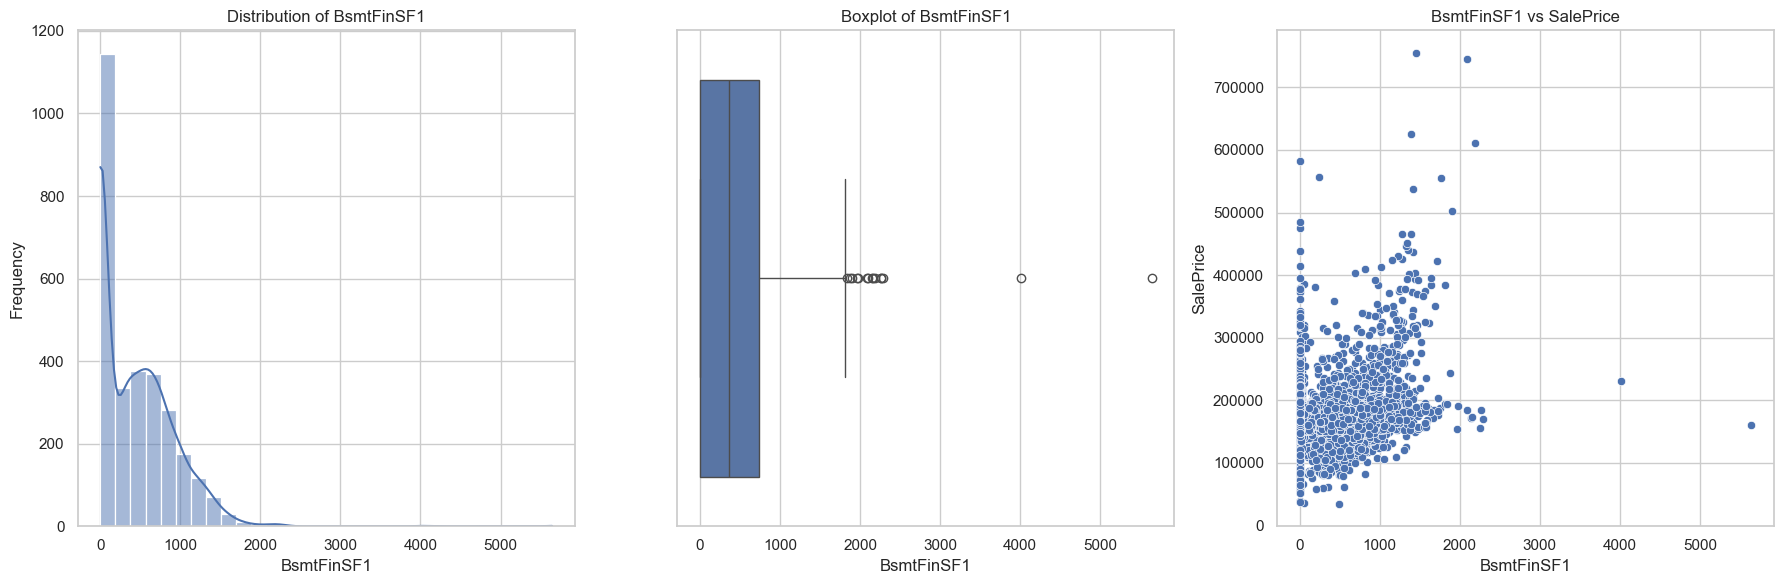

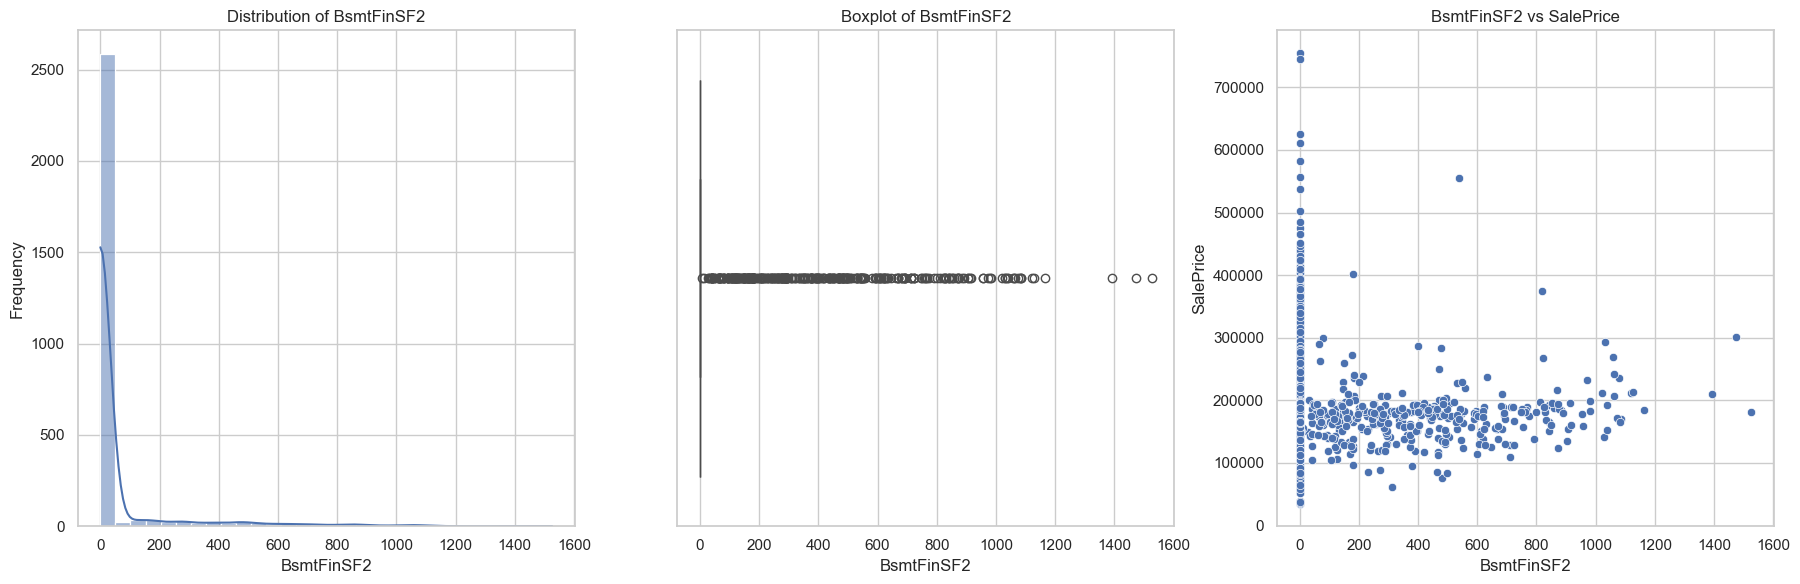

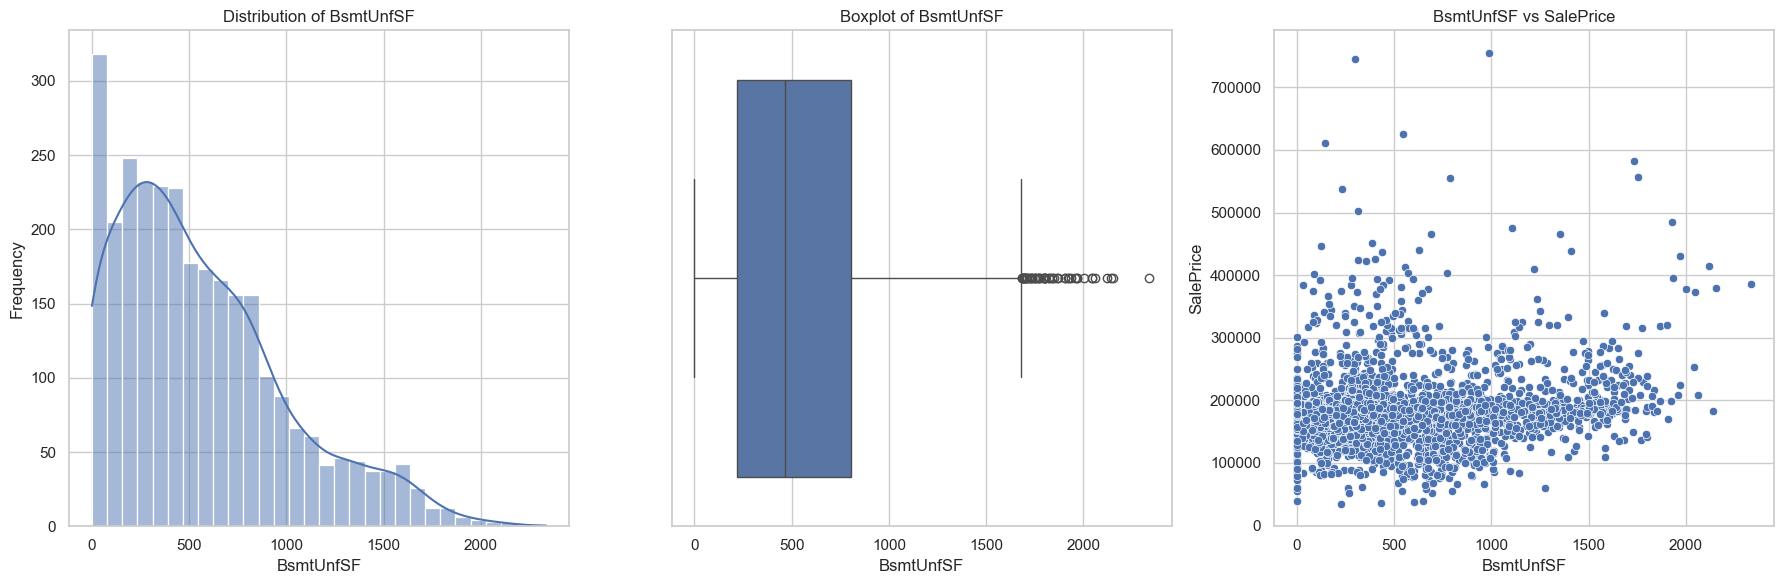

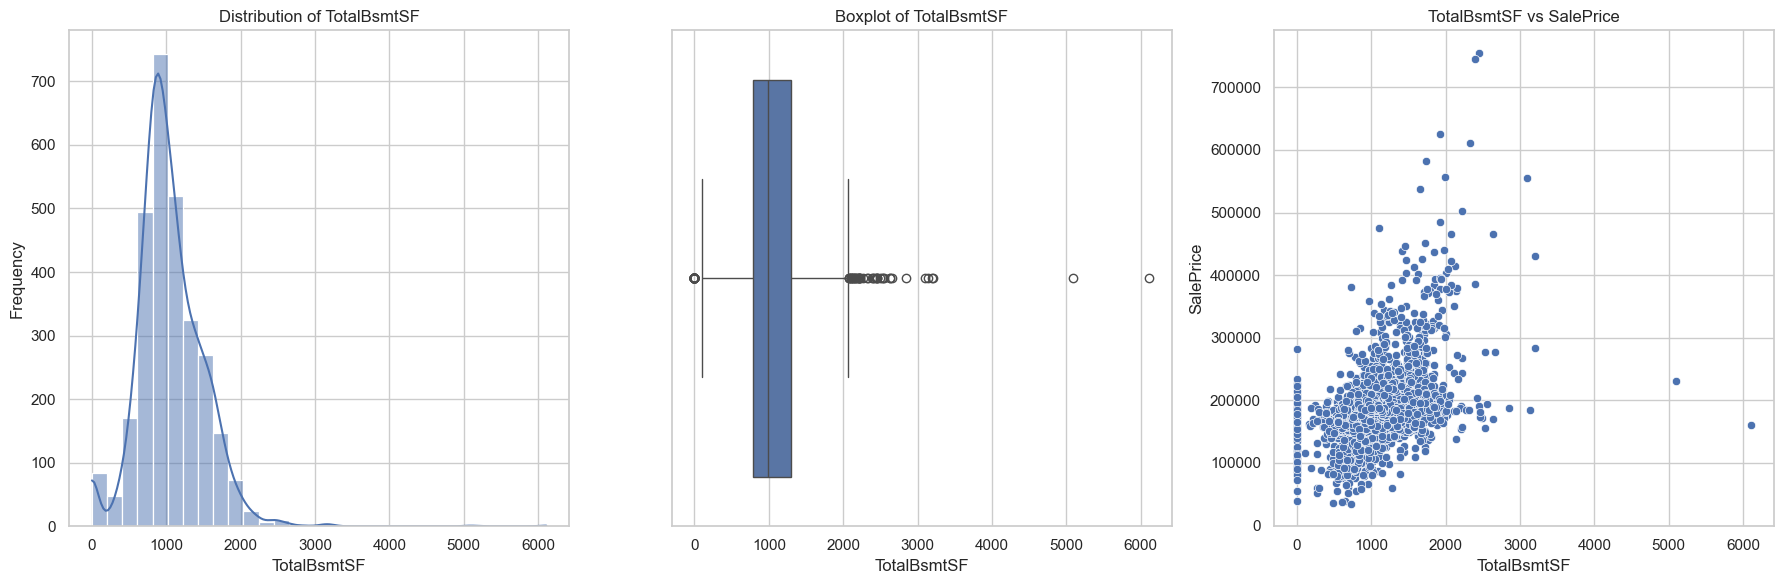

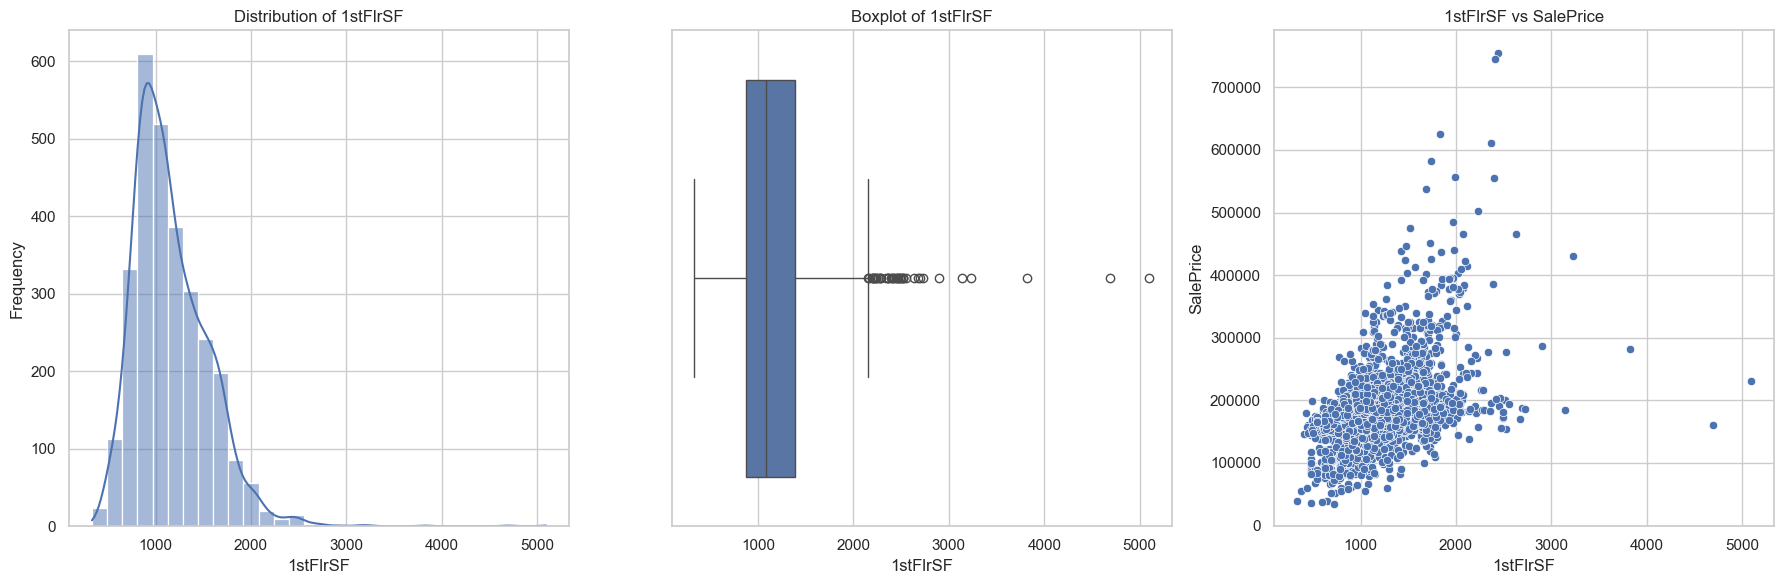

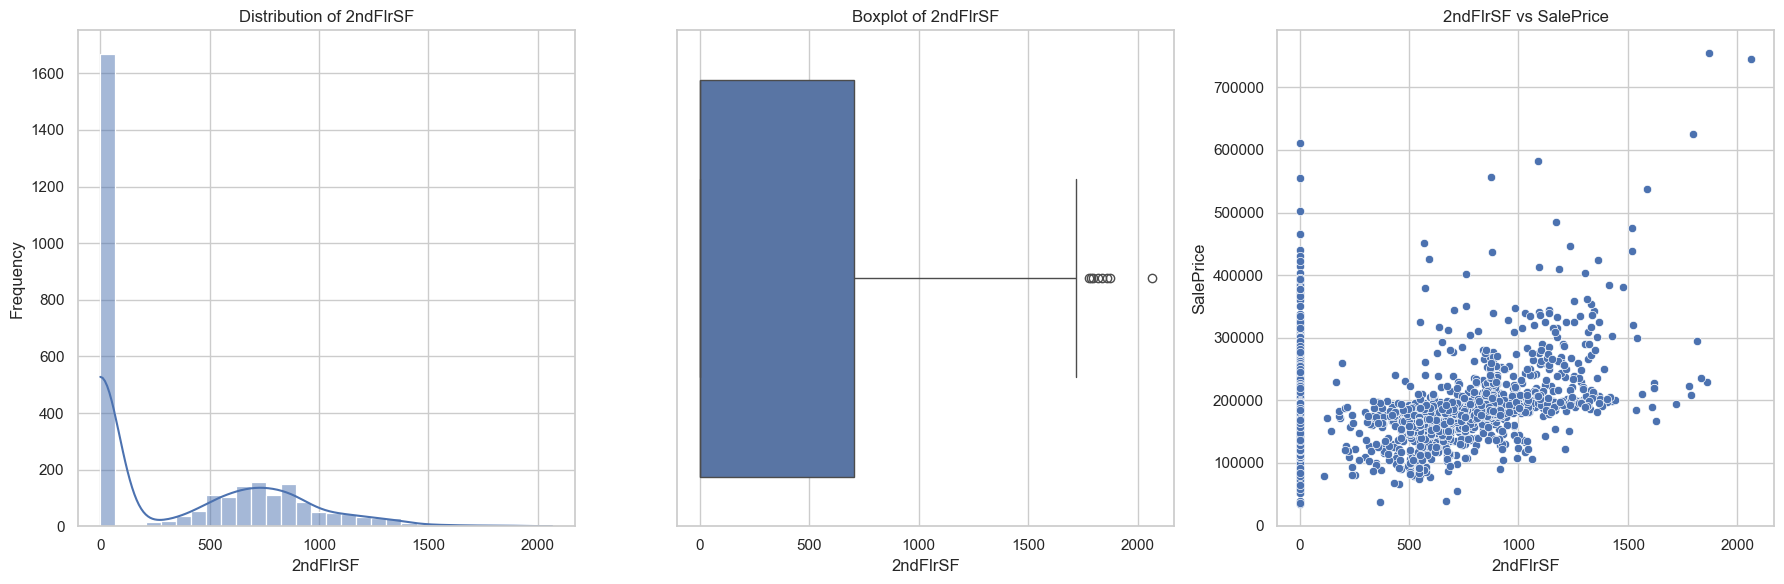

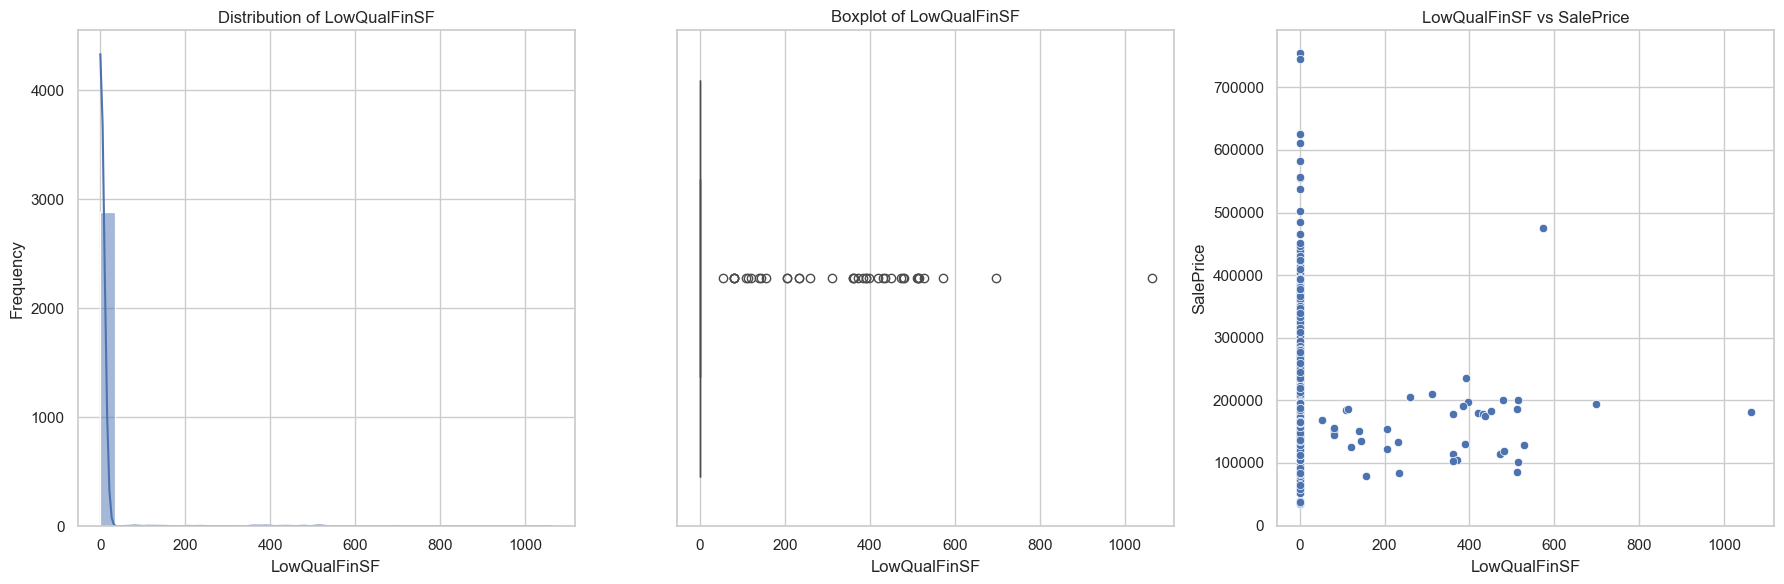

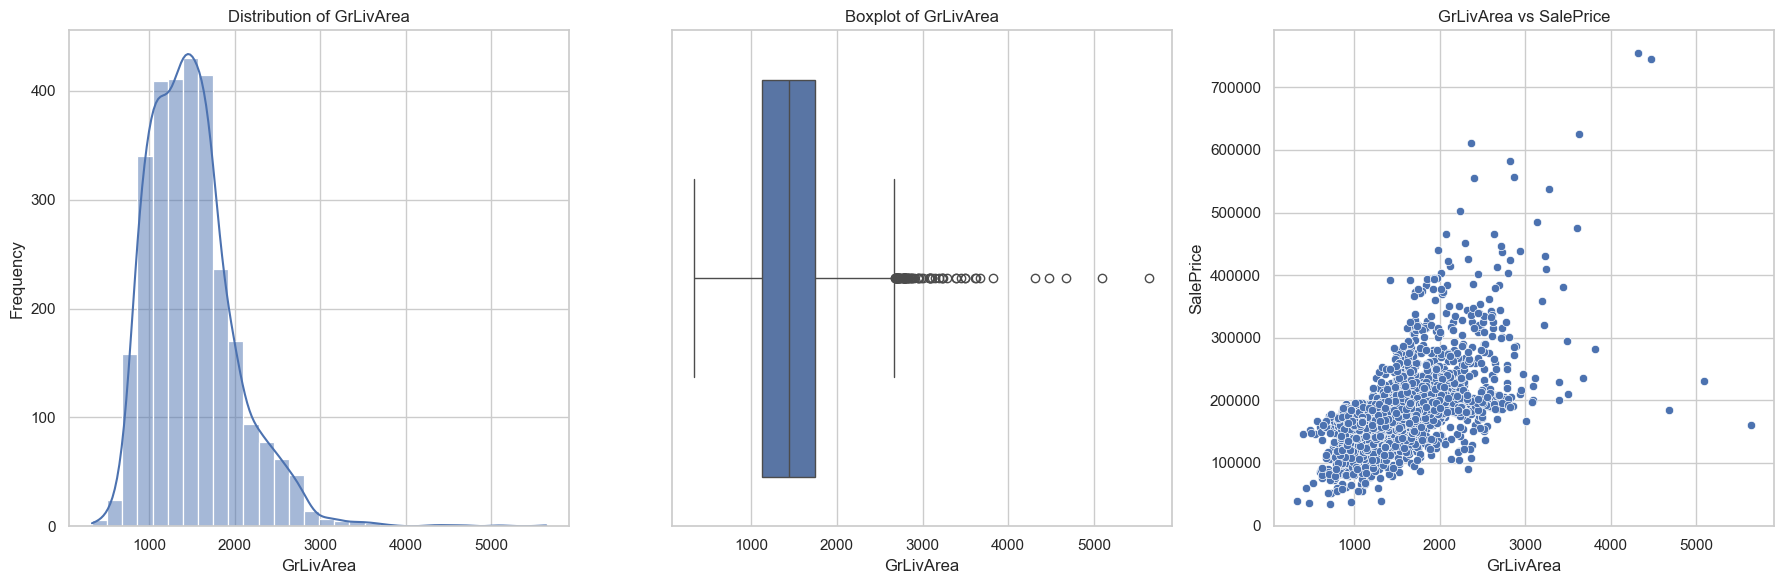

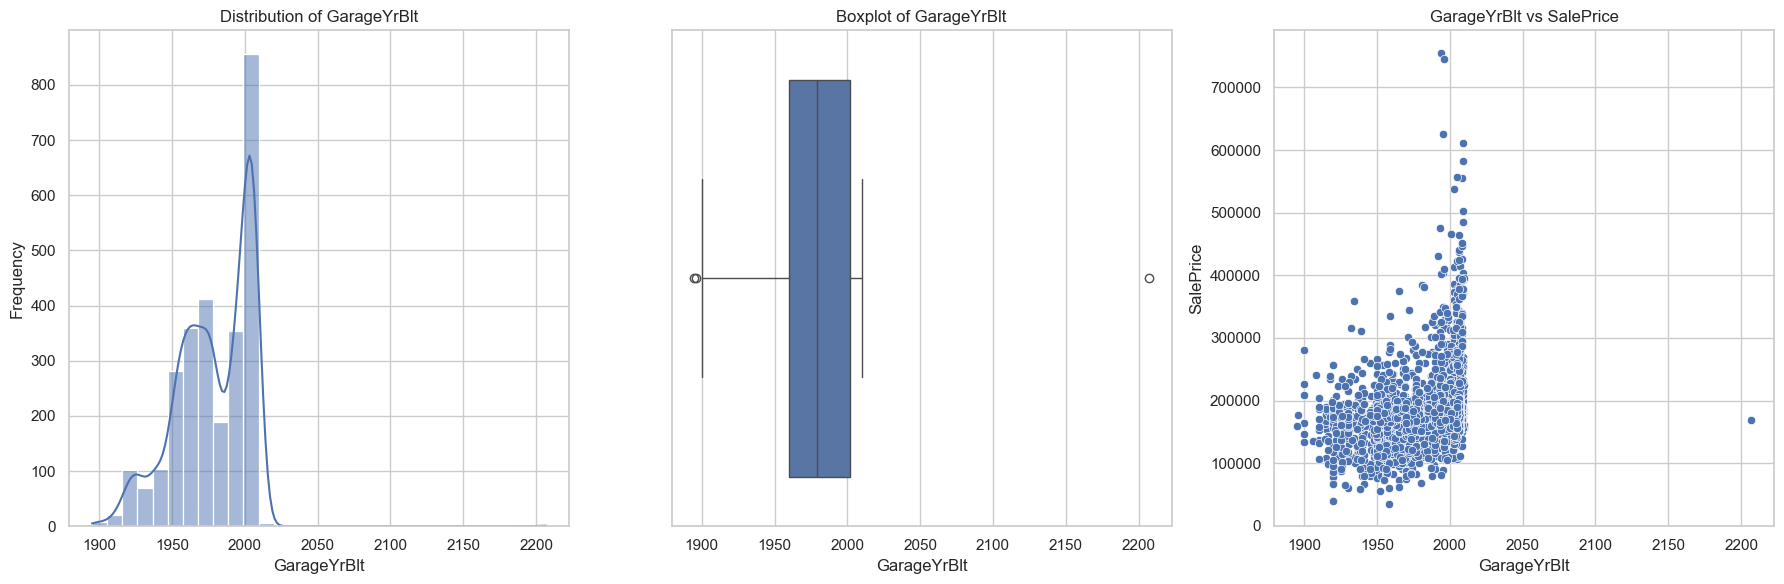

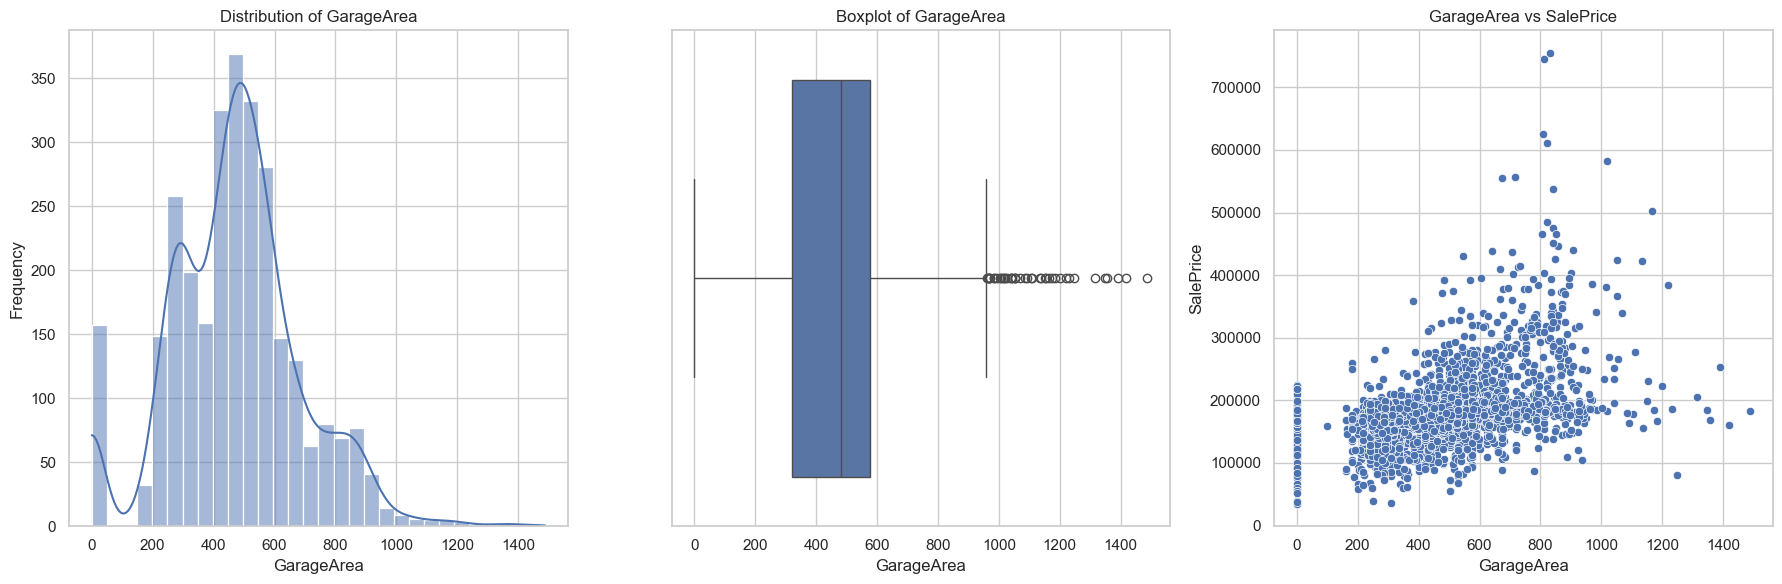

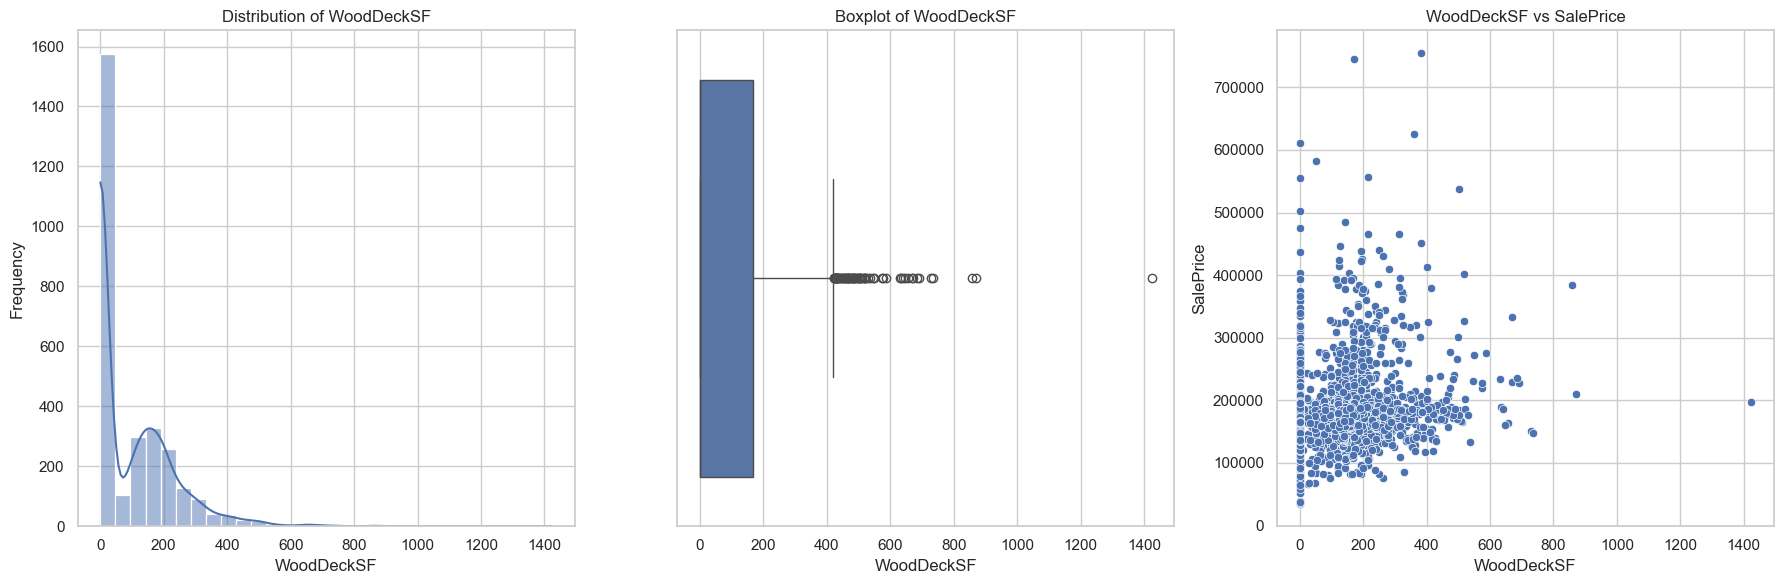

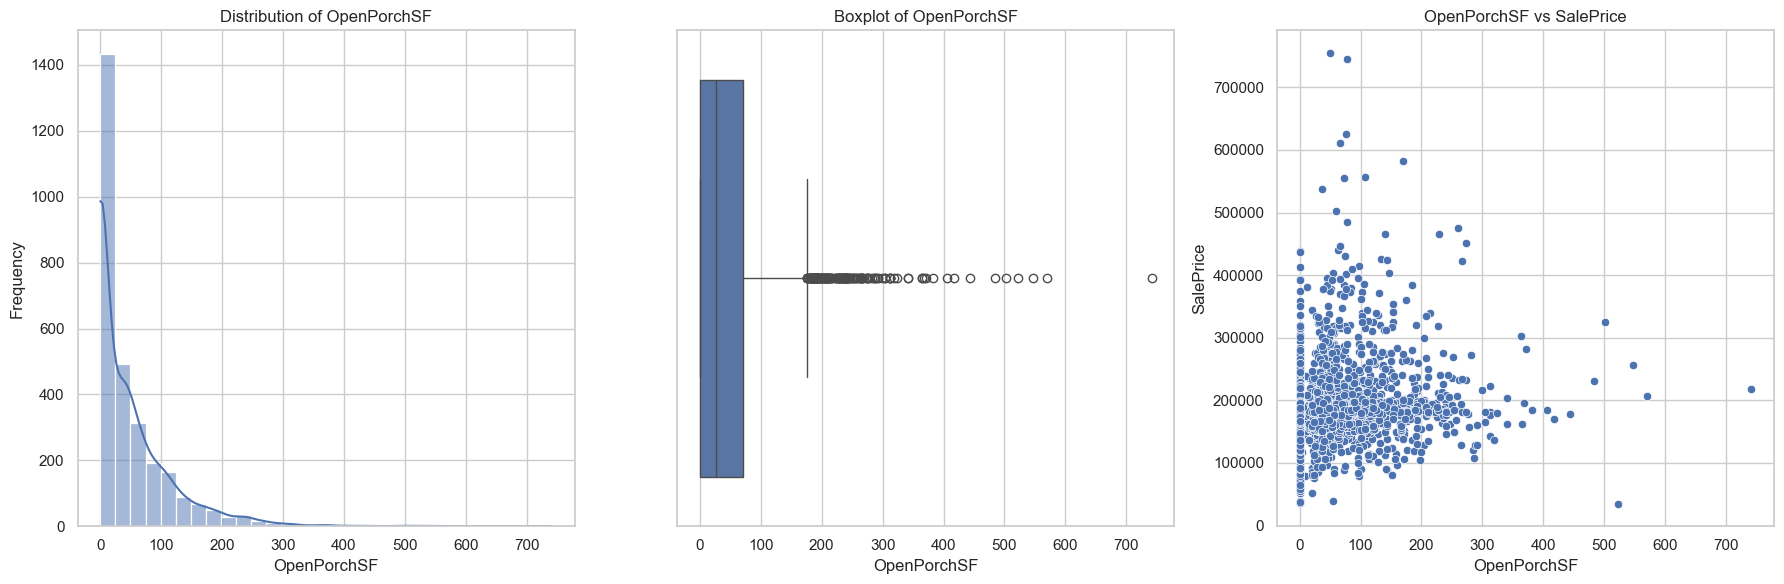

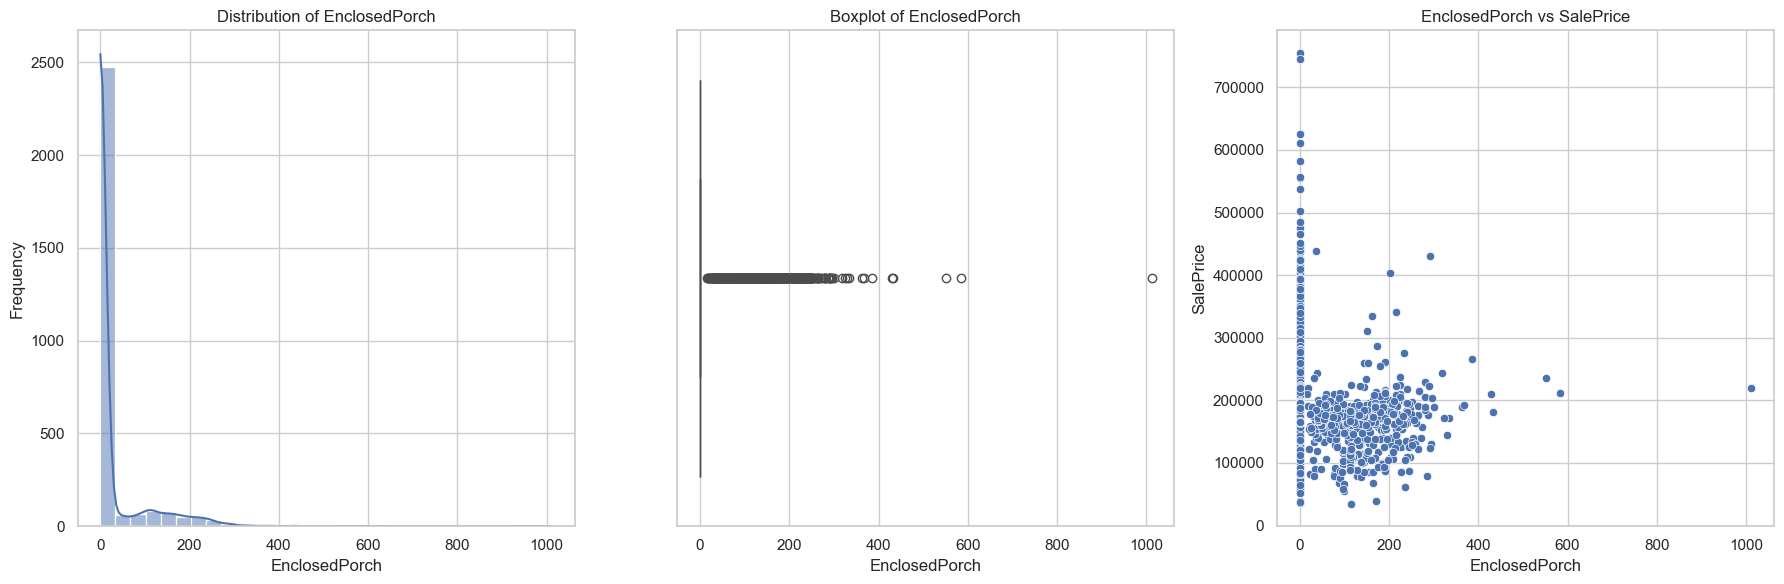

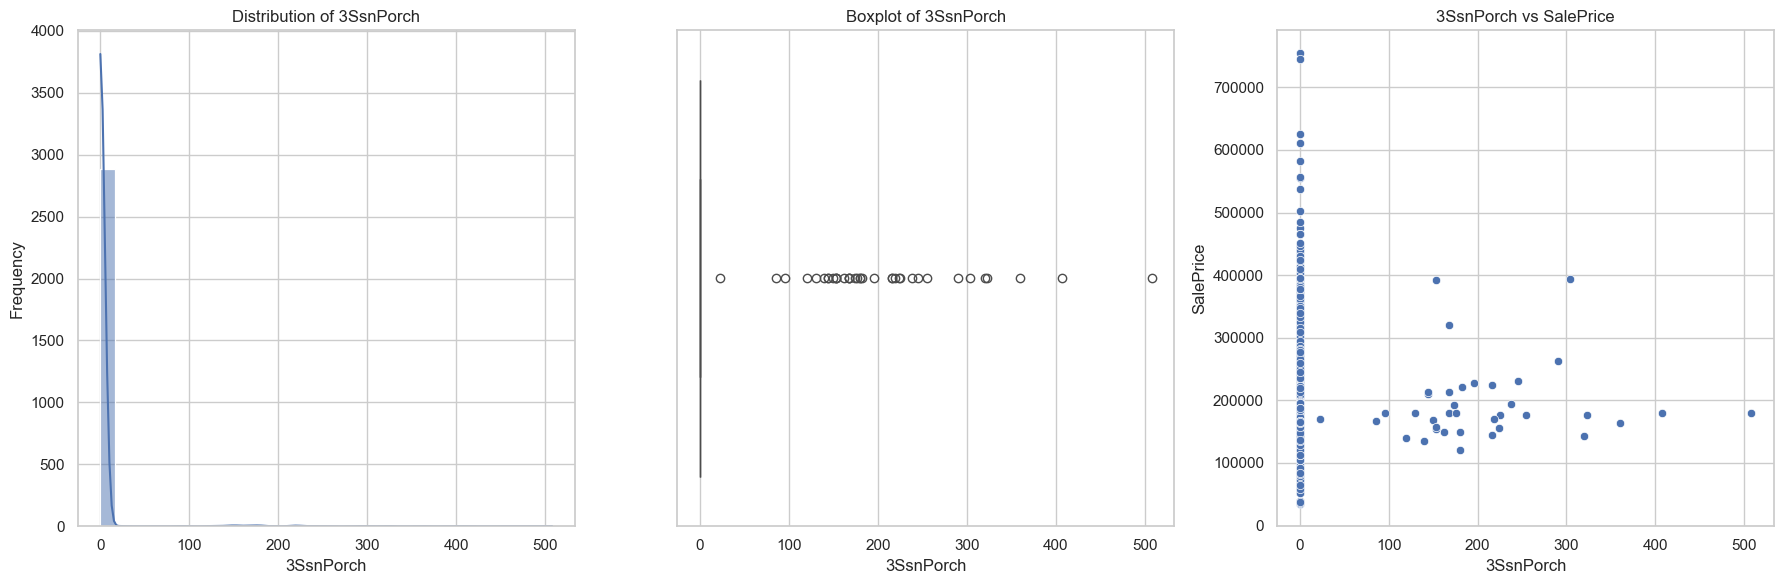

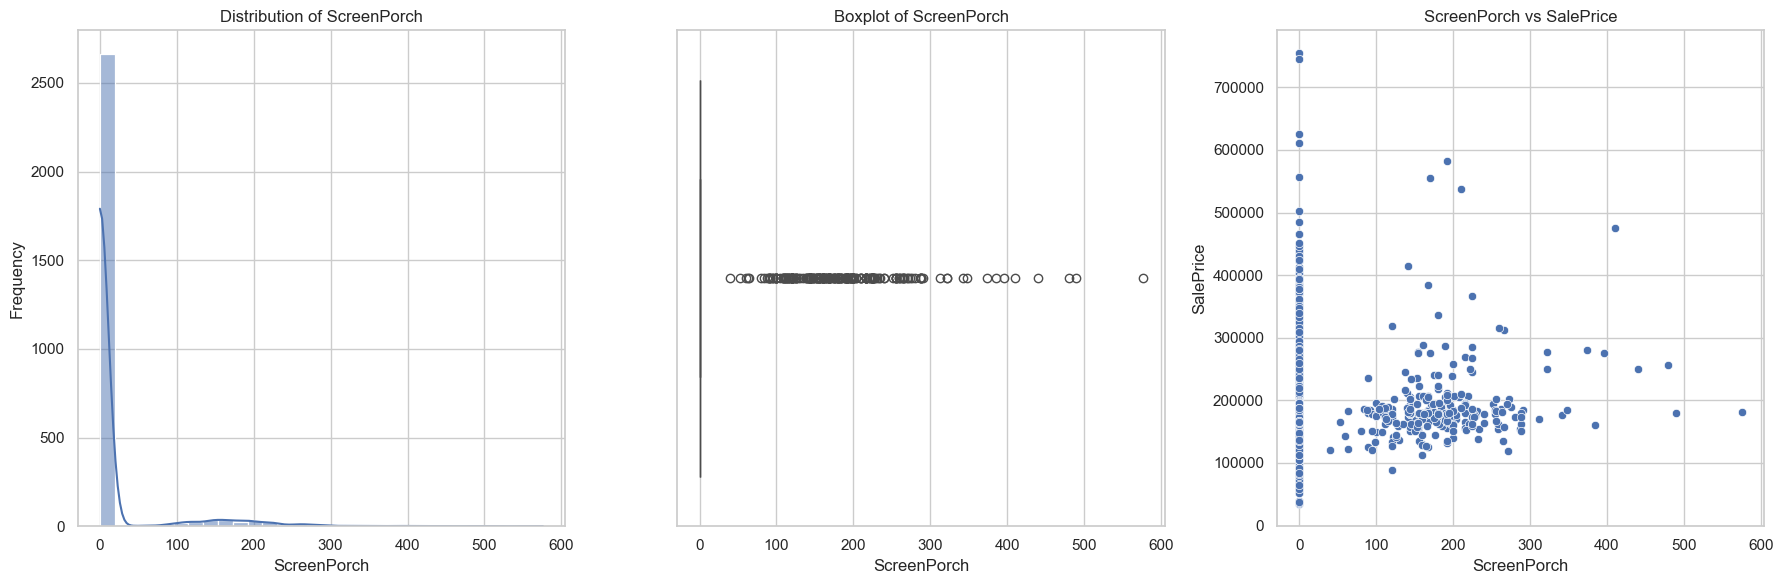

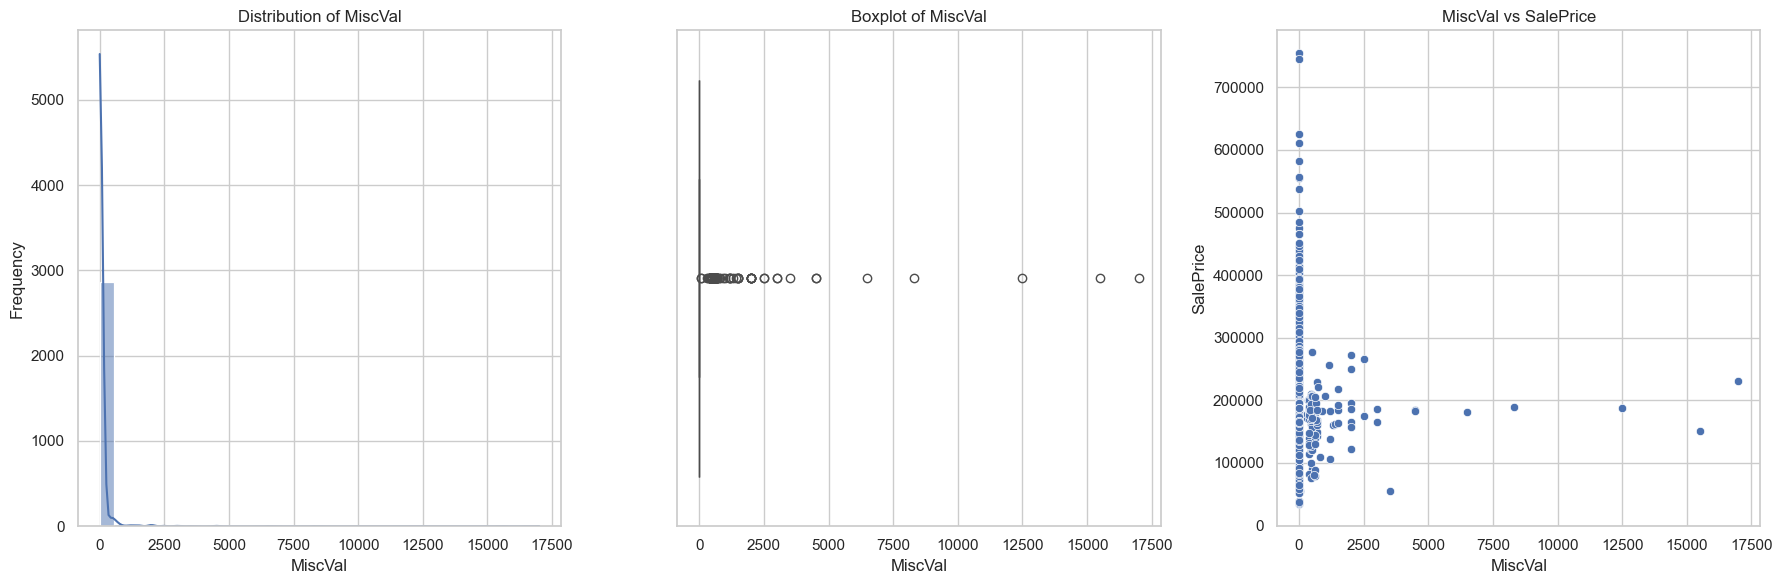

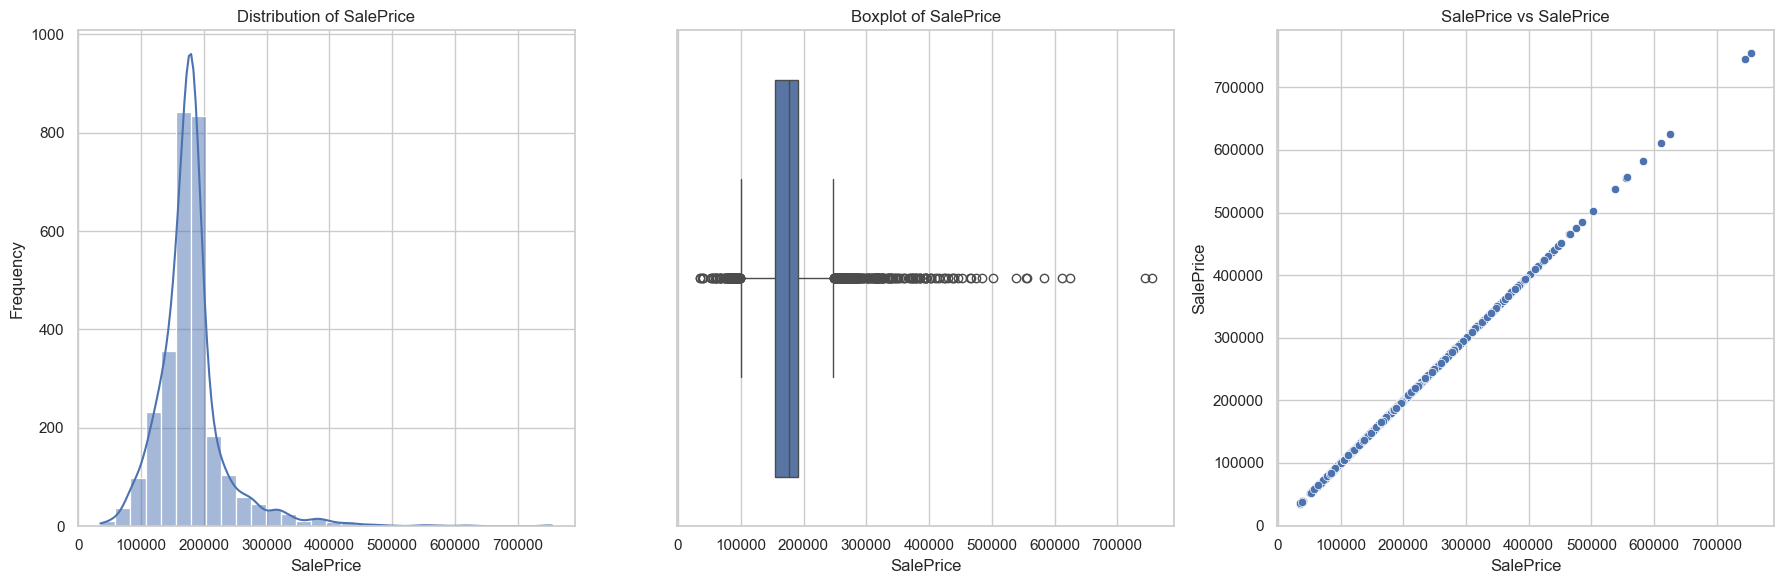

In [51]:
sns.set(style="whitegrid")

for feature in numerical_continuous_features:
    plt.figure(figsize=(18, 6))

    # Histogram with KDE
    plt.subplot(1, 3, 1)
    sns.histplot(dataset[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot for detecting outliers
    plt.subplot(1, 3, 2)
    sns.boxplot(x=dataset[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    # Scatterplot with SalePrice
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=dataset[feature], y=dataset['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

    plt.tight_layout()  
    plt.show()


### Observations:

- **Outliers**: Many of the numerical continuous features exhibit outliers, as seen in the boxplots. These outliers may distort the distribution and affect model performance.
  
- **Skewed Distribution**: Several features show skewed distributions, with skewness values significantly different from 0. Skewed distributions can impact the model's ability to learn effectively.

These transformations and handling of outliers will be explored and implemented as part of the **Feature Engineering** process to improve model accuracy and stability.
